In [66]:
%load_ext autoreload 

%autoreload 2 
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, title, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(6, 6))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(6, 6))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')

    fig_1.tight_layout()
    fig_2.tight_layout()
        
    print(title)
    plt.show()
    
    with open(f'../evaluations/{title.replace(" ","-")}.pickle', 'wb') as f:
        pickle.dump((stats, keys, run_time), f)
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats_t1(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
        title,
        notebook=True
):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig = plt.figure(figsize=(4, 4))
    plt.suptitle(title)
    ax_1 = fig.add_subplot(121)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
#     fig_2 = plt.figure(figsize=(4, 4))
    ax_2 = fig.add_subplot(122)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]] * 100, label=f'{k} %')
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    fig.tight_layout()
        
    plt.show()
    
    with open(f'../evaluations/{title.replace(" ","-")}.pickle', 'wb') as f:
        pickle.dump((stats, keys, run_time), f)
        
    return stats, keys, run_time, fig, ax_1, ax_2

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats_combined(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
        title,
        notebook=True
):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig = plt.figure(figsize=(4, 4))
    plt.suptitle(title)
    ax_1 = fig.add_subplot(121)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
#     fig_2 = plt.figure(figsize=(4, 4))
    ax_2 = fig.add_subplot(122)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]] * 100, label=f'{k} %')
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    fig.tight_layout()
    
    with open(f'../evaluations/{title.replace(" ","-")}.pickle', 'wb') as f:
        pickle.dump((stats, keys, run_time), f)
  
    return stats, keys, run_time, fig, ax_1, ax_2

In [70]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff0ea74fd60>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff0e7aaf7f0>)


In [71]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 1


stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer-error.pdf')
fig_2.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer-acc.pdf')


# # The model set up code below is provided as a starting point.
# # You will probably want to add further code cells for the
# # different experiments you run.

# from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
# from mlp.errors import CrossEntropySoftmaxError
# from mlp.models import MultipleLayerModel
# from mlp.initialisers import ConstantInit, GlorotUniformInit
# from mlp.learning_rules import AdamLearningRule
# from mlp.optimisers import Optimiser

# #setup hyperparameters
# learning_rate = 0.001
# num_epochs = 100
# stats_interval = 1
# input_dim, output_dim, hidden_dim = 784, 47, 100

# weights_init = GlorotUniformInit(rng=rng)
# biases_init = ConstantInit(0.)
# model = MultipleLayerModel([
#     AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
# ])

# error = CrossEntropySoftmaxError()
# # Use a basic gradient descent learning rule
# learning_rule = AdamLearningRule(learning_rate=learning_rate)

# #Remember to use notebook=False when you write a script to be run in a terminal
# n_hidden_layer = 1

# stats, keys, run_time, fig_1, ax_1, ax_2  = train_model_and_plot_stats_t1(
#     model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
#     title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
#     notebook=True)

# # fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')

KeyboardInterrupt: 

# Task 1

## 32-Unit 1-Hidden Layer

In [72]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)

#Set up fixed hyperparameter for task 1
batch_size = 100
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47


# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff0ea5a41f0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff0ea61c940>)


Epoch 1: 1.1s to complete
    error(train)=1.20e+00, acc(train)=6.61e-01, error(valid)=1.21e+00, acc(valid)=6.52e-01


Epoch 2: 1.1s to complete
    error(train)=1.02e+00, acc(train)=7.04e-01, error(valid)=1.04e+00, acc(valid)=7.00e-01


Epoch 3: 1.0s to complete
    error(train)=9.19e-01, acc(train)=7.28e-01, error(valid)=9.43e-01, acc(valid)=7.24e-01


Epoch 4: 1.2s to complete
    error(train)=8.51e-01, acc(train)=7.47e-01, error(valid)=8.80e-01, acc(valid)=7.40e-01


Epoch 5: 1.2s to complete
    error(train)=8.19e-01, acc(train)=7.53e-01, error(valid)=8.48e-01, acc(valid)=7.44e-01


Epoch 6: 1.7s to complete
    error(train)=7.78e-01, acc(train)=7.64e-01, error(valid)=8.12e-01, acc(valid)=7.56e-01


Epoch 7: 2.0s to complete
    error(train)=7.65e-01, acc(train)=7.66e-01, error(valid)=8.06e-01, acc(valid)=7.55e-01


Epoch 8: 2.1s to complete
    error(train)=7.25e-01, acc(train)=7.76e-01, error(valid)=7.63e-01, acc(valid)=7.66e-01


Epoch 9: 1.8s to complete
    error(train)=7.09e-01, acc(train)=7.81e-01, error(valid)=7.58e-01, acc(valid)=7.70e-01


Epoch 10: 2.1s to complete
    error(train)=6.95e-01, acc(train)=7.85e-01, error(valid)=7.45e-01, acc(valid)=7.73e-01


Epoch 11: 1.8s to complete
    error(train)=6.90e-01, acc(train)=7.86e-01, error(valid)=7.44e-01, acc(valid)=7.72e-01


Epoch 12: 2.1s to complete
    error(train)=6.65e-01, acc(train)=7.92e-01, error(valid)=7.19e-01, acc(valid)=7.79e-01


Epoch 13: 1.9s to complete
    error(train)=6.68e-01, acc(train)=7.90e-01, error(valid)=7.28e-01, acc(valid)=7.72e-01


Epoch 14: 1.7s to complete
    error(train)=6.47e-01, acc(train)=7.98e-01, error(valid)=7.12e-01, acc(valid)=7.81e-01


Epoch 15: 2.1s to complete
    error(train)=6.47e-01, acc(train)=7.95e-01, error(valid)=7.13e-01, acc(valid)=7.83e-01


Epoch 16: 1.9s to complete
    error(train)=6.33e-01, acc(train)=8.00e-01, error(valid)=7.04e-01, acc(valid)=7.83e-01


Epoch 17: 1.8s to complete
    error(train)=6.28e-01, acc(train)=8.02e-01, error(valid)=7.03e-01, acc(valid)=7.84e-01


Epoch 18: 1.8s to complete
    error(train)=6.24e-01, acc(train)=8.03e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


Epoch 19: 2.1s to complete
    error(train)=6.18e-01, acc(train)=8.03e-01, error(valid)=6.92e-01, acc(valid)=7.84e-01


Epoch 20: 2.0s to complete
    error(train)=6.02e-01, acc(train)=8.09e-01, error(valid)=6.80e-01, acc(valid)=7.90e-01


Epoch 21: 1.7s to complete
    error(train)=6.04e-01, acc(train)=8.09e-01, error(valid)=6.79e-01, acc(valid)=7.90e-01


Epoch 22: 2.0s to complete
    error(train)=5.97e-01, acc(train)=8.10e-01, error(valid)=6.82e-01, acc(valid)=7.85e-01


Epoch 23: 1.6s to complete
    error(train)=5.91e-01, acc(train)=8.10e-01, error(valid)=6.76e-01, acc(valid)=7.87e-01


Epoch 24: 1.6s to complete
    error(train)=6.12e-01, acc(train)=8.04e-01, error(valid)=6.98e-01, acc(valid)=7.82e-01


Epoch 25: 1.5s to complete
    error(train)=5.84e-01, acc(train)=8.15e-01, error(valid)=6.73e-01, acc(valid)=7.93e-01


Epoch 26: 1.6s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=6.69e-01, acc(valid)=7.92e-01


Epoch 27: 2.1s to complete
    error(train)=5.78e-01, acc(train)=8.15e-01, error(valid)=6.65e-01, acc(valid)=7.89e-01


Epoch 28: 2.4s to complete
    error(train)=5.74e-01, acc(train)=8.15e-01, error(valid)=6.63e-01, acc(valid)=7.91e-01


Epoch 29: 1.9s to complete
    error(train)=5.76e-01, acc(train)=8.14e-01, error(valid)=6.68e-01, acc(valid)=7.88e-01


Epoch 30: 1.8s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=6.74e-01, acc(valid)=7.89e-01


Epoch 31: 1.7s to complete
    error(train)=5.73e-01, acc(train)=8.16e-01, error(valid)=6.71e-01, acc(valid)=7.92e-01


Epoch 32: 1.7s to complete
    error(train)=5.60e-01, acc(train)=8.20e-01, error(valid)=6.59e-01, acc(valid)=7.94e-01


Epoch 33: 1.7s to complete
    error(train)=5.63e-01, acc(train)=8.18e-01, error(valid)=6.71e-01, acc(valid)=7.89e-01


Epoch 34: 1.7s to complete
    error(train)=5.59e-01, acc(train)=8.20e-01, error(valid)=6.61e-01, acc(valid)=7.93e-01


Epoch 35: 1.7s to complete
    error(train)=5.66e-01, acc(train)=8.13e-01, error(valid)=6.71e-01, acc(valid)=7.90e-01


Epoch 36: 1.7s to complete
    error(train)=5.59e-01, acc(train)=8.18e-01, error(valid)=6.66e-01, acc(valid)=7.93e-01


Epoch 37: 1.6s to complete
    error(train)=5.49e-01, acc(train)=8.21e-01, error(valid)=6.56e-01, acc(valid)=7.92e-01


Epoch 38: 1.6s to complete
    error(train)=5.35e-01, acc(train)=8.27e-01, error(valid)=6.40e-01, acc(valid)=8.00e-01


Epoch 39: 1.7s to complete
    error(train)=5.59e-01, acc(train)=8.19e-01, error(valid)=6.74e-01, acc(valid)=7.91e-01


Epoch 40: 1.7s to complete
    error(train)=5.44e-01, acc(train)=8.24e-01, error(valid)=6.54e-01, acc(valid)=7.96e-01


Epoch 41: 1.6s to complete
    error(train)=5.35e-01, acc(train)=8.26e-01, error(valid)=6.49e-01, acc(valid)=7.95e-01


Epoch 42: 1.7s to complete
    error(train)=5.41e-01, acc(train)=8.25e-01, error(valid)=6.60e-01, acc(valid)=7.94e-01


Epoch 43: 1.7s to complete
    error(train)=5.48e-01, acc(train)=8.19e-01, error(valid)=6.63e-01, acc(valid)=7.91e-01


Epoch 44: 1.7s to complete
    error(train)=5.42e-01, acc(train)=8.22e-01, error(valid)=6.56e-01, acc(valid)=7.95e-01


Epoch 45: 1.9s to complete
    error(train)=5.37e-01, acc(train)=8.24e-01, error(valid)=6.54e-01, acc(valid)=7.98e-01


Epoch 46: 1.5s to complete
    error(train)=5.26e-01, acc(train)=8.28e-01, error(valid)=6.43e-01, acc(valid)=7.99e-01


Epoch 47: 1.5s to complete
    error(train)=5.22e-01, acc(train)=8.30e-01, error(valid)=6.43e-01, acc(valid)=8.00e-01


Epoch 48: 1.6s to complete
    error(train)=5.24e-01, acc(train)=8.28e-01, error(valid)=6.42e-01, acc(valid)=8.01e-01


Epoch 49: 2.2s to complete
    error(train)=5.21e-01, acc(train)=8.30e-01, error(valid)=6.42e-01, acc(valid)=8.01e-01


Epoch 50: 2.2s to complete
    error(train)=5.21e-01, acc(train)=8.29e-01, error(valid)=6.48e-01, acc(valid)=7.98e-01


Epoch 51: 2.3s to complete
    error(train)=5.23e-01, acc(train)=8.28e-01, error(valid)=6.47e-01, acc(valid)=7.96e-01


Epoch 52: 1.8s to complete
    error(train)=5.23e-01, acc(train)=8.28e-01, error(valid)=6.48e-01, acc(valid)=7.99e-01


Epoch 53: 1.6s to complete
    error(train)=5.18e-01, acc(train)=8.28e-01, error(valid)=6.47e-01, acc(valid)=7.95e-01


Epoch 54: 1.7s to complete
    error(train)=5.28e-01, acc(train)=8.28e-01, error(valid)=6.55e-01, acc(valid)=7.97e-01


Epoch 55: 1.9s to complete
    error(train)=5.17e-01, acc(train)=8.29e-01, error(valid)=6.46e-01, acc(valid)=7.97e-01


Epoch 56: 1.9s to complete
    error(train)=5.27e-01, acc(train)=8.26e-01, error(valid)=6.59e-01, acc(valid)=7.92e-01


Epoch 57: 1.5s to complete
    error(train)=5.14e-01, acc(train)=8.28e-01, error(valid)=6.44e-01, acc(valid)=7.96e-01


Epoch 58: 1.7s to complete
    error(train)=5.10e-01, acc(train)=8.33e-01, error(valid)=6.40e-01, acc(valid)=8.00e-01


Epoch 59: 1.5s to complete
    error(train)=5.21e-01, acc(train)=8.28e-01, error(valid)=6.58e-01, acc(valid)=7.95e-01


Epoch 60: 1.6s to complete
    error(train)=5.26e-01, acc(train)=8.25e-01, error(valid)=6.61e-01, acc(valid)=7.92e-01


Epoch 61: 1.5s to complete
    error(train)=5.02e-01, acc(train)=8.35e-01, error(valid)=6.38e-01, acc(valid)=8.00e-01


Epoch 62: 1.5s to complete
    error(train)=5.03e-01, acc(train)=8.34e-01, error(valid)=6.36e-01, acc(valid)=8.00e-01


Epoch 63: 1.6s to complete
    error(train)=5.04e-01, acc(train)=8.33e-01, error(valid)=6.43e-01, acc(valid)=8.00e-01


Epoch 64: 1.8s to complete
    error(train)=5.09e-01, acc(train)=8.32e-01, error(valid)=6.49e-01, acc(valid)=7.97e-01


Epoch 65: 1.5s to complete
    error(train)=5.00e-01, acc(train)=8.36e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


Epoch 66: 1.5s to complete
    error(train)=5.02e-01, acc(train)=8.35e-01, error(valid)=6.41e-01, acc(valid)=8.01e-01


Epoch 67: 1.6s to complete
    error(train)=4.99e-01, acc(train)=8.34e-01, error(valid)=6.44e-01, acc(valid)=7.97e-01


Epoch 68: 1.6s to complete
    error(train)=5.07e-01, acc(train)=8.32e-01, error(valid)=6.56e-01, acc(valid)=7.95e-01


Epoch 69: 1.6s to complete
    error(train)=5.09e-01, acc(train)=8.30e-01, error(valid)=6.55e-01, acc(valid)=7.92e-01


Epoch 70: 1.6s to complete
    error(train)=5.04e-01, acc(train)=8.32e-01, error(valid)=6.53e-01, acc(valid)=7.92e-01


Epoch 71: 2.0s to complete
    error(train)=4.97e-01, acc(train)=8.37e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


Epoch 72: 1.5s to complete
    error(train)=5.05e-01, acc(train)=8.32e-01, error(valid)=6.53e-01, acc(valid)=7.97e-01


Epoch 73: 1.5s to complete
    error(train)=5.06e-01, acc(train)=8.32e-01, error(valid)=6.59e-01, acc(valid)=7.95e-01


Epoch 74: 1.8s to complete
    error(train)=4.97e-01, acc(train)=8.35e-01, error(valid)=6.51e-01, acc(valid)=7.97e-01


Epoch 75: 1.8s to complete
    error(train)=4.97e-01, acc(train)=8.36e-01, error(valid)=6.49e-01, acc(valid)=8.01e-01


Epoch 76: 1.6s to complete
    error(train)=4.89e-01, acc(train)=8.39e-01, error(valid)=6.45e-01, acc(valid)=8.01e-01


Epoch 77: 1.7s to complete
    error(train)=4.88e-01, acc(train)=8.37e-01, error(valid)=6.43e-01, acc(valid)=8.00e-01


Epoch 78: 1.6s to complete
    error(train)=4.94e-01, acc(train)=8.36e-01, error(valid)=6.49e-01, acc(valid)=7.99e-01


Epoch 79: 1.5s to complete
    error(train)=4.84e-01, acc(train)=8.40e-01, error(valid)=6.36e-01, acc(valid)=8.03e-01


Epoch 80: 1.5s to complete
    error(train)=4.89e-01, acc(train)=8.37e-01, error(valid)=6.49e-01, acc(valid)=7.99e-01


Epoch 81: 1.5s to complete
    error(train)=4.81e-01, acc(train)=8.41e-01, error(valid)=6.44e-01, acc(valid)=8.02e-01


Epoch 82: 1.6s to complete
    error(train)=4.88e-01, acc(train)=8.38e-01, error(valid)=6.45e-01, acc(valid)=8.00e-01


Epoch 83: 1.5s to complete
    error(train)=4.93e-01, acc(train)=8.35e-01, error(valid)=6.53e-01, acc(valid)=7.95e-01


Epoch 84: 1.5s to complete
    error(train)=4.87e-01, acc(train)=8.38e-01, error(valid)=6.50e-01, acc(valid)=8.01e-01


Epoch 85: 1.6s to complete
    error(train)=4.89e-01, acc(train)=8.36e-01, error(valid)=6.52e-01, acc(valid)=7.96e-01


Epoch 86: 1.8s to complete
    error(train)=4.92e-01, acc(train)=8.36e-01, error(valid)=6.60e-01, acc(valid)=7.98e-01


Epoch 87: 1.7s to complete
    error(train)=4.91e-01, acc(train)=8.36e-01, error(valid)=6.56e-01, acc(valid)=7.94e-01


Epoch 88: 1.7s to complete
    error(train)=4.80e-01, acc(train)=8.39e-01, error(valid)=6.50e-01, acc(valid)=7.99e-01


Epoch 89: 1.7s to complete
    error(train)=4.78e-01, acc(train)=8.41e-01, error(valid)=6.49e-01, acc(valid)=7.99e-01


Epoch 90: 1.6s to complete
    error(train)=4.83e-01, acc(train)=8.39e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


Epoch 91: 1.5s to complete
    error(train)=4.78e-01, acc(train)=8.42e-01, error(valid)=6.47e-01, acc(valid)=8.02e-01


Epoch 92: 1.5s to complete
    error(train)=4.87e-01, acc(train)=8.36e-01, error(valid)=6.64e-01, acc(valid)=7.96e-01


Epoch 93: 1.8s to complete
    error(train)=4.90e-01, acc(train)=8.35e-01, error(valid)=6.63e-01, acc(valid)=7.96e-01


Epoch 94: 1.8s to complete
    error(train)=4.78e-01, acc(train)=8.41e-01, error(valid)=6.58e-01, acc(valid)=8.00e-01


Epoch 95: 1.9s to complete
    error(train)=4.80e-01, acc(train)=8.40e-01, error(valid)=6.55e-01, acc(valid)=7.96e-01


Epoch 96: 1.5s to complete
    error(train)=4.85e-01, acc(train)=8.39e-01, error(valid)=6.64e-01, acc(valid)=7.99e-01


Epoch 97: 1.5s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


Epoch 98: 1.5s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=6.55e-01, acc(valid)=7.99e-01


Epoch 99: 1.5s to complete
    error(train)=4.74e-01, acc(train)=8.41e-01, error(valid)=6.54e-01, acc(valid)=8.01e-01


Epoch 100: 1.7s to complete
    error(train)=4.77e-01, acc(train)=8.40e-01, error(valid)=6.58e-01, acc(valid)=7.98e-01


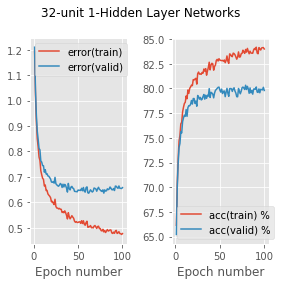

In [73]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
batch_size = 100
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47

hidden_dim = 32

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 1

# stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')


## 64-unit 1-Hidden Layer

Epoch 1: 2.8s to complete
    error(train)=9.28e-01, acc(train)=7.27e-01, error(valid)=9.42e-01, acc(valid)=7.22e-01


Epoch 2: 2.7s to complete
    error(train)=7.42e-01, acc(train)=7.73e-01, error(valid)=7.68e-01, acc(valid)=7.66e-01


Epoch 3: 2.2s to complete
    error(train)=6.56e-01, acc(train)=7.93e-01, error(valid)=6.91e-01, acc(valid)=7.84e-01


Epoch 4: 2.2s to complete
    error(train)=5.99e-01, acc(train)=8.09e-01, error(valid)=6.47e-01, acc(valid)=7.95e-01


Epoch 5: 2.2s to complete
    error(train)=5.82e-01, acc(train)=8.10e-01, error(valid)=6.35e-01, acc(valid)=7.97e-01


Epoch 6: 2.2s to complete
    error(train)=5.48e-01, acc(train)=8.21e-01, error(valid)=6.08e-01, acc(valid)=8.07e-01


Epoch 7: 2.4s to complete
    error(train)=5.24e-01, acc(train)=8.29e-01, error(valid)=5.95e-01, acc(valid)=8.12e-01


Epoch 8: 2.3s to complete
    error(train)=4.99e-01, acc(train)=8.37e-01, error(valid)=5.79e-01, acc(valid)=8.13e-01


Epoch 9: 2.5s to complete
    error(train)=4.93e-01, acc(train)=8.36e-01, error(valid)=5.76e-01, acc(valid)=8.15e-01


Epoch 10: 2.4s to complete
    error(train)=4.70e-01, acc(train)=8.46e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


Epoch 11: 2.4s to complete
    error(train)=4.48e-01, acc(train)=8.52e-01, error(valid)=5.48e-01, acc(valid)=8.24e-01


Epoch 12: 2.2s to complete
    error(train)=4.57e-01, acc(train)=8.48e-01, error(valid)=5.70e-01, acc(valid)=8.16e-01


Epoch 13: 2.2s to complete
    error(train)=4.43e-01, acc(train)=8.50e-01, error(valid)=5.56e-01, acc(valid)=8.18e-01


Epoch 14: 2.2s to complete
    error(train)=4.34e-01, acc(train)=8.53e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


Epoch 15: 2.2s to complete
    error(train)=4.21e-01, acc(train)=8.57e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 16: 2.2s to complete
    error(train)=4.15e-01, acc(train)=8.60e-01, error(valid)=5.54e-01, acc(valid)=8.21e-01


Epoch 17: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.58e-01, error(valid)=5.49e-01, acc(valid)=8.19e-01


Epoch 18: 2.2s to complete
    error(train)=4.02e-01, acc(train)=8.63e-01, error(valid)=5.48e-01, acc(valid)=8.25e-01


Epoch 19: 2.2s to complete
    error(train)=3.98e-01, acc(train)=8.64e-01, error(valid)=5.56e-01, acc(valid)=8.20e-01


Epoch 20: 2.2s to complete
    error(train)=4.11e-01, acc(train)=8.58e-01, error(valid)=5.66e-01, acc(valid)=8.18e-01


Epoch 21: 2.1s to complete
    error(train)=3.95e-01, acc(train)=8.62e-01, error(valid)=5.57e-01, acc(valid)=8.20e-01


Epoch 22: 2.2s to complete
    error(train)=3.96e-01, acc(train)=8.63e-01, error(valid)=5.58e-01, acc(valid)=8.20e-01


Epoch 23: 2.1s to complete
    error(train)=3.89e-01, acc(train)=8.65e-01, error(valid)=5.59e-01, acc(valid)=8.22e-01


Epoch 24: 2.2s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=5.50e-01, acc(valid)=8.24e-01


Epoch 25: 2.1s to complete
    error(train)=3.71e-01, acc(train)=8.68e-01, error(valid)=5.56e-01, acc(valid)=8.23e-01


Epoch 26: 2.2s to complete
    error(train)=3.71e-01, acc(train)=8.71e-01, error(valid)=5.59e-01, acc(valid)=8.23e-01


Epoch 27: 2.2s to complete
    error(train)=3.79e-01, acc(train)=8.67e-01, error(valid)=5.72e-01, acc(valid)=8.20e-01


Epoch 28: 2.2s to complete
    error(train)=3.61e-01, acc(train)=8.73e-01, error(valid)=5.59e-01, acc(valid)=8.25e-01


Epoch 29: 2.3s to complete
    error(train)=3.53e-01, acc(train)=8.76e-01, error(valid)=5.54e-01, acc(valid)=8.28e-01


Epoch 30: 2.3s to complete
    error(train)=3.55e-01, acc(train)=8.75e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


Epoch 31: 2.4s to complete
    error(train)=3.55e-01, acc(train)=8.75e-01, error(valid)=5.66e-01, acc(valid)=8.24e-01


Epoch 32: 2.3s to complete
    error(train)=3.60e-01, acc(train)=8.71e-01, error(valid)=5.76e-01, acc(valid)=8.23e-01


Epoch 33: 2.6s to complete
    error(train)=3.38e-01, acc(train)=8.80e-01, error(valid)=5.54e-01, acc(valid)=8.30e-01


Epoch 34: 2.3s to complete
    error(train)=3.42e-01, acc(train)=8.78e-01, error(valid)=5.57e-01, acc(valid)=8.26e-01


Epoch 35: 2.5s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=5.63e-01, acc(valid)=8.29e-01


Epoch 36: 2.4s to complete
    error(train)=3.54e-01, acc(train)=8.73e-01, error(valid)=5.84e-01, acc(valid)=8.20e-01


Epoch 37: 2.5s to complete
    error(train)=3.36e-01, acc(train)=8.79e-01, error(valid)=5.77e-01, acc(valid)=8.21e-01


Epoch 38: 2.3s to complete
    error(train)=3.30e-01, acc(train)=8.80e-01, error(valid)=5.75e-01, acc(valid)=8.21e-01


Epoch 39: 2.3s to complete
    error(train)=3.42e-01, acc(train)=8.77e-01, error(valid)=5.92e-01, acc(valid)=8.22e-01


Epoch 40: 2.3s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=5.73e-01, acc(valid)=8.23e-01


Epoch 41: 2.3s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=5.71e-01, acc(valid)=8.28e-01


Epoch 42: 2.2s to complete
    error(train)=3.21e-01, acc(train)=8.85e-01, error(valid)=5.82e-01, acc(valid)=8.23e-01


Epoch 43: 2.3s to complete
    error(train)=3.22e-01, acc(train)=8.83e-01, error(valid)=5.90e-01, acc(valid)=8.23e-01


Epoch 44: 2.2s to complete
    error(train)=3.19e-01, acc(train)=8.84e-01, error(valid)=5.86e-01, acc(valid)=8.23e-01


Epoch 45: 2.3s to complete
    error(train)=3.20e-01, acc(train)=8.83e-01, error(valid)=5.92e-01, acc(valid)=8.20e-01


Epoch 46: 2.2s to complete
    error(train)=3.19e-01, acc(train)=8.85e-01, error(valid)=5.92e-01, acc(valid)=8.22e-01


Epoch 47: 2.3s to complete
    error(train)=3.08e-01, acc(train)=8.88e-01, error(valid)=5.91e-01, acc(valid)=8.23e-01


Epoch 48: 2.3s to complete
    error(train)=3.14e-01, acc(train)=8.86e-01, error(valid)=5.95e-01, acc(valid)=8.22e-01


Epoch 49: 2.3s to complete
    error(train)=3.16e-01, acc(train)=8.85e-01, error(valid)=6.06e-01, acc(valid)=8.21e-01


Epoch 50: 2.3s to complete
    error(train)=3.12e-01, acc(train)=8.87e-01, error(valid)=6.06e-01, acc(valid)=8.19e-01


Epoch 51: 2.2s to complete
    error(train)=3.12e-01, acc(train)=8.86e-01, error(valid)=6.12e-01, acc(valid)=8.19e-01


Epoch 52: 2.2s to complete
    error(train)=3.13e-01, acc(train)=8.85e-01, error(valid)=6.16e-01, acc(valid)=8.17e-01


Epoch 53: 2.2s to complete
    error(train)=3.03e-01, acc(train)=8.89e-01, error(valid)=6.11e-01, acc(valid)=8.20e-01


Epoch 54: 2.2s to complete
    error(train)=3.06e-01, acc(train)=8.87e-01, error(valid)=6.17e-01, acc(valid)=8.21e-01


Epoch 55: 2.2s to complete
    error(train)=3.06e-01, acc(train)=8.87e-01, error(valid)=6.20e-01, acc(valid)=8.20e-01


Epoch 56: 2.5s to complete
    error(train)=2.99e-01, acc(train)=8.90e-01, error(valid)=6.16e-01, acc(valid)=8.21e-01


Epoch 57: 2.9s to complete
    error(train)=2.95e-01, acc(train)=8.93e-01, error(valid)=6.14e-01, acc(valid)=8.23e-01


Epoch 58: 2.2s to complete
    error(train)=2.95e-01, acc(train)=8.90e-01, error(valid)=6.29e-01, acc(valid)=8.20e-01


Epoch 59: 2.2s to complete
    error(train)=3.10e-01, acc(train)=8.86e-01, error(valid)=6.40e-01, acc(valid)=8.19e-01


Epoch 60: 2.6s to complete
    error(train)=2.99e-01, acc(train)=8.89e-01, error(valid)=6.43e-01, acc(valid)=8.17e-01


Epoch 61: 2.2s to complete
    error(train)=2.90e-01, acc(train)=8.93e-01, error(valid)=6.29e-01, acc(valid)=8.22e-01


Epoch 62: 2.3s to complete
    error(train)=2.88e-01, acc(train)=8.93e-01, error(valid)=6.44e-01, acc(valid)=8.19e-01


Epoch 63: 2.2s to complete
    error(train)=2.85e-01, acc(train)=8.94e-01, error(valid)=6.42e-01, acc(valid)=8.21e-01


Epoch 64: 2.2s to complete
    error(train)=2.96e-01, acc(train)=8.89e-01, error(valid)=6.52e-01, acc(valid)=8.16e-01


Epoch 65: 2.2s to complete
    error(train)=2.89e-01, acc(train)=8.93e-01, error(valid)=6.56e-01, acc(valid)=8.19e-01


Epoch 66: 2.3s to complete
    error(train)=2.92e-01, acc(train)=8.91e-01, error(valid)=6.57e-01, acc(valid)=8.17e-01


Epoch 67: 2.2s to complete
    error(train)=2.83e-01, acc(train)=8.96e-01, error(valid)=6.44e-01, acc(valid)=8.21e-01


Epoch 68: 2.2s to complete
    error(train)=2.86e-01, acc(train)=8.93e-01, error(valid)=6.60e-01, acc(valid)=8.14e-01


Epoch 69: 2.2s to complete
    error(train)=2.77e-01, acc(train)=8.98e-01, error(valid)=6.48e-01, acc(valid)=8.20e-01


Epoch 70: 2.2s to complete
    error(train)=2.88e-01, acc(train)=8.92e-01, error(valid)=6.58e-01, acc(valid)=8.15e-01


Epoch 71: 2.2s to complete
    error(train)=2.90e-01, acc(train)=8.92e-01, error(valid)=6.66e-01, acc(valid)=8.16e-01


Epoch 72: 2.2s to complete
    error(train)=2.80e-01, acc(train)=8.95e-01, error(valid)=6.64e-01, acc(valid)=8.18e-01


Epoch 73: 2.1s to complete
    error(train)=2.86e-01, acc(train)=8.92e-01, error(valid)=6.86e-01, acc(valid)=8.12e-01


Epoch 74: 2.2s to complete
    error(train)=2.79e-01, acc(train)=8.96e-01, error(valid)=6.70e-01, acc(valid)=8.17e-01


Epoch 75: 2.2s to complete
    error(train)=2.72e-01, acc(train)=8.99e-01, error(valid)=6.75e-01, acc(valid)=8.19e-01


Epoch 76: 2.2s to complete
    error(train)=2.79e-01, acc(train)=8.96e-01, error(valid)=6.82e-01, acc(valid)=8.16e-01


Epoch 77: 2.2s to complete
    error(train)=2.71e-01, acc(train)=8.99e-01, error(valid)=6.88e-01, acc(valid)=8.16e-01


Epoch 78: 2.2s to complete
    error(train)=2.72e-01, acc(train)=8.98e-01, error(valid)=6.86e-01, acc(valid)=8.16e-01


Epoch 79: 2.2s to complete
    error(train)=2.68e-01, acc(train)=9.00e-01, error(valid)=6.80e-01, acc(valid)=8.17e-01


Epoch 80: 2.2s to complete
    error(train)=2.78e-01, acc(train)=8.93e-01, error(valid)=6.98e-01, acc(valid)=8.11e-01


Epoch 81: 2.2s to complete
    error(train)=2.74e-01, acc(train)=8.98e-01, error(valid)=7.05e-01, acc(valid)=8.15e-01


Epoch 82: 2.2s to complete
    error(train)=2.66e-01, acc(train)=9.00e-01, error(valid)=6.90e-01, acc(valid)=8.17e-01


Epoch 83: 2.2s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=7.02e-01, acc(valid)=8.13e-01


Epoch 84: 2.2s to complete
    error(train)=2.71e-01, acc(train)=8.98e-01, error(valid)=6.93e-01, acc(valid)=8.16e-01


Epoch 85: 2.5s to complete
    error(train)=2.64e-01, acc(train)=8.99e-01, error(valid)=7.05e-01, acc(valid)=8.14e-01


Epoch 86: 2.4s to complete
    error(train)=2.70e-01, acc(train)=8.98e-01, error(valid)=7.19e-01, acc(valid)=8.13e-01


Epoch 87: 2.3s to complete
    error(train)=2.74e-01, acc(train)=8.97e-01, error(valid)=7.18e-01, acc(valid)=8.13e-01


Epoch 88: 2.3s to complete
    error(train)=2.66e-01, acc(train)=9.00e-01, error(valid)=7.16e-01, acc(valid)=8.15e-01


Epoch 89: 2.2s to complete
    error(train)=2.68e-01, acc(train)=8.98e-01, error(valid)=7.36e-01, acc(valid)=8.12e-01


Epoch 90: 2.2s to complete
    error(train)=2.64e-01, acc(train)=9.00e-01, error(valid)=7.23e-01, acc(valid)=8.13e-01


Epoch 91: 2.3s to complete
    error(train)=2.65e-01, acc(train)=8.99e-01, error(valid)=7.37e-01, acc(valid)=8.12e-01


Epoch 92: 2.5s to complete
    error(train)=2.53e-01, acc(train)=9.05e-01, error(valid)=7.21e-01, acc(valid)=8.15e-01


Epoch 93: 2.4s to complete
    error(train)=2.58e-01, acc(train)=9.03e-01, error(valid)=7.29e-01, acc(valid)=8.13e-01


Epoch 94: 2.3s to complete
    error(train)=2.70e-01, acc(train)=8.96e-01, error(valid)=7.62e-01, acc(valid)=8.09e-01


Epoch 95: 2.3s to complete
    error(train)=2.54e-01, acc(train)=9.04e-01, error(valid)=7.32e-01, acc(valid)=8.10e-01


Epoch 96: 2.3s to complete
    error(train)=2.57e-01, acc(train)=9.03e-01, error(valid)=7.44e-01, acc(valid)=8.09e-01


Epoch 97: 2.2s to complete
    error(train)=2.63e-01, acc(train)=9.00e-01, error(valid)=7.54e-01, acc(valid)=8.11e-01


Epoch 98: 2.3s to complete
    error(train)=2.58e-01, acc(train)=9.02e-01, error(valid)=7.52e-01, acc(valid)=8.10e-01


Epoch 99: 2.2s to complete
    error(train)=2.51e-01, acc(train)=9.05e-01, error(valid)=7.53e-01, acc(valid)=8.14e-01


Epoch 100: 2.2s to complete
    error(train)=2.57e-01, acc(train)=9.02e-01, error(valid)=7.68e-01, acc(valid)=8.13e-01


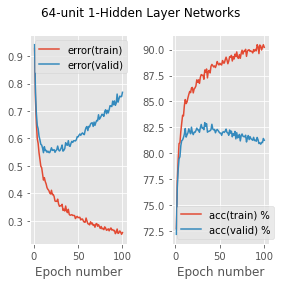

In [74]:
#setup hyperparameters
batch_size = 100
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47

hidden_dim = 64

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 1

stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks-2',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')

In [75]:
# fig_1.savefig(f'../images/t1_{hidden_dim}_unit_error.pdf')
# fig_2.savefig(f'../images/t1_{hidden_dim}_unit_acc.pdf')

In [76]:
print(learning_rate)

0.001


# 128-Unit 1-Hidden Layer

Epoch 1: 4.9s to complete
    error(train)=7.57e-01, acc(train)=7.72e-01, error(valid)=7.76e-01, acc(valid)=7.65e-01


Epoch 2: 4.8s to complete
    error(train)=5.94e-01, acc(train)=8.14e-01, error(valid)=6.37e-01, acc(valid)=7.99e-01


Epoch 3: 4.5s to complete
    error(train)=5.20e-01, acc(train)=8.30e-01, error(valid)=5.76e-01, acc(valid)=8.16e-01


Epoch 4: 5.0s to complete
    error(train)=4.77e-01, acc(train)=8.40e-01, error(valid)=5.56e-01, acc(valid)=8.16e-01


Epoch 5: 4.5s to complete
    error(train)=4.29e-01, acc(train)=8.54e-01, error(valid)=5.19e-01, acc(valid)=8.30e-01


Epoch 6: 4.6s to complete
    error(train)=4.05e-01, acc(train)=8.62e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


Epoch 7: 4.4s to complete
    error(train)=3.91e-01, acc(train)=8.62e-01, error(valid)=5.10e-01, acc(valid)=8.29e-01


Epoch 8: 4.5s to complete
    error(train)=3.77e-01, acc(train)=8.66e-01, error(valid)=5.11e-01, acc(valid)=8.30e-01


Epoch 9: 4.8s to complete
    error(train)=3.50e-01, acc(train)=8.75e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


Epoch 10: 4.6s to complete
    error(train)=3.42e-01, acc(train)=8.77e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 11: 4.6s to complete
    error(train)=3.16e-01, acc(train)=8.84e-01, error(valid)=4.92e-01, acc(valid)=8.39e-01


Epoch 12: 4.6s to complete
    error(train)=3.08e-01, acc(train)=8.85e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


Epoch 13: 4.6s to complete
    error(train)=2.99e-01, acc(train)=8.90e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


Epoch 14: 4.7s to complete
    error(train)=2.86e-01, acc(train)=8.94e-01, error(valid)=5.01e-01, acc(valid)=8.42e-01


Epoch 15: 4.7s to complete
    error(train)=2.85e-01, acc(train)=8.93e-01, error(valid)=5.14e-01, acc(valid)=8.42e-01


Epoch 16: 4.4s to complete
    error(train)=2.66e-01, acc(train)=8.99e-01, error(valid)=5.07e-01, acc(valid)=8.42e-01


Epoch 17: 4.9s to complete
    error(train)=2.53e-01, acc(train)=9.04e-01, error(valid)=5.15e-01, acc(valid)=8.43e-01


Epoch 18: 5.1s to complete
    error(train)=2.68e-01, acc(train)=8.97e-01, error(valid)=5.42e-01, acc(valid)=8.36e-01


Epoch 19: 4.8s to complete
    error(train)=2.52e-01, acc(train)=9.04e-01, error(valid)=5.41e-01, acc(valid)=8.35e-01


Epoch 20: 4.7s to complete
    error(train)=2.30e-01, acc(train)=9.12e-01, error(valid)=5.35e-01, acc(valid)=8.39e-01


Epoch 21: 4.1s to complete
    error(train)=2.36e-01, acc(train)=9.09e-01, error(valid)=5.43e-01, acc(valid)=8.39e-01


Epoch 22: 4.3s to complete
    error(train)=2.27e-01, acc(train)=9.12e-01, error(valid)=5.60e-01, acc(valid)=8.41e-01


Epoch 23: 4.2s to complete
    error(train)=2.15e-01, acc(train)=9.16e-01, error(valid)=5.62e-01, acc(valid)=8.41e-01


Epoch 24: 4.2s to complete
    error(train)=2.09e-01, acc(train)=9.18e-01, error(valid)=5.65e-01, acc(valid)=8.40e-01


Epoch 25: 4.1s to complete
    error(train)=2.14e-01, acc(train)=9.15e-01, error(valid)=5.81e-01, acc(valid)=8.36e-01


Epoch 26: 4.3s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=5.86e-01, acc(valid)=8.35e-01


Epoch 27: 5.3s to complete
    error(train)=2.09e-01, acc(train)=9.17e-01, error(valid)=6.08e-01, acc(valid)=8.36e-01


Epoch 28: 4.4s to complete
    error(train)=2.04e-01, acc(train)=9.20e-01, error(valid)=6.17e-01, acc(valid)=8.36e-01


Epoch 29: 4.3s to complete
    error(train)=1.97e-01, acc(train)=9.21e-01, error(valid)=6.40e-01, acc(valid)=8.35e-01


Epoch 30: 4.3s to complete
    error(train)=1.93e-01, acc(train)=9.22e-01, error(valid)=6.46e-01, acc(valid)=8.29e-01


Epoch 31: 4.1s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=6.52e-01, acc(valid)=8.32e-01


Epoch 32: 4.1s to complete
    error(train)=1.81e-01, acc(train)=9.27e-01, error(valid)=6.53e-01, acc(valid)=8.33e-01


Epoch 33: 4.1s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=6.88e-01, acc(valid)=8.29e-01


Epoch 34: 4.0s to complete
    error(train)=1.79e-01, acc(train)=9.28e-01, error(valid)=6.89e-01, acc(valid)=8.32e-01


Epoch 35: 3.9s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=7.03e-01, acc(valid)=8.34e-01


Epoch 36: 4.1s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=7.20e-01, acc(valid)=8.30e-01


Epoch 37: 4.0s to complete
    error(train)=1.72e-01, acc(train)=9.31e-01, error(valid)=7.27e-01, acc(valid)=8.30e-01


Epoch 38: 4.4s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=7.38e-01, acc(valid)=8.28e-01


Epoch 39: 4.3s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=7.46e-01, acc(valid)=8.31e-01


Epoch 40: 4.0s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=7.66e-01, acc(valid)=8.32e-01


Epoch 41: 4.0s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=7.96e-01, acc(valid)=8.24e-01


Epoch 42: 4.0s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=8.03e-01, acc(valid)=8.28e-01


Epoch 43: 3.9s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=8.18e-01, acc(valid)=8.25e-01


Epoch 44: 4.0s to complete
    error(train)=1.55e-01, acc(train)=9.37e-01, error(valid)=8.22e-01, acc(valid)=8.25e-01


Epoch 45: 4.0s to complete
    error(train)=1.55e-01, acc(train)=9.35e-01, error(valid)=8.37e-01, acc(valid)=8.26e-01


Epoch 46: 4.0s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=8.36e-01, acc(valid)=8.30e-01


Epoch 47: 4.0s to complete
    error(train)=1.51e-01, acc(train)=9.37e-01, error(valid)=8.65e-01, acc(valid)=8.27e-01


Epoch 48: 4.0s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=8.63e-01, acc(valid)=8.26e-01


Epoch 49: 4.0s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=8.66e-01, acc(valid)=8.28e-01


Epoch 50: 4.0s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=9.06e-01, acc(valid)=8.26e-01


Epoch 51: 4.0s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=8.79e-01, acc(valid)=8.29e-01


Epoch 52: 4.0s to complete
    error(train)=1.35e-01, acc(train)=9.45e-01, error(valid)=9.27e-01, acc(valid)=8.26e-01


Epoch 53: 3.9s to complete
    error(train)=1.44e-01, acc(train)=9.40e-01, error(valid)=9.47e-01, acc(valid)=8.24e-01


Epoch 54: 4.0s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=9.39e-01, acc(valid)=8.25e-01


Epoch 55: 4.0s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=9.63e-01, acc(valid)=8.20e-01


Epoch 56: 4.1s to complete
    error(train)=1.40e-01, acc(train)=9.42e-01, error(valid)=9.74e-01, acc(valid)=8.21e-01


Epoch 57: 3.9s to complete
    error(train)=1.33e-01, acc(train)=9.44e-01, error(valid)=9.93e-01, acc(valid)=8.23e-01


Epoch 58: 4.0s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=9.84e-01, acc(valid)=8.22e-01


Epoch 59: 4.0s to complete
    error(train)=1.40e-01, acc(train)=9.42e-01, error(valid)=1.02e+00, acc(valid)=8.21e-01


Epoch 60: 4.0s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=1.02e+00, acc(valid)=8.23e-01


Epoch 61: 5.3s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=1.04e+00, acc(valid)=8.23e-01


Epoch 62: 4.0s to complete
    error(train)=1.31e-01, acc(train)=9.46e-01, error(valid)=1.05e+00, acc(valid)=8.25e-01


Epoch 63: 4.0s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=1.08e+00, acc(valid)=8.17e-01


Epoch 64: 4.1s to complete
    error(train)=1.21e-01, acc(train)=9.50e-01, error(valid)=1.08e+00, acc(valid)=8.20e-01


Epoch 65: 4.0s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=1.12e+00, acc(valid)=8.22e-01


Epoch 66: 4.0s to complete
    error(train)=1.22e-01, acc(train)=9.48e-01, error(valid)=1.11e+00, acc(valid)=8.21e-01


Epoch 67: 4.2s to complete
    error(train)=1.25e-01, acc(train)=9.48e-01, error(valid)=1.13e+00, acc(valid)=8.24e-01


Epoch 68: 4.5s to complete
    error(train)=1.18e-01, acc(train)=9.50e-01, error(valid)=1.12e+00, acc(valid)=8.19e-01


Epoch 69: 5.5s to complete
    error(train)=1.24e-01, acc(train)=9.50e-01, error(valid)=1.15e+00, acc(valid)=8.23e-01


Epoch 70: 5.1s to complete
    error(train)=1.12e-01, acc(train)=9.53e-01, error(valid)=1.14e+00, acc(valid)=8.22e-01


Epoch 71: 4.6s to complete
    error(train)=1.09e-01, acc(train)=9.55e-01, error(valid)=1.17e+00, acc(valid)=8.23e-01


Epoch 72: 4.7s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.20e+00, acc(valid)=8.21e-01


Epoch 73: 4.7s to complete
    error(train)=1.29e-01, acc(train)=9.46e-01, error(valid)=1.20e+00, acc(valid)=8.19e-01


Epoch 74: 4.6s to complete
    error(train)=1.12e-01, acc(train)=9.53e-01, error(valid)=1.21e+00, acc(valid)=8.19e-01


Epoch 75: 4.6s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.25e+00, acc(valid)=8.16e-01


Epoch 76: 4.6s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.23e+00, acc(valid)=8.18e-01


Epoch 77: 4.7s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.25e+00, acc(valid)=8.21e-01


Epoch 78: 4.7s to complete
    error(train)=1.06e-01, acc(train)=9.57e-01, error(valid)=1.26e+00, acc(valid)=8.22e-01


Epoch 79: 4.6s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.30e+00, acc(valid)=8.19e-01


Epoch 80: 4.6s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.30e+00, acc(valid)=8.20e-01


Epoch 81: 4.7s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.32e+00, acc(valid)=8.19e-01


Epoch 82: 4.6s to complete
    error(train)=1.13e-01, acc(train)=9.56e-01, error(valid)=1.32e+00, acc(valid)=8.22e-01


Epoch 83: 4.8s to complete
    error(train)=1.23e-01, acc(train)=9.50e-01, error(valid)=1.35e+00, acc(valid)=8.18e-01


Epoch 84: 4.6s to complete
    error(train)=1.01e-01, acc(train)=9.58e-01, error(valid)=1.34e+00, acc(valid)=8.20e-01


Epoch 85: 4.5s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.36e+00, acc(valid)=8.18e-01


Epoch 86: 4.6s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.40e+00, acc(valid)=8.16e-01


Epoch 87: 4.6s to complete
    error(train)=1.13e-01, acc(train)=9.55e-01, error(valid)=1.39e+00, acc(valid)=8.21e-01


Epoch 88: 4.5s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.40e+00, acc(valid)=8.17e-01


Epoch 89: 4.4s to complete
    error(train)=1.04e-01, acc(train)=9.58e-01, error(valid)=1.41e+00, acc(valid)=8.19e-01


Epoch 90: 4.5s to complete
    error(train)=1.12e-01, acc(train)=9.54e-01, error(valid)=1.46e+00, acc(valid)=8.15e-01


Epoch 91: 4.7s to complete
    error(train)=1.03e-01, acc(train)=9.57e-01, error(valid)=1.44e+00, acc(valid)=8.19e-01


Epoch 92: 4.8s to complete
    error(train)=8.90e-02, acc(train)=9.63e-01, error(valid)=1.45e+00, acc(valid)=8.22e-01


Epoch 93: 4.4s to complete
    error(train)=1.01e-01, acc(train)=9.59e-01, error(valid)=1.47e+00, acc(valid)=8.21e-01


Epoch 94: 4.4s to complete
    error(train)=1.08e-01, acc(train)=9.55e-01, error(valid)=1.52e+00, acc(valid)=8.15e-01


Epoch 95: 4.4s to complete
    error(train)=8.98e-02, acc(train)=9.63e-01, error(valid)=1.50e+00, acc(valid)=8.19e-01


Epoch 96: 4.4s to complete
    error(train)=1.11e-01, acc(train)=9.55e-01, error(valid)=1.53e+00, acc(valid)=8.12e-01


Epoch 97: 4.4s to complete
    error(train)=9.92e-02, acc(train)=9.59e-01, error(valid)=1.53e+00, acc(valid)=8.17e-01


Epoch 98: 4.5s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.53e+00, acc(valid)=8.13e-01


Epoch 99: 4.5s to complete
    error(train)=9.62e-02, acc(train)=9.61e-01, error(valid)=1.54e+00, acc(valid)=8.19e-01


Epoch 100: 4.4s to complete
    error(train)=9.86e-02, acc(train)=9.59e-01, error(valid)=1.53e+00, acc(valid)=8.16e-01


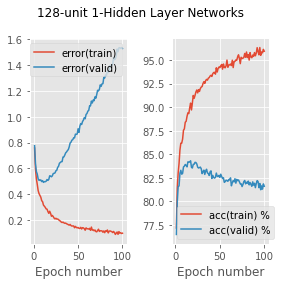

In [80]:
#setup hyperparameters
batch_size = 100
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47
hidden_dim = 128

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 1

stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer-2.pdf')

# 128-Unit 2-Hidden Layer

Epoch 1: 3.4s to complete
    error(train)=7.16e-01, acc(train)=7.71e-01, error(valid)=7.35e-01, acc(valid)=7.69e-01


Epoch 2: 3.7s to complete
    error(train)=5.64e-01, acc(train)=8.16e-01, error(valid)=6.08e-01, acc(valid)=8.04e-01


Epoch 3: 6.0s to complete
    error(train)=4.69e-01, acc(train)=8.40e-01, error(valid)=5.35e-01, acc(valid)=8.21e-01


Epoch 4: 5.4s to complete
    error(train)=4.31e-01, acc(train)=8.46e-01, error(valid)=5.14e-01, acc(valid)=8.21e-01


Epoch 5: 5.6s to complete
    error(train)=4.11e-01, acc(train)=8.56e-01, error(valid)=5.11e-01, acc(valid)=8.29e-01


Epoch 6: 5.0s to complete
    error(train)=3.87e-01, acc(train)=8.62e-01, error(valid)=5.08e-01, acc(valid)=8.29e-01


Epoch 7: 5.2s to complete
    error(train)=3.64e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.32e-01


Epoch 8: 5.8s to complete
    error(train)=3.36e-01, acc(train)=8.78e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


Epoch 9: 5.6s to complete
    error(train)=3.24e-01, acc(train)=8.80e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


Epoch 10: 5.5s to complete
    error(train)=3.19e-01, acc(train)=8.81e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


Epoch 11: 5.5s to complete
    error(train)=3.03e-01, acc(train)=8.85e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 12: 5.1s to complete
    error(train)=2.93e-01, acc(train)=8.89e-01, error(valid)=5.13e-01, acc(valid)=8.39e-01


Epoch 13: 5.6s to complete
    error(train)=2.75e-01, acc(train)=8.96e-01, error(valid)=5.09e-01, acc(valid)=8.40e-01


Epoch 14: 5.9s to complete
    error(train)=2.68e-01, acc(train)=8.98e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 15: 5.5s to complete
    error(train)=2.52e-01, acc(train)=9.02e-01, error(valid)=5.18e-01, acc(valid)=8.42e-01


Epoch 16: 5.2s to complete
    error(train)=2.48e-01, acc(train)=9.03e-01, error(valid)=5.41e-01, acc(valid)=8.40e-01


Epoch 17: 5.2s to complete
    error(train)=2.41e-01, acc(train)=9.05e-01, error(valid)=5.52e-01, acc(valid)=8.38e-01


Epoch 18: 5.7s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=5.48e-01, acc(valid)=8.38e-01


Epoch 19: 5.7s to complete
    error(train)=2.30e-01, acc(train)=9.09e-01, error(valid)=5.72e-01, acc(valid)=8.37e-01


Epoch 20: 5.8s to complete
    error(train)=2.26e-01, acc(train)=9.09e-01, error(valid)=5.76e-01, acc(valid)=8.40e-01


Epoch 21: 5.3s to complete
    error(train)=2.19e-01, acc(train)=9.13e-01, error(valid)=5.90e-01, acc(valid)=8.36e-01


Epoch 22: 5.4s to complete
    error(train)=2.29e-01, acc(train)=9.07e-01, error(valid)=6.21e-01, acc(valid)=8.32e-01


Epoch 23: 5.1s to complete
    error(train)=2.24e-01, acc(train)=9.10e-01, error(valid)=6.36e-01, acc(valid)=8.32e-01


Epoch 24: 5.8s to complete
    error(train)=2.09e-01, acc(train)=9.15e-01, error(valid)=6.47e-01, acc(valid)=8.34e-01


Epoch 25: 5.6s to complete
    error(train)=2.01e-01, acc(train)=9.18e-01, error(valid)=6.46e-01, acc(valid)=8.33e-01


Epoch 26: 5.1s to complete
    error(train)=1.90e-01, acc(train)=9.22e-01, error(valid)=6.58e-01, acc(valid)=8.33e-01


Epoch 27: 6.5s to complete
    error(train)=2.02e-01, acc(train)=9.18e-01, error(valid)=6.95e-01, acc(valid)=8.28e-01


Epoch 28: 6.0s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=6.64e-01, acc(valid)=8.33e-01


Epoch 29: 5.4s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=6.98e-01, acc(valid)=8.33e-01


Epoch 30: 5.1s to complete
    error(train)=1.85e-01, acc(train)=9.24e-01, error(valid)=7.16e-01, acc(valid)=8.30e-01


Epoch 31: 5.6s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=7.61e-01, acc(valid)=8.30e-01


Epoch 32: 5.2s to complete
    error(train)=1.75e-01, acc(train)=9.28e-01, error(valid)=7.20e-01, acc(valid)=8.33e-01


Epoch 33: 5.8s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=7.58e-01, acc(valid)=8.34e-01


Epoch 34: 5.1s to complete
    error(train)=1.63e-01, acc(train)=9.32e-01, error(valid)=7.43e-01, acc(valid)=8.35e-01


Epoch 35: 5.7s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=7.99e-01, acc(valid)=8.30e-01


Epoch 36: 5.6s to complete
    error(train)=1.62e-01, acc(train)=9.32e-01, error(valid)=8.09e-01, acc(valid)=8.32e-01


Epoch 37: 5.0s to complete
    error(train)=1.74e-01, acc(train)=9.29e-01, error(valid)=8.15e-01, acc(valid)=8.34e-01


Epoch 38: 5.0s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=8.46e-01, acc(valid)=8.30e-01


Epoch 39: 5.1s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=8.65e-01, acc(valid)=8.27e-01


Epoch 40: 5.9s to complete
    error(train)=1.68e-01, acc(train)=9.31e-01, error(valid)=8.56e-01, acc(valid)=8.27e-01


Epoch 41: 6.0s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=9.04e-01, acc(valid)=8.27e-01


Epoch 42: 5.2s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=8.74e-01, acc(valid)=8.32e-01


Epoch 43: 6.0s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=8.76e-01, acc(valid)=8.32e-01


Epoch 44: 5.3s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=9.18e-01, acc(valid)=8.31e-01


Epoch 45: 5.2s to complete
    error(train)=1.49e-01, acc(train)=9.39e-01, error(valid)=9.40e-01, acc(valid)=8.25e-01


Epoch 46: 5.3s to complete
    error(train)=1.53e-01, acc(train)=9.35e-01, error(valid)=9.81e-01, acc(valid)=8.24e-01


Epoch 47: 5.2s to complete
    error(train)=1.50e-01, acc(train)=9.37e-01, error(valid)=9.49e-01, acc(valid)=8.27e-01


Epoch 48: 5.5s to complete
    error(train)=1.42e-01, acc(train)=9.41e-01, error(valid)=9.73e-01, acc(valid)=8.32e-01


Epoch 49: 5.4s to complete
    error(train)=1.42e-01, acc(train)=9.42e-01, error(valid)=9.97e-01, acc(valid)=8.28e-01


Epoch 50: 5.8s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=1.03e+00, acc(valid)=8.23e-01


Epoch 51: 5.6s to complete
    error(train)=1.45e-01, acc(train)=9.40e-01, error(valid)=1.03e+00, acc(valid)=8.33e-01


Epoch 52: 5.1s to complete
    error(train)=1.34e-01, acc(train)=9.44e-01, error(valid)=1.02e+00, acc(valid)=8.28e-01


Epoch 53: 5.0s to complete
    error(train)=1.36e-01, acc(train)=9.45e-01, error(valid)=1.05e+00, acc(valid)=8.29e-01


Epoch 54: 5.6s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.06e+00, acc(valid)=8.26e-01


Epoch 55: 5.1s to complete
    error(train)=1.39e-01, acc(train)=9.45e-01, error(valid)=1.09e+00, acc(valid)=8.28e-01


Epoch 56: 5.2s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=1.10e+00, acc(valid)=8.27e-01


Epoch 57: 5.0s to complete
    error(train)=1.38e-01, acc(train)=9.42e-01, error(valid)=1.09e+00, acc(valid)=8.26e-01


Epoch 58: 5.0s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.13e+00, acc(valid)=8.28e-01


Epoch 59: 5.6s to complete
    error(train)=1.30e-01, acc(train)=9.47e-01, error(valid)=1.10e+00, acc(valid)=8.27e-01


Epoch 60: 5.3s to complete
    error(train)=1.46e-01, acc(train)=9.42e-01, error(valid)=1.13e+00, acc(valid)=8.24e-01


Epoch 61: 5.1s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=1.14e+00, acc(valid)=8.31e-01


Epoch 62: 5.0s to complete
    error(train)=1.31e-01, acc(train)=9.48e-01, error(valid)=1.19e+00, acc(valid)=8.28e-01


Epoch 63: 4.9s to complete
    error(train)=1.49e-01, acc(train)=9.42e-01, error(valid)=1.19e+00, acc(valid)=8.20e-01


Epoch 64: 5.0s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.18e+00, acc(valid)=8.28e-01


Epoch 65: 4.9s to complete
    error(train)=1.35e-01, acc(train)=9.46e-01, error(valid)=1.20e+00, acc(valid)=8.24e-01


Epoch 66: 4.9s to complete
    error(train)=1.37e-01, acc(train)=9.45e-01, error(valid)=1.27e+00, acc(valid)=8.25e-01


Epoch 67: 4.9s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.24e+00, acc(valid)=8.27e-01


Epoch 68: 4.9s to complete
    error(train)=1.43e-01, acc(train)=9.44e-01, error(valid)=1.24e+00, acc(valid)=8.20e-01


Epoch 69: 4.9s to complete
    error(train)=1.22e-01, acc(train)=9.51e-01, error(valid)=1.26e+00, acc(valid)=8.27e-01


Epoch 70: 4.9s to complete
    error(train)=1.24e-01, acc(train)=9.50e-01, error(valid)=1.29e+00, acc(valid)=8.27e-01


Epoch 71: 4.9s to complete
    error(train)=1.11e-01, acc(train)=9.54e-01, error(valid)=1.25e+00, acc(valid)=8.30e-01


Epoch 72: 5.0s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.27e+00, acc(valid)=8.26e-01


Epoch 73: 5.0s to complete
    error(train)=1.31e-01, acc(train)=9.49e-01, error(valid)=1.32e+00, acc(valid)=8.23e-01


Epoch 74: 4.9s to complete
    error(train)=1.27e-01, acc(train)=9.50e-01, error(valid)=1.35e+00, acc(valid)=8.22e-01


Epoch 75: 4.9s to complete
    error(train)=1.24e-01, acc(train)=9.51e-01, error(valid)=1.33e+00, acc(valid)=8.24e-01


Epoch 76: 4.9s to complete
    error(train)=1.14e-01, acc(train)=9.55e-01, error(valid)=1.32e+00, acc(valid)=8.26e-01


Epoch 77: 4.9s to complete
    error(train)=9.93e-02, acc(train)=9.59e-01, error(valid)=1.33e+00, acc(valid)=8.30e-01


Epoch 78: 5.4s to complete
    error(train)=1.22e-01, acc(train)=9.52e-01, error(valid)=1.38e+00, acc(valid)=8.26e-01


Epoch 79: 4.9s to complete
    error(train)=9.89e-02, acc(train)=9.59e-01, error(valid)=1.36e+00, acc(valid)=8.28e-01


Epoch 80: 4.9s to complete
    error(train)=1.18e-01, acc(train)=9.53e-01, error(valid)=1.46e+00, acc(valid)=8.26e-01


Epoch 81: 4.8s to complete
    error(train)=1.21e-01, acc(train)=9.53e-01, error(valid)=1.43e+00, acc(valid)=8.23e-01


Epoch 82: 5.4s to complete
    error(train)=1.17e-01, acc(train)=9.55e-01, error(valid)=1.41e+00, acc(valid)=8.24e-01


Epoch 83: 5.6s to complete
    error(train)=1.24e-01, acc(train)=9.53e-01, error(valid)=1.48e+00, acc(valid)=8.19e-01


Epoch 84: 5.5s to complete
    error(train)=1.16e-01, acc(train)=9.54e-01, error(valid)=1.46e+00, acc(valid)=8.27e-01


Epoch 85: 5.5s to complete
    error(train)=1.25e-01, acc(train)=9.53e-01, error(valid)=1.52e+00, acc(valid)=8.23e-01


Epoch 86: 5.1s to complete
    error(train)=1.32e-01, acc(train)=9.50e-01, error(valid)=1.51e+00, acc(valid)=8.18e-01


Epoch 87: 6.3s to complete
    error(train)=1.04e-01, acc(train)=9.59e-01, error(valid)=1.50e+00, acc(valid)=8.24e-01


Epoch 88: 5.2s to complete
    error(train)=1.26e-01, acc(train)=9.51e-01, error(valid)=1.52e+00, acc(valid)=8.20e-01


Epoch 89: 5.3s to complete
    error(train)=1.27e-01, acc(train)=9.51e-01, error(valid)=1.57e+00, acc(valid)=8.18e-01


Epoch 90: 5.4s to complete
    error(train)=1.17e-01, acc(train)=9.55e-01, error(valid)=1.50e+00, acc(valid)=8.22e-01


Epoch 91: 5.3s to complete
    error(train)=1.25e-01, acc(train)=9.53e-01, error(valid)=1.63e+00, acc(valid)=8.23e-01


Epoch 92: 5.5s to complete
    error(train)=1.21e-01, acc(train)=9.54e-01, error(valid)=1.56e+00, acc(valid)=8.23e-01


Epoch 93: 5.3s to complete
    error(train)=1.08e-01, acc(train)=9.58e-01, error(valid)=1.56e+00, acc(valid)=8.27e-01


Epoch 94: 5.3s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=1.58e+00, acc(valid)=8.25e-01


Epoch 95: 5.3s to complete
    error(train)=1.24e-01, acc(train)=9.53e-01, error(valid)=1.65e+00, acc(valid)=8.22e-01


Epoch 96: 5.2s to complete
    error(train)=1.23e-01, acc(train)=9.53e-01, error(valid)=1.63e+00, acc(valid)=8.18e-01


Epoch 97: 5.9s to complete
    error(train)=1.17e-01, acc(train)=9.55e-01, error(valid)=1.64e+00, acc(valid)=8.22e-01


Epoch 98: 6.1s to complete
    error(train)=9.83e-02, acc(train)=9.62e-01, error(valid)=1.60e+00, acc(valid)=8.27e-01


Epoch 99: 6.4s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=1.62e+00, acc(valid)=8.23e-01


Epoch 100: 5.8s to complete
    error(train)=1.03e-01, acc(train)=9.60e-01, error(valid)=1.67e+00, acc(valid)=8.23e-01


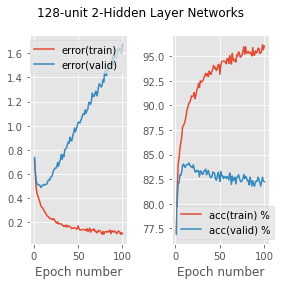

In [78]:
#setup hyperparameters
batch_size = 100
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47
hidden_dim = 128

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 2
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')

# 128-Unit 3-Hidden Layer

Epoch 1: 5.9s to complete
    error(train)=7.50e-01, acc(train)=7.64e-01, error(valid)=7.73e-01, acc(valid)=7.59e-01


Epoch 2: 6.1s to complete
    error(train)=5.74e-01, acc(train)=8.09e-01, error(valid)=6.22e-01, acc(valid)=7.97e-01


Epoch 3: 5.9s to complete
    error(train)=4.90e-01, acc(train)=8.35e-01, error(valid)=5.61e-01, acc(valid)=8.18e-01


Epoch 4: 5.9s to complete
    error(train)=4.35e-01, acc(train)=8.48e-01, error(valid)=5.20e-01, acc(valid)=8.28e-01


Epoch 5: 6.0s to complete
    error(train)=4.22e-01, acc(train)=8.50e-01, error(valid)=5.21e-01, acc(valid)=8.25e-01


Epoch 6: 5.3s to complete
    error(train)=3.82e-01, acc(train)=8.64e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


Epoch 7: 5.5s to complete
    error(train)=3.54e-01, acc(train)=8.72e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


Epoch 8: 6.0s to complete
    error(train)=3.35e-01, acc(train)=8.77e-01, error(valid)=4.83e-01, acc(valid)=8.40e-01


Epoch 9: 6.9s to complete
    error(train)=3.32e-01, acc(train)=8.77e-01, error(valid)=4.97e-01, acc(valid)=8.41e-01


Epoch 10: 6.7s to complete
    error(train)=3.11e-01, acc(train)=8.85e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


Epoch 11: 6.4s to complete
    error(train)=2.97e-01, acc(train)=8.88e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


Epoch 12: 7.0s to complete
    error(train)=2.90e-01, acc(train)=8.89e-01, error(valid)=5.08e-01, acc(valid)=8.41e-01


Epoch 13: 6.1s to complete
    error(train)=3.01e-01, acc(train)=8.83e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


Epoch 14: 6.1s to complete
    error(train)=2.65e-01, acc(train)=8.99e-01, error(valid)=5.06e-01, acc(valid)=8.44e-01


Epoch 15: 6.0s to complete
    error(train)=2.65e-01, acc(train)=8.98e-01, error(valid)=5.33e-01, acc(valid)=8.39e-01


Epoch 16: 6.0s to complete
    error(train)=2.51e-01, acc(train)=9.01e-01, error(valid)=5.29e-01, acc(valid)=8.40e-01


Epoch 17: 5.8s to complete
    error(train)=2.52e-01, acc(train)=9.02e-01, error(valid)=5.54e-01, acc(valid)=8.38e-01


Epoch 18: 5.8s to complete
    error(train)=2.36e-01, acc(train)=9.05e-01, error(valid)=5.60e-01, acc(valid)=8.42e-01


Epoch 19: 6.1s to complete
    error(train)=2.31e-01, acc(train)=9.08e-01, error(valid)=5.72e-01, acc(valid)=8.42e-01


Epoch 20: 6.0s to complete
    error(train)=2.26e-01, acc(train)=9.11e-01, error(valid)=5.80e-01, acc(valid)=8.39e-01


Epoch 21: 5.8s to complete
    error(train)=2.23e-01, acc(train)=9.11e-01, error(valid)=5.91e-01, acc(valid)=8.39e-01


Epoch 22: 5.8s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=5.89e-01, acc(valid)=8.36e-01


Epoch 23: 5.8s to complete
    error(train)=2.14e-01, acc(train)=9.14e-01, error(valid)=6.08e-01, acc(valid)=8.40e-01


Epoch 24: 6.1s to complete
    error(train)=2.36e-01, acc(train)=9.05e-01, error(valid)=6.26e-01, acc(valid)=8.36e-01


Epoch 25: 5.8s to complete
    error(train)=2.18e-01, acc(train)=9.12e-01, error(valid)=6.39e-01, acc(valid)=8.35e-01


Epoch 26: 6.1s to complete
    error(train)=2.03e-01, acc(train)=9.17e-01, error(valid)=6.38e-01, acc(valid)=8.37e-01


Epoch 27: 6.0s to complete
    error(train)=1.85e-01, acc(train)=9.25e-01, error(valid)=6.30e-01, acc(valid)=8.40e-01


Epoch 28: 6.3s to complete
    error(train)=1.98e-01, acc(train)=9.19e-01, error(valid)=6.75e-01, acc(valid)=8.34e-01


Epoch 29: 6.5s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=6.73e-01, acc(valid)=8.36e-01


Epoch 30: 6.4s to complete
    error(train)=1.86e-01, acc(train)=9.22e-01, error(valid)=6.77e-01, acc(valid)=8.32e-01


Epoch 31: 6.2s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=6.98e-01, acc(valid)=8.35e-01


Epoch 32: 6.1s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=7.01e-01, acc(valid)=8.30e-01


Epoch 33: 7.2s to complete
    error(train)=1.75e-01, acc(train)=9.29e-01, error(valid)=7.05e-01, acc(valid)=8.38e-01


Epoch 34: 5.8s to complete
    error(train)=1.69e-01, acc(train)=9.29e-01, error(valid)=7.25e-01, acc(valid)=8.35e-01


Epoch 35: 6.2s to complete
    error(train)=1.71e-01, acc(train)=9.29e-01, error(valid)=7.24e-01, acc(valid)=8.36e-01


Epoch 36: 5.8s to complete
    error(train)=1.74e-01, acc(train)=9.27e-01, error(valid)=7.39e-01, acc(valid)=8.34e-01


Epoch 37: 6.1s to complete
    error(train)=1.73e-01, acc(train)=9.28e-01, error(valid)=7.64e-01, acc(valid)=8.32e-01


Epoch 38: 5.8s to complete
    error(train)=1.83e-01, acc(train)=9.26e-01, error(valid)=7.96e-01, acc(valid)=8.34e-01


Epoch 39: 5.8s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=7.95e-01, acc(valid)=8.36e-01


Epoch 40: 6.0s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=8.13e-01, acc(valid)=8.34e-01


Epoch 41: 6.1s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=8.21e-01, acc(valid)=8.31e-01


Epoch 42: 5.9s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=8.06e-01, acc(valid)=8.34e-01


Epoch 43: 5.9s to complete
    error(train)=1.69e-01, acc(train)=9.31e-01, error(valid)=8.64e-01, acc(valid)=8.22e-01


Epoch 44: 5.8s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=8.58e-01, acc(valid)=8.38e-01


Epoch 45: 6.2s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=8.74e-01, acc(valid)=8.30e-01


Epoch 46: 6.0s to complete
    error(train)=1.61e-01, acc(train)=9.34e-01, error(valid)=8.38e-01, acc(valid)=8.37e-01


Epoch 47: 6.3s to complete
    error(train)=1.71e-01, acc(train)=9.33e-01, error(valid)=9.15e-01, acc(valid)=8.29e-01


Epoch 48: 5.8s to complete
    error(train)=1.58e-01, acc(train)=9.36e-01, error(valid)=8.93e-01, acc(valid)=8.32e-01


Epoch 49: 6.0s to complete
    error(train)=1.58e-01, acc(train)=9.37e-01, error(valid)=8.94e-01, acc(valid)=8.33e-01


Epoch 50: 6.1s to complete
    error(train)=1.54e-01, acc(train)=9.37e-01, error(valid)=8.94e-01, acc(valid)=8.33e-01


Epoch 51: 5.5s to complete
    error(train)=1.65e-01, acc(train)=9.35e-01, error(valid)=9.23e-01, acc(valid)=8.28e-01


Epoch 52: 6.0s to complete
    error(train)=1.53e-01, acc(train)=9.39e-01, error(valid)=9.22e-01, acc(valid)=8.30e-01


Epoch 53: 7.3s to complete
    error(train)=1.51e-01, acc(train)=9.39e-01, error(valid)=9.26e-01, acc(valid)=8.34e-01


Epoch 54: 7.2s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=9.31e-01, acc(valid)=8.33e-01


Epoch 55: 7.0s to complete
    error(train)=1.46e-01, acc(train)=9.41e-01, error(valid)=9.58e-01, acc(valid)=8.28e-01


Epoch 56: 7.3s to complete
    error(train)=1.52e-01, acc(train)=9.39e-01, error(valid)=9.61e-01, acc(valid)=8.28e-01


Epoch 57: 6.3s to complete
    error(train)=1.55e-01, acc(train)=9.38e-01, error(valid)=1.01e+00, acc(valid)=8.31e-01


Epoch 58: 6.7s to complete
    error(train)=1.41e-01, acc(train)=9.43e-01, error(valid)=1.00e+00, acc(valid)=8.32e-01


Epoch 59: 6.6s to complete
    error(train)=1.49e-01, acc(train)=9.42e-01, error(valid)=1.02e+00, acc(valid)=8.32e-01


Epoch 60: 7.1s to complete
    error(train)=1.52e-01, acc(train)=9.39e-01, error(valid)=1.03e+00, acc(valid)=8.28e-01


Epoch 61: 7.8s to complete
    error(train)=1.52e-01, acc(train)=9.41e-01, error(valid)=1.03e+00, acc(valid)=8.26e-01


Epoch 62: 7.4s to complete
    error(train)=1.53e-01, acc(train)=9.39e-01, error(valid)=1.05e+00, acc(valid)=8.26e-01


Epoch 63: 7.3s to complete
    error(train)=1.32e-01, acc(train)=9.47e-01, error(valid)=1.01e+00, acc(valid)=8.33e-01


Epoch 64: 6.6s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=1.07e+00, acc(valid)=8.28e-01


Epoch 65: 6.4s to complete
    error(train)=1.43e-01, acc(train)=9.43e-01, error(valid)=1.03e+00, acc(valid)=8.27e-01


Epoch 66: 6.4s to complete
    error(train)=1.41e-01, acc(train)=9.45e-01, error(valid)=1.12e+00, acc(valid)=8.32e-01


Epoch 67: 7.0s to complete
    error(train)=1.60e-01, acc(train)=9.38e-01, error(valid)=1.12e+00, acc(valid)=8.24e-01


Epoch 68: 6.1s to complete
    error(train)=1.54e-01, acc(train)=9.40e-01, error(valid)=1.10e+00, acc(valid)=8.25e-01


Epoch 69: 6.0s to complete
    error(train)=1.45e-01, acc(train)=9.44e-01, error(valid)=1.14e+00, acc(valid)=8.28e-01


Epoch 70: 7.1s to complete
    error(train)=1.41e-01, acc(train)=9.44e-01, error(valid)=1.11e+00, acc(valid)=8.34e-01


Epoch 71: 6.5s to complete
    error(train)=1.42e-01, acc(train)=9.44e-01, error(valid)=1.10e+00, acc(valid)=8.29e-01


Epoch 72: 7.4s to complete
    error(train)=1.32e-01, acc(train)=9.48e-01, error(valid)=1.14e+00, acc(valid)=8.33e-01


Epoch 73: 6.6s to complete
    error(train)=1.36e-01, acc(train)=9.46e-01, error(valid)=1.11e+00, acc(valid)=8.30e-01


Epoch 74: 6.3s to complete
    error(train)=1.46e-01, acc(train)=9.43e-01, error(valid)=1.18e+00, acc(valid)=8.29e-01


Epoch 75: 6.2s to complete
    error(train)=1.41e-01, acc(train)=9.44e-01, error(valid)=1.17e+00, acc(valid)=8.24e-01


Epoch 76: 6.1s to complete
    error(train)=1.21e-01, acc(train)=9.51e-01, error(valid)=1.19e+00, acc(valid)=8.27e-01


Epoch 77: 6.6s to complete
    error(train)=1.24e-01, acc(train)=9.52e-01, error(valid)=1.16e+00, acc(valid)=8.31e-01


Epoch 78: 6.0s to complete
    error(train)=1.27e-01, acc(train)=9.49e-01, error(valid)=1.18e+00, acc(valid)=8.28e-01


Epoch 79: 6.0s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.18e+00, acc(valid)=8.28e-01


Epoch 80: 7.1s to complete
    error(train)=1.37e-01, acc(train)=9.47e-01, error(valid)=1.19e+00, acc(valid)=8.28e-01


Epoch 81: 7.3s to complete
    error(train)=1.25e-01, acc(train)=9.51e-01, error(valid)=1.23e+00, acc(valid)=8.31e-01


Epoch 82: 7.4s to complete
    error(train)=1.27e-01, acc(train)=9.51e-01, error(valid)=1.22e+00, acc(valid)=8.25e-01


Epoch 83: 7.1s to complete
    error(train)=1.23e-01, acc(train)=9.52e-01, error(valid)=1.25e+00, acc(valid)=8.32e-01


Epoch 84: 6.9s to complete
    error(train)=1.28e-01, acc(train)=9.49e-01, error(valid)=1.24e+00, acc(valid)=8.29e-01


Epoch 85: 6.8s to complete
    error(train)=1.24e-01, acc(train)=9.52e-01, error(valid)=1.25e+00, acc(valid)=8.29e-01


Epoch 86: 6.7s to complete
    error(train)=1.34e-01, acc(train)=9.49e-01, error(valid)=1.30e+00, acc(valid)=8.26e-01


Epoch 87: 6.1s to complete
    error(train)=1.27e-01, acc(train)=9.50e-01, error(valid)=1.28e+00, acc(valid)=8.27e-01


Epoch 88: 6.2s to complete
    error(train)=1.50e-01, acc(train)=9.47e-01, error(valid)=1.35e+00, acc(valid)=8.27e-01


Epoch 89: 6.3s to complete
    error(train)=1.28e-01, acc(train)=9.50e-01, error(valid)=1.30e+00, acc(valid)=8.31e-01


Epoch 90: 7.2s to complete
    error(train)=1.34e-01, acc(train)=9.49e-01, error(valid)=1.31e+00, acc(valid)=8.29e-01


Epoch 91: 6.5s to complete
    error(train)=1.21e-01, acc(train)=9.53e-01, error(valid)=1.32e+00, acc(valid)=8.31e-01


Epoch 92: 6.4s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.30e+00, acc(valid)=8.32e-01


Epoch 93: 6.6s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.34e+00, acc(valid)=8.25e-01


Epoch 94: 6.8s to complete
    error(train)=1.12e-01, acc(train)=9.56e-01, error(valid)=1.35e+00, acc(valid)=8.27e-01


Epoch 95: 6.6s to complete
    error(train)=1.41e-01, acc(train)=9.48e-01, error(valid)=1.40e+00, acc(valid)=8.23e-01


Epoch 96: 7.5s to complete
    error(train)=1.25e-01, acc(train)=9.51e-01, error(valid)=1.32e+00, acc(valid)=8.26e-01


Epoch 97: 6.3s to complete
    error(train)=1.19e-01, acc(train)=9.54e-01, error(valid)=1.36e+00, acc(valid)=8.30e-01


Epoch 98: 6.9s to complete
    error(train)=1.27e-01, acc(train)=9.53e-01, error(valid)=1.38e+00, acc(valid)=8.26e-01


Epoch 99: 6.7s to complete
    error(train)=1.20e-01, acc(train)=9.54e-01, error(valid)=1.40e+00, acc(valid)=8.31e-01


Epoch 100: 6.9s to complete
    error(train)=1.29e-01, acc(train)=9.51e-01, error(valid)=1.39e+00, acc(valid)=8.30e-01


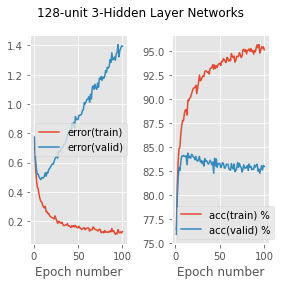

In [79]:
#setup hyperparameters
batch_size = 100
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47
hidden_dim = 128

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 3
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')

# Task 2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)

#Fixed hyperparameter for task 1
batch_size = 100
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47


# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f3980c451c0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f3980c45310>)


In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats_t2(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
        title,
        notebook=True
):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig = plt.figure(figsize=(8, 4))
    plt.suptitle(title)
    ax_1 = fig.add_subplot(121)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    
    min_err_valid = np.min(stats[1:, keys['error(valid)']])
    min_err_valid_iter = np.argmin(stats[1:, keys['error(valid)']]) + 1
    

    # Plot the change in the validation and training set accuracy over training.
#     fig_2 = plt.figure(figsize=(4, 4))
    ax_2 = fig.add_subplot(122)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]] * 100, label=f'{k} %')
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    #get the maximum accuracy in train and validation    
    max_acc_valid = np.max(stats[1:, keys['acc(valid)']])
    max_acc_valid_iter = np.argmax(stats[1:, keys['acc(valid)']]) + 1
    
    fig.tight_layout()
    
    with open(f'../evaluations/{title.replace(" ","-")}.pickle', 'wb') as f:
        pickle.dump((stats, keys, run_time), f)
    print(f"""
    {title}
    minimum error valid iteration: {min_err_valid_iter}
    minimum error valid          : {min_err_valid}
    
    maximum acc valid iteration  : {max_acc_valid_iter}
    maximum acc valid            : {max_acc_valid}
    
    """)
    
    plt.show()
    return stats, keys, run_time, fig, ax_1, ax_2

# Varying Dropout Rate

In [85]:
dropout_rates = [0.5, 0.6, 0.7, 0.8]

0.5
0.001
0


Epoch 1: 4.5s to complete
    error(train)=4.39e+00, acc(train)=5.42e-01, error(valid)=4.43e+00, acc(valid)=5.37e-01


Epoch 2: 4.5s to complete
    error(train)=4.13e+00, acc(train)=6.34e-01, error(valid)=4.25e+00, acc(valid)=6.25e-01


Epoch 3: 7.2s to complete
    error(train)=3.34e+00, acc(train)=6.76e-01, error(valid)=3.48e+00, acc(valid)=6.69e-01


Epoch 4: 7.3s to complete
    error(train)=3.20e+00, acc(train)=7.11e-01, error(valid)=3.35e+00, acc(valid)=6.99e-01


Epoch 5: 7.0s to complete
    error(train)=3.06e+00, acc(train)=7.26e-01, error(valid)=3.26e+00, acc(valid)=7.17e-01


Epoch 6: 7.0s to complete
    error(train)=2.99e+00, acc(train)=7.37e-01, error(valid)=3.26e+00, acc(valid)=7.22e-01


Epoch 7: 7.0s to complete
    error(train)=2.79e+00, acc(train)=7.42e-01, error(valid)=3.09e+00, acc(valid)=7.29e-01


Epoch 8: 7.4s to complete
    error(train)=2.71e+00, acc(train)=7.55e-01, error(valid)=3.02e+00, acc(valid)=7.46e-01


Epoch 9: 7.5s to complete
    error(train)=2.55e+00, acc(train)=7.62e-01, error(valid)=2.86e+00, acc(valid)=7.51e-01


Epoch 10: 7.5s to complete
    error(train)=2.26e+00, acc(train)=7.77e-01, error(valid)=2.57e+00, acc(valid)=7.63e-01


Epoch 11: 7.1s to complete
    error(train)=2.39e+00, acc(train)=7.72e-01, error(valid)=2.75e+00, acc(valid)=7.57e-01


Epoch 12: 7.5s to complete
    error(train)=2.41e+00, acc(train)=7.74e-01, error(valid)=2.83e+00, acc(valid)=7.59e-01


Epoch 13: 6.8s to complete
    error(train)=2.18e+00, acc(train)=7.79e-01, error(valid)=2.60e+00, acc(valid)=7.63e-01


Epoch 14: 7.0s to complete
    error(train)=2.00e+00, acc(train)=7.90e-01, error(valid)=2.39e+00, acc(valid)=7.74e-01


Epoch 15: 6.8s to complete
    error(train)=2.15e+00, acc(train)=7.84e-01, error(valid)=2.59e+00, acc(valid)=7.68e-01


Epoch 16: 6.7s to complete
    error(train)=2.10e+00, acc(train)=7.92e-01, error(valid)=2.53e+00, acc(valid)=7.75e-01


Epoch 17: 6.8s to complete
    error(train)=2.09e+00, acc(train)=7.82e-01, error(valid)=2.56e+00, acc(valid)=7.65e-01


Epoch 18: 6.7s to complete
    error(train)=1.93e+00, acc(train)=8.01e-01, error(valid)=2.37e+00, acc(valid)=7.83e-01


Epoch 19: 6.8s to complete
    error(train)=1.88e+00, acc(train)=8.06e-01, error(valid)=2.33e+00, acc(valid)=7.88e-01


Epoch 20: 6.7s to complete
    error(train)=1.89e+00, acc(train)=8.04e-01, error(valid)=2.33e+00, acc(valid)=7.83e-01


Epoch 21: 6.8s to complete
    error(train)=1.87e+00, acc(train)=8.02e-01, error(valid)=2.32e+00, acc(valid)=7.84e-01


Epoch 22: 6.7s to complete
    error(train)=1.90e+00, acc(train)=8.05e-01, error(valid)=2.36e+00, acc(valid)=7.84e-01


Epoch 23: 6.7s to complete
    error(train)=1.84e+00, acc(train)=8.07e-01, error(valid)=2.33e+00, acc(valid)=7.86e-01


Epoch 24: 6.7s to complete
    error(train)=1.84e+00, acc(train)=8.04e-01, error(valid)=2.34e+00, acc(valid)=7.80e-01


Epoch 25: 7.1s to complete
    error(train)=1.85e+00, acc(train)=8.11e-01, error(valid)=2.32e+00, acc(valid)=7.87e-01


Epoch 26: 6.7s to complete
    error(train)=1.75e+00, acc(train)=8.11e-01, error(valid)=2.22e+00, acc(valid)=7.93e-01


Epoch 27: 6.8s to complete
    error(train)=1.77e+00, acc(train)=8.15e-01, error(valid)=2.23e+00, acc(valid)=7.96e-01


Epoch 28: 6.7s to complete
    error(train)=1.65e+00, acc(train)=8.18e-01, error(valid)=2.16e+00, acc(valid)=7.97e-01


Epoch 29: 6.8s to complete
    error(train)=1.76e+00, acc(train)=8.10e-01, error(valid)=2.26e+00, acc(valid)=7.92e-01


Epoch 30: 7.9s to complete
    error(train)=1.68e+00, acc(train)=8.18e-01, error(valid)=2.19e+00, acc(valid)=7.96e-01


Epoch 31: 7.0s to complete
    error(train)=1.64e+00, acc(train)=8.17e-01, error(valid)=2.21e+00, acc(valid)=7.95e-01


Epoch 32: 7.1s to complete
    error(train)=1.61e+00, acc(train)=8.22e-01, error(valid)=2.14e+00, acc(valid)=7.98e-01


Epoch 33: 7.1s to complete
    error(train)=1.67e+00, acc(train)=8.17e-01, error(valid)=2.18e+00, acc(valid)=7.96e-01


Epoch 34: 7.0s to complete
    error(train)=1.61e+00, acc(train)=8.14e-01, error(valid)=2.07e+00, acc(valid)=7.96e-01


Epoch 35: 6.7s to complete
    error(train)=1.57e+00, acc(train)=8.22e-01, error(valid)=2.09e+00, acc(valid)=8.00e-01


Epoch 36: 6.7s to complete
    error(train)=1.58e+00, acc(train)=8.24e-01, error(valid)=2.13e+00, acc(valid)=8.03e-01


Epoch 37: 6.7s to complete
    error(train)=1.57e+00, acc(train)=8.21e-01, error(valid)=2.08e+00, acc(valid)=7.99e-01


Epoch 38: 6.8s to complete
    error(train)=1.63e+00, acc(train)=8.21e-01, error(valid)=2.18e+00, acc(valid)=7.96e-01


Epoch 39: 6.7s to complete
    error(train)=1.60e+00, acc(train)=8.22e-01, error(valid)=2.18e+00, acc(valid)=7.98e-01


Epoch 40: 7.0s to complete
    error(train)=1.51e+00, acc(train)=8.26e-01, error(valid)=2.06e+00, acc(valid)=8.01e-01


Epoch 41: 6.6s to complete
    error(train)=1.46e+00, acc(train)=8.29e-01, error(valid)=1.99e+00, acc(valid)=8.06e-01


Epoch 42: 6.8s to complete
    error(train)=1.59e+00, acc(train)=8.25e-01, error(valid)=2.14e+00, acc(valid)=8.01e-01


Epoch 43: 6.8s to complete
    error(train)=1.60e+00, acc(train)=8.26e-01, error(valid)=2.15e+00, acc(valid)=8.03e-01


Epoch 44: 6.8s to complete
    error(train)=1.43e+00, acc(train)=8.28e-01, error(valid)=1.98e+00, acc(valid)=8.04e-01


Epoch 45: 6.9s to complete
    error(train)=1.51e+00, acc(train)=8.29e-01, error(valid)=2.05e+00, acc(valid)=8.02e-01


Epoch 46: 7.9s to complete
    error(train)=1.57e+00, acc(train)=8.28e-01, error(valid)=2.17e+00, acc(valid)=8.02e-01


Epoch 47: 6.7s to complete
    error(train)=1.45e+00, acc(train)=8.29e-01, error(valid)=2.01e+00, acc(valid)=8.06e-01


Epoch 48: 6.8s to complete
    error(train)=1.52e+00, acc(train)=8.30e-01, error(valid)=2.08e+00, acc(valid)=8.05e-01


Epoch 49: 6.9s to complete
    error(train)=1.50e+00, acc(train)=8.31e-01, error(valid)=2.08e+00, acc(valid)=8.03e-01


Epoch 50: 6.8s to complete
    error(train)=1.50e+00, acc(train)=8.30e-01, error(valid)=2.10e+00, acc(valid)=8.05e-01


Epoch 51: 6.7s to complete
    error(train)=1.45e+00, acc(train)=8.31e-01, error(valid)=2.05e+00, acc(valid)=8.07e-01


Epoch 52: 6.8s to complete
    error(train)=1.46e+00, acc(train)=8.29e-01, error(valid)=2.10e+00, acc(valid)=8.03e-01


Epoch 53: 6.7s to complete
    error(train)=1.49e+00, acc(train)=8.28e-01, error(valid)=2.08e+00, acc(valid)=8.01e-01


Epoch 54: 6.7s to complete
    error(train)=1.50e+00, acc(train)=8.29e-01, error(valid)=2.11e+00, acc(valid)=8.04e-01


Epoch 55: 6.8s to complete
    error(train)=1.52e+00, acc(train)=8.29e-01, error(valid)=2.13e+00, acc(valid)=8.02e-01


Epoch 56: 6.6s to complete
    error(train)=1.46e+00, acc(train)=8.28e-01, error(valid)=2.09e+00, acc(valid)=8.03e-01


Epoch 57: 6.8s to complete
    error(train)=1.41e+00, acc(train)=8.27e-01, error(valid)=1.99e+00, acc(valid)=8.02e-01


Epoch 58: 6.8s to complete
    error(train)=1.44e+00, acc(train)=8.31e-01, error(valid)=2.09e+00, acc(valid)=8.03e-01


Epoch 59: 6.6s to complete
    error(train)=1.58e+00, acc(train)=8.28e-01, error(valid)=2.23e+00, acc(valid)=8.02e-01


Epoch 60: 6.7s to complete
    error(train)=1.48e+00, acc(train)=8.35e-01, error(valid)=2.13e+00, acc(valid)=8.07e-01


Epoch 61: 6.8s to complete
    error(train)=1.41e+00, acc(train)=8.35e-01, error(valid)=2.04e+00, acc(valid)=8.07e-01


Epoch 62: 6.8s to complete
    error(train)=1.43e+00, acc(train)=8.32e-01, error(valid)=2.05e+00, acc(valid)=8.06e-01


Epoch 63: 6.7s to complete
    error(train)=1.36e+00, acc(train)=8.36e-01, error(valid)=1.94e+00, acc(valid)=8.09e-01


Epoch 64: 6.7s to complete
    error(train)=1.42e+00, acc(train)=8.30e-01, error(valid)=2.05e+00, acc(valid)=8.02e-01


Epoch 65: 6.7s to complete
    error(train)=1.34e+00, acc(train)=8.37e-01, error(valid)=1.97e+00, acc(valid)=8.10e-01


Epoch 66: 6.9s to complete
    error(train)=1.40e+00, acc(train)=8.36e-01, error(valid)=2.03e+00, acc(valid)=8.09e-01


Epoch 67: 7.0s to complete
    error(train)=1.44e+00, acc(train)=8.35e-01, error(valid)=2.07e+00, acc(valid)=8.07e-01


Epoch 68: 7.3s to complete
    error(train)=1.44e+00, acc(train)=8.30e-01, error(valid)=2.06e+00, acc(valid)=8.01e-01


Epoch 69: 6.8s to complete
    error(train)=1.35e+00, acc(train)=8.37e-01, error(valid)=1.96e+00, acc(valid)=8.05e-01


Epoch 70: 6.8s to complete
    error(train)=1.33e+00, acc(train)=8.38e-01, error(valid)=1.93e+00, acc(valid)=8.07e-01


Epoch 71: 7.4s to complete
    error(train)=1.45e+00, acc(train)=8.35e-01, error(valid)=2.05e+00, acc(valid)=8.08e-01


Epoch 72: 6.5s to complete
    error(train)=1.44e+00, acc(train)=8.37e-01, error(valid)=2.12e+00, acc(valid)=8.07e-01


Epoch 73: 6.3s to complete
    error(train)=1.38e+00, acc(train)=8.36e-01, error(valid)=2.03e+00, acc(valid)=8.09e-01


Epoch 74: 6.3s to complete
    error(train)=1.40e+00, acc(train)=8.39e-01, error(valid)=2.02e+00, acc(valid)=8.10e-01


Epoch 75: 6.7s to complete
    error(train)=1.35e+00, acc(train)=8.39e-01, error(valid)=2.00e+00, acc(valid)=8.10e-01


Epoch 76: 6.6s to complete
    error(train)=1.36e+00, acc(train)=8.37e-01, error(valid)=2.00e+00, acc(valid)=8.10e-01


Epoch 77: 6.5s to complete
    error(train)=1.42e+00, acc(train)=8.36e-01, error(valid)=2.06e+00, acc(valid)=8.07e-01


Epoch 78: 6.2s to complete
    error(train)=1.38e+00, acc(train)=8.37e-01, error(valid)=2.03e+00, acc(valid)=8.11e-01


Epoch 79: 6.1s to complete
    error(train)=1.45e+00, acc(train)=8.36e-01, error(valid)=2.08e+00, acc(valid)=8.08e-01


Epoch 80: 6.1s to complete
    error(train)=1.37e+00, acc(train)=8.38e-01, error(valid)=2.02e+00, acc(valid)=8.07e-01


Epoch 81: 6.0s to complete
    error(train)=1.35e+00, acc(train)=8.38e-01, error(valid)=2.04e+00, acc(valid)=8.07e-01


Epoch 82: 6.1s to complete
    error(train)=1.31e+00, acc(train)=8.38e-01, error(valid)=1.93e+00, acc(valid)=8.07e-01


Epoch 83: 6.1s to complete
    error(train)=1.41e+00, acc(train)=8.41e-01, error(valid)=2.06e+00, acc(valid)=8.12e-01


Epoch 84: 6.3s to complete
    error(train)=1.34e+00, acc(train)=8.40e-01, error(valid)=1.97e+00, acc(valid)=8.10e-01


Epoch 85: 6.3s to complete
    error(train)=1.34e+00, acc(train)=8.38e-01, error(valid)=1.97e+00, acc(valid)=8.07e-01


Epoch 86: 6.2s to complete
    error(train)=1.32e+00, acc(train)=8.42e-01, error(valid)=1.95e+00, acc(valid)=8.11e-01


Epoch 87: 6.3s to complete
    error(train)=1.35e+00, acc(train)=8.41e-01, error(valid)=2.04e+00, acc(valid)=8.09e-01


Epoch 88: 6.0s to complete
    error(train)=1.28e+00, acc(train)=8.41e-01, error(valid)=1.94e+00, acc(valid)=8.10e-01


Epoch 89: 6.0s to complete
    error(train)=1.34e+00, acc(train)=8.42e-01, error(valid)=2.04e+00, acc(valid)=8.12e-01


Epoch 90: 7.0s to complete
    error(train)=1.31e+00, acc(train)=8.43e-01, error(valid)=1.96e+00, acc(valid)=8.13e-01


Epoch 91: 6.1s to complete
    error(train)=1.32e+00, acc(train)=8.42e-01, error(valid)=1.98e+00, acc(valid)=8.13e-01


Epoch 92: 6.1s to complete
    error(train)=1.35e+00, acc(train)=8.41e-01, error(valid)=2.01e+00, acc(valid)=8.10e-01


Epoch 93: 6.0s to complete
    error(train)=1.36e+00, acc(train)=8.41e-01, error(valid)=2.02e+00, acc(valid)=8.11e-01


Epoch 94: 6.0s to complete
    error(train)=1.37e+00, acc(train)=8.42e-01, error(valid)=2.05e+00, acc(valid)=8.11e-01


Epoch 95: 6.1s to complete
    error(train)=1.30e+00, acc(train)=8.40e-01, error(valid)=1.95e+00, acc(valid)=8.11e-01


Epoch 96: 6.8s to complete
    error(train)=1.28e+00, acc(train)=8.42e-01, error(valid)=1.94e+00, acc(valid)=8.11e-01


Epoch 97: 7.6s to complete
    error(train)=1.37e+00, acc(train)=8.41e-01, error(valid)=2.07e+00, acc(valid)=8.08e-01


Epoch 98: 8.1s to complete
    error(train)=1.32e+00, acc(train)=8.43e-01, error(valid)=2.03e+00, acc(valid)=8.11e-01


Epoch 99: 7.5s to complete
    error(train)=1.31e+00, acc(train)=8.41e-01, error(valid)=2.00e+00, acc(valid)=8.10e-01


Epoch 100: 7.2s to complete
    error(train)=1.37e+00, acc(train)=8.43e-01, error(valid)=2.08e+00, acc(valid)=8.10e-01




    128-unit-3-Hidden-Layer-Dropout-0.5-Networks
    minimum error valid iteration: 82
    minimum error valid          : 1.9259912479236994
    
    maximum acc valid iteration  : 90
    maximum acc valid            : 0.8134810126582277
    
    


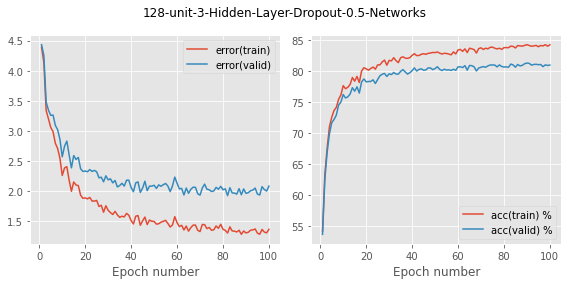

0.6
0.001
0


Epoch 1: 6.5s to complete
    error(train)=2.47e+00, acc(train)=6.24e-01, error(valid)=2.49e+00, acc(valid)=6.19e-01


Epoch 2: 6.3s to complete
    error(train)=2.20e+00, acc(train)=7.00e-01, error(valid)=2.26e+00, acc(valid)=6.93e-01


Epoch 3: 6.2s to complete
    error(train)=1.81e+00, acc(train)=7.39e-01, error(valid)=1.91e+00, acc(valid)=7.32e-01


Epoch 4: 6.2s to complete
    error(train)=1.76e+00, acc(train)=7.51e-01, error(valid)=1.89e+00, acc(valid)=7.45e-01


Epoch 5: 6.4s to complete
    error(train)=1.72e+00, acc(train)=7.69e-01, error(valid)=1.88e+00, acc(valid)=7.61e-01


Epoch 6: 6.1s to complete
    error(train)=1.62e+00, acc(train)=7.82e-01, error(valid)=1.80e+00, acc(valid)=7.71e-01


Epoch 7: 6.3s to complete
    error(train)=1.49e+00, acc(train)=7.91e-01, error(valid)=1.67e+00, acc(valid)=7.83e-01


Epoch 8: 6.4s to complete
    error(train)=1.52e+00, acc(train)=7.90e-01, error(valid)=1.74e+00, acc(valid)=7.79e-01


Epoch 9: 6.5s to complete
    error(train)=1.43e+00, acc(train)=8.01e-01, error(valid)=1.64e+00, acc(valid)=7.90e-01


Epoch 10: 6.7s to complete
    error(train)=1.25e+00, acc(train)=8.03e-01, error(valid)=1.47e+00, acc(valid)=7.92e-01


Epoch 11: 6.6s to complete
    error(train)=1.30e+00, acc(train)=8.06e-01, error(valid)=1.53e+00, acc(valid)=7.90e-01


Epoch 12: 6.6s to complete
    error(train)=1.25e+00, acc(train)=8.12e-01, error(valid)=1.50e+00, acc(valid)=7.99e-01


Epoch 13: 6.5s to complete
    error(train)=1.24e+00, acc(train)=8.15e-01, error(valid)=1.48e+00, acc(valid)=8.01e-01


Epoch 14: 6.4s to complete
    error(train)=1.10e+00, acc(train)=8.19e-01, error(valid)=1.33e+00, acc(valid)=8.06e-01


Epoch 15: 6.5s to complete
    error(train)=1.15e+00, acc(train)=8.21e-01, error(valid)=1.41e+00, acc(valid)=8.06e-01


Epoch 16: 6.6s to complete
    error(train)=1.11e+00, acc(train)=8.23e-01, error(valid)=1.37e+00, acc(valid)=8.07e-01


Epoch 17: 6.6s to complete
    error(train)=1.08e+00, acc(train)=8.25e-01, error(valid)=1.35e+00, acc(valid)=8.07e-01


Epoch 18: 6.4s to complete
    error(train)=1.08e+00, acc(train)=8.27e-01, error(valid)=1.36e+00, acc(valid)=8.10e-01


Epoch 19: 6.5s to complete
    error(train)=1.12e+00, acc(train)=8.23e-01, error(valid)=1.37e+00, acc(valid)=8.07e-01


Epoch 20: 6.9s to complete
    error(train)=1.03e+00, acc(train)=8.28e-01, error(valid)=1.29e+00, acc(valid)=8.12e-01


Epoch 21: 6.4s to complete
    error(train)=1.04e+00, acc(train)=8.27e-01, error(valid)=1.33e+00, acc(valid)=8.09e-01


Epoch 22: 6.6s to complete
    error(train)=1.01e+00, acc(train)=8.31e-01, error(valid)=1.28e+00, acc(valid)=8.11e-01


Epoch 23: 6.4s to complete
    error(train)=9.55e-01, acc(train)=8.34e-01, error(valid)=1.25e+00, acc(valid)=8.15e-01


Epoch 24: 6.5s to complete
    error(train)=9.83e-01, acc(train)=8.34e-01, error(valid)=1.30e+00, acc(valid)=8.13e-01


Epoch 25: 6.7s to complete
    error(train)=1.00e+00, acc(train)=8.33e-01, error(valid)=1.30e+00, acc(valid)=8.12e-01


Epoch 26: 6.4s to complete
    error(train)=9.31e-01, acc(train)=8.31e-01, error(valid)=1.23e+00, acc(valid)=8.11e-01


Epoch 27: 6.5s to complete
    error(train)=9.35e-01, acc(train)=8.36e-01, error(valid)=1.24e+00, acc(valid)=8.16e-01


Epoch 28: 6.6s to complete
    error(train)=9.14e-01, acc(train)=8.37e-01, error(valid)=1.23e+00, acc(valid)=8.17e-01


Epoch 29: 6.8s to complete
    error(train)=9.43e-01, acc(train)=8.36e-01, error(valid)=1.27e+00, acc(valid)=8.15e-01


Epoch 30: 6.5s to complete
    error(train)=9.24e-01, acc(train)=8.39e-01, error(valid)=1.25e+00, acc(valid)=8.18e-01


Epoch 31: 6.5s to complete
    error(train)=8.99e-01, acc(train)=8.41e-01, error(valid)=1.22e+00, acc(valid)=8.18e-01


Epoch 32: 6.5s to complete
    error(train)=8.96e-01, acc(train)=8.42e-01, error(valid)=1.22e+00, acc(valid)=8.21e-01


Epoch 33: 6.8s to complete
    error(train)=8.96e-01, acc(train)=8.40e-01, error(valid)=1.21e+00, acc(valid)=8.16e-01


Epoch 34: 6.7s to complete
    error(train)=8.89e-01, acc(train)=8.40e-01, error(valid)=1.22e+00, acc(valid)=8.18e-01


Epoch 35: 6.7s to complete
    error(train)=8.83e-01, acc(train)=8.41e-01, error(valid)=1.22e+00, acc(valid)=8.17e-01


Epoch 36: 6.5s to complete
    error(train)=8.93e-01, acc(train)=8.40e-01, error(valid)=1.23e+00, acc(valid)=8.20e-01


Epoch 37: 6.5s to complete
    error(train)=8.56e-01, acc(train)=8.42e-01, error(valid)=1.19e+00, acc(valid)=8.18e-01


Epoch 38: 6.4s to complete
    error(train)=8.49e-01, acc(train)=8.44e-01, error(valid)=1.16e+00, acc(valid)=8.19e-01


Epoch 39: 6.8s to complete
    error(train)=8.66e-01, acc(train)=8.44e-01, error(valid)=1.19e+00, acc(valid)=8.23e-01


Epoch 40: 6.5s to complete
    error(train)=8.72e-01, acc(train)=8.41e-01, error(valid)=1.20e+00, acc(valid)=8.19e-01


Epoch 41: 6.8s to complete
    error(train)=8.15e-01, acc(train)=8.47e-01, error(valid)=1.13e+00, acc(valid)=8.24e-01


Epoch 42: 6.5s to complete
    error(train)=8.83e-01, acc(train)=8.43e-01, error(valid)=1.23e+00, acc(valid)=8.20e-01


Epoch 43: 6.5s to complete
    error(train)=8.39e-01, acc(train)=8.43e-01, error(valid)=1.18e+00, acc(valid)=8.21e-01


Epoch 44: 6.5s to complete
    error(train)=7.98e-01, acc(train)=8.46e-01, error(valid)=1.14e+00, acc(valid)=8.20e-01


Epoch 45: 6.5s to complete
    error(train)=8.41e-01, acc(train)=8.46e-01, error(valid)=1.20e+00, acc(valid)=8.21e-01


Epoch 46: 6.6s to complete
    error(train)=8.48e-01, acc(train)=8.45e-01, error(valid)=1.22e+00, acc(valid)=8.18e-01


Epoch 47: 6.4s to complete
    error(train)=7.96e-01, acc(train)=8.46e-01, error(valid)=1.14e+00, acc(valid)=8.21e-01


Epoch 48: 6.4s to complete
    error(train)=8.67e-01, acc(train)=8.46e-01, error(valid)=1.22e+00, acc(valid)=8.20e-01


Epoch 49: 6.5s to complete
    error(train)=8.39e-01, acc(train)=8.45e-01, error(valid)=1.20e+00, acc(valid)=8.22e-01


Epoch 50: 6.5s to complete
    error(train)=8.32e-01, acc(train)=8.45e-01, error(valid)=1.20e+00, acc(valid)=8.19e-01


Epoch 51: 6.5s to complete
    error(train)=8.23e-01, acc(train)=8.49e-01, error(valid)=1.19e+00, acc(valid)=8.20e-01


Epoch 52: 6.6s to complete
    error(train)=8.26e-01, acc(train)=8.46e-01, error(valid)=1.19e+00, acc(valid)=8.19e-01


Epoch 53: 6.6s to complete
    error(train)=8.14e-01, acc(train)=8.49e-01, error(valid)=1.19e+00, acc(valid)=8.21e-01


Epoch 54: 6.7s to complete
    error(train)=8.31e-01, acc(train)=8.48e-01, error(valid)=1.21e+00, acc(valid)=8.23e-01


Epoch 55: 6.7s to complete
    error(train)=8.04e-01, acc(train)=8.45e-01, error(valid)=1.18e+00, acc(valid)=8.19e-01


Epoch 56: 6.7s to complete
    error(train)=8.69e-01, acc(train)=8.43e-01, error(valid)=1.25e+00, acc(valid)=8.16e-01


Epoch 57: 7.4s to complete
    error(train)=7.92e-01, acc(train)=8.47e-01, error(valid)=1.14e+00, acc(valid)=8.22e-01


Epoch 58: 6.6s to complete
    error(train)=8.12e-01, acc(train)=8.45e-01, error(valid)=1.17e+00, acc(valid)=8.17e-01


Epoch 59: 6.8s to complete
    error(train)=8.11e-01, acc(train)=8.45e-01, error(valid)=1.18e+00, acc(valid)=8.20e-01


Epoch 60: 6.6s to complete
    error(train)=7.96e-01, acc(train)=8.51e-01, error(valid)=1.18e+00, acc(valid)=8.22e-01


Epoch 61: 6.6s to complete
    error(train)=8.38e-01, acc(train)=8.51e-01, error(valid)=1.24e+00, acc(valid)=8.24e-01


Epoch 62: 6.6s to complete
    error(train)=7.93e-01, acc(train)=8.51e-01, error(valid)=1.16e+00, acc(valid)=8.24e-01


Epoch 63: 6.5s to complete
    error(train)=7.91e-01, acc(train)=8.52e-01, error(valid)=1.17e+00, acc(valid)=8.26e-01


Epoch 64: 6.6s to complete
    error(train)=8.02e-01, acc(train)=8.50e-01, error(valid)=1.19e+00, acc(valid)=8.23e-01


Epoch 65: 6.7s to complete
    error(train)=7.77e-01, acc(train)=8.53e-01, error(valid)=1.18e+00, acc(valid)=8.25e-01


Epoch 66: 6.6s to complete
    error(train)=7.72e-01, acc(train)=8.53e-01, error(valid)=1.18e+00, acc(valid)=8.24e-01


Epoch 67: 6.6s to complete
    error(train)=7.68e-01, acc(train)=8.52e-01, error(valid)=1.16e+00, acc(valid)=8.23e-01


Epoch 68: 6.5s to complete
    error(train)=7.75e-01, acc(train)=8.52e-01, error(valid)=1.17e+00, acc(valid)=8.25e-01


Epoch 69: 6.6s to complete
    error(train)=7.13e-01, acc(train)=8.53e-01, error(valid)=1.08e+00, acc(valid)=8.27e-01


Epoch 70: 6.6s to complete
    error(train)=7.26e-01, acc(train)=8.55e-01, error(valid)=1.08e+00, acc(valid)=8.26e-01


Epoch 71: 6.6s to complete
    error(train)=7.88e-01, acc(train)=8.52e-01, error(valid)=1.18e+00, acc(valid)=8.23e-01


Epoch 72: 6.6s to complete
    error(train)=7.44e-01, acc(train)=8.55e-01, error(valid)=1.13e+00, acc(valid)=8.27e-01


Epoch 73: 6.5s to complete
    error(train)=7.37e-01, acc(train)=8.54e-01, error(valid)=1.12e+00, acc(valid)=8.27e-01


Epoch 74: 6.5s to complete
    error(train)=7.46e-01, acc(train)=8.56e-01, error(valid)=1.15e+00, acc(valid)=8.28e-01


Epoch 75: 6.6s to complete
    error(train)=8.25e-01, acc(train)=8.53e-01, error(valid)=1.25e+00, acc(valid)=8.24e-01


Epoch 76: 6.6s to complete
    error(train)=7.60e-01, acc(train)=8.54e-01, error(valid)=1.18e+00, acc(valid)=8.25e-01


Epoch 77: 7.3s to complete
    error(train)=7.82e-01, acc(train)=8.54e-01, error(valid)=1.21e+00, acc(valid)=8.25e-01


Epoch 78: 6.7s to complete
    error(train)=7.49e-01, acc(train)=8.56e-01, error(valid)=1.16e+00, acc(valid)=8.28e-01


Epoch 79: 6.5s to complete
    error(train)=7.50e-01, acc(train)=8.56e-01, error(valid)=1.15e+00, acc(valid)=8.27e-01


Epoch 80: 6.6s to complete
    error(train)=7.76e-01, acc(train)=8.52e-01, error(valid)=1.19e+00, acc(valid)=8.23e-01


Epoch 81: 6.6s to complete
    error(train)=7.67e-01, acc(train)=8.54e-01, error(valid)=1.20e+00, acc(valid)=8.22e-01


Epoch 82: 6.7s to complete
    error(train)=7.66e-01, acc(train)=8.52e-01, error(valid)=1.18e+00, acc(valid)=8.23e-01


Epoch 83: 6.6s to complete
    error(train)=7.64e-01, acc(train)=8.55e-01, error(valid)=1.19e+00, acc(valid)=8.26e-01


Epoch 84: 6.6s to complete
    error(train)=7.64e-01, acc(train)=8.54e-01, error(valid)=1.21e+00, acc(valid)=8.24e-01


Epoch 85: 6.5s to complete
    error(train)=7.39e-01, acc(train)=8.55e-01, error(valid)=1.16e+00, acc(valid)=8.27e-01


Epoch 86: 6.6s to complete
    error(train)=7.15e-01, acc(train)=8.57e-01, error(valid)=1.12e+00, acc(valid)=8.27e-01


Epoch 87: 6.6s to complete
    error(train)=7.60e-01, acc(train)=8.55e-01, error(valid)=1.18e+00, acc(valid)=8.28e-01


Epoch 88: 6.7s to complete
    error(train)=6.94e-01, acc(train)=8.59e-01, error(valid)=1.08e+00, acc(valid)=8.28e-01


Epoch 89: 6.6s to complete
    error(train)=7.93e-01, acc(train)=8.54e-01, error(valid)=1.22e+00, acc(valid)=8.24e-01


Epoch 90: 6.6s to complete
    error(train)=7.62e-01, acc(train)=8.56e-01, error(valid)=1.22e+00, acc(valid)=8.27e-01


Epoch 91: 6.7s to complete
    error(train)=7.36e-01, acc(train)=8.57e-01, error(valid)=1.17e+00, acc(valid)=8.28e-01


Epoch 92: 6.6s to complete
    error(train)=7.41e-01, acc(train)=8.58e-01, error(valid)=1.15e+00, acc(valid)=8.27e-01


Epoch 93: 6.6s to complete
    error(train)=8.37e-01, acc(train)=8.54e-01, error(valid)=1.29e+00, acc(valid)=8.22e-01


Epoch 94: 6.9s to complete
    error(train)=7.46e-01, acc(train)=8.56e-01, error(valid)=1.19e+00, acc(valid)=8.25e-01


Epoch 95: 6.7s to complete
    error(train)=7.47e-01, acc(train)=8.57e-01, error(valid)=1.17e+00, acc(valid)=8.26e-01


Epoch 96: 6.6s to complete
    error(train)=7.07e-01, acc(train)=8.60e-01, error(valid)=1.14e+00, acc(valid)=8.30e-01


Epoch 97: 6.6s to complete
    error(train)=7.47e-01, acc(train)=8.57e-01, error(valid)=1.20e+00, acc(valid)=8.27e-01


Epoch 98: 6.6s to complete
    error(train)=7.58e-01, acc(train)=8.56e-01, error(valid)=1.18e+00, acc(valid)=8.26e-01


Epoch 99: 7.3s to complete
    error(train)=7.04e-01, acc(train)=8.61e-01, error(valid)=1.13e+00, acc(valid)=8.29e-01


Epoch 100: 6.7s to complete
    error(train)=7.52e-01, acc(train)=8.59e-01, error(valid)=1.19e+00, acc(valid)=8.26e-01




    128-unit-3-Hidden-Layer-Dropout-0.6-Networks
    minimum error valid iteration: 69
    minimum error valid          : 1.0774890940453044
    
    maximum acc valid iteration  : 96
    maximum acc valid            : 0.8296202531645567
    
    


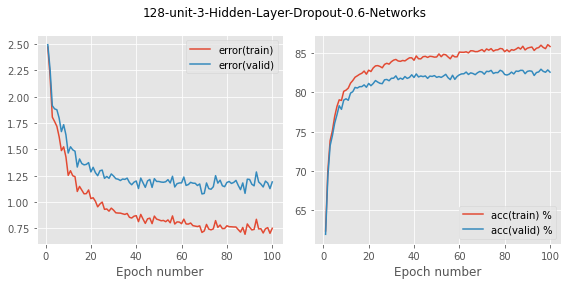

0.7
0.001
0


Epoch 1: 6.3s to complete
    error(train)=1.72e+00, acc(train)=6.84e-01, error(valid)=1.74e+00, acc(valid)=6.84e-01


Epoch 2: 6.4s to complete
    error(train)=1.50e+00, acc(train)=7.23e-01, error(valid)=1.54e+00, acc(valid)=7.20e-01


Epoch 3: 6.4s to complete
    error(train)=1.17e+00, acc(train)=7.71e-01, error(valid)=1.26e+00, acc(valid)=7.61e-01


Epoch 4: 6.4s to complete
    error(train)=1.16e+00, acc(train)=7.82e-01, error(valid)=1.24e+00, acc(valid)=7.72e-01


Epoch 5: 6.5s to complete
    error(train)=1.10e+00, acc(train)=7.97e-01, error(valid)=1.22e+00, acc(valid)=7.81e-01


Epoch 6: 6.3s to complete
    error(train)=9.80e-01, acc(train)=8.05e-01, error(valid)=1.09e+00, acc(valid)=7.92e-01


Epoch 7: 6.4s to complete
    error(train)=9.34e-01, acc(train)=8.13e-01, error(valid)=1.07e+00, acc(valid)=7.99e-01


Epoch 8: 6.5s to complete
    error(train)=9.52e-01, acc(train)=8.12e-01, error(valid)=1.11e+00, acc(valid)=7.98e-01


Epoch 9: 6.8s to complete
    error(train)=8.95e-01, acc(train)=8.19e-01, error(valid)=1.01e+00, acc(valid)=8.08e-01


Epoch 10: 6.6s to complete
    error(train)=8.05e-01, acc(train)=8.24e-01, error(valid)=9.43e-01, acc(valid)=8.08e-01


Epoch 11: 6.5s to complete
    error(train)=8.56e-01, acc(train)=8.21e-01, error(valid)=1.01e+00, acc(valid)=8.06e-01


Epoch 12: 6.6s to complete
    error(train)=7.87e-01, acc(train)=8.29e-01, error(valid)=9.51e-01, acc(valid)=8.12e-01


Epoch 13: 6.6s to complete
    error(train)=7.74e-01, acc(train)=8.31e-01, error(valid)=9.41e-01, acc(valid)=8.14e-01


Epoch 14: 6.5s to complete
    error(train)=7.05e-01, acc(train)=8.36e-01, error(valid)=8.77e-01, acc(valid)=8.16e-01


Epoch 15: 6.5s to complete
    error(train)=7.34e-01, acc(train)=8.37e-01, error(valid)=9.14e-01, acc(valid)=8.18e-01


Epoch 16: 6.5s to complete
    error(train)=7.26e-01, acc(train)=8.34e-01, error(valid)=8.98e-01, acc(valid)=8.16e-01


Epoch 17: 6.6s to complete
    error(train)=6.98e-01, acc(train)=8.35e-01, error(valid)=8.80e-01, acc(valid)=8.14e-01


Epoch 18: 6.5s to complete
    error(train)=6.93e-01, acc(train)=8.42e-01, error(valid)=8.90e-01, acc(valid)=8.22e-01


Epoch 19: 6.6s to complete
    error(train)=6.95e-01, acc(train)=8.40e-01, error(valid)=8.89e-01, acc(valid)=8.19e-01


Epoch 20: 6.5s to complete
    error(train)=6.74e-01, acc(train)=8.41e-01, error(valid)=8.60e-01, acc(valid)=8.18e-01


Epoch 21: 7.3s to complete
    error(train)=6.83e-01, acc(train)=8.42e-01, error(valid)=8.95e-01, acc(valid)=8.19e-01


Epoch 22: 6.6s to complete
    error(train)=6.79e-01, acc(train)=8.41e-01, error(valid)=9.02e-01, acc(valid)=8.19e-01


Epoch 23: 6.5s to complete
    error(train)=6.15e-01, acc(train)=8.48e-01, error(valid)=8.22e-01, acc(valid)=8.23e-01


Epoch 24: 6.6s to complete
    error(train)=6.39e-01, acc(train)=8.46e-01, error(valid)=8.47e-01, acc(valid)=8.22e-01


Epoch 25: 6.7s to complete
    error(train)=6.22e-01, acc(train)=8.50e-01, error(valid)=8.38e-01, acc(valid)=8.25e-01


Epoch 26: 6.8s to complete
    error(train)=6.19e-01, acc(train)=8.47e-01, error(valid)=8.21e-01, acc(valid)=8.25e-01


Epoch 27: 6.7s to complete
    error(train)=5.99e-01, acc(train)=8.51e-01, error(valid)=8.09e-01, acc(valid)=8.28e-01


Epoch 28: 6.6s to complete
    error(train)=6.36e-01, acc(train)=8.48e-01, error(valid)=8.60e-01, acc(valid)=8.25e-01


Epoch 29: 6.5s to complete
    error(train)=6.37e-01, acc(train)=8.47e-01, error(valid)=8.49e-01, acc(valid)=8.21e-01


Epoch 30: 6.7s to complete
    error(train)=5.75e-01, acc(train)=8.55e-01, error(valid)=7.90e-01, acc(valid)=8.28e-01


Epoch 31: 6.6s to complete
    error(train)=6.08e-01, acc(train)=8.51e-01, error(valid)=8.43e-01, acc(valid)=8.26e-01


Epoch 32: 6.8s to complete
    error(train)=5.81e-01, acc(train)=8.54e-01, error(valid)=7.96e-01, acc(valid)=8.27e-01


Epoch 33: 6.5s to complete
    error(train)=5.95e-01, acc(train)=8.54e-01, error(valid)=8.23e-01, acc(valid)=8.29e-01


Epoch 34: 6.6s to complete
    error(train)=5.73e-01, acc(train)=8.54e-01, error(valid)=8.10e-01, acc(valid)=8.27e-01


Epoch 35: 6.6s to complete
    error(train)=5.77e-01, acc(train)=8.55e-01, error(valid)=7.92e-01, acc(valid)=8.29e-01


Epoch 36: 6.8s to complete
    error(train)=5.67e-01, acc(train)=8.53e-01, error(valid)=8.07e-01, acc(valid)=8.26e-01


Epoch 37: 6.6s to complete
    error(train)=5.59e-01, acc(train)=8.58e-01, error(valid)=7.97e-01, acc(valid)=8.28e-01


Epoch 38: 6.6s to complete
    error(train)=5.74e-01, acc(train)=8.53e-01, error(valid)=8.03e-01, acc(valid)=8.28e-01


Epoch 39: 6.6s to complete
    error(train)=5.76e-01, acc(train)=8.53e-01, error(valid)=8.05e-01, acc(valid)=8.29e-01


Epoch 40: 6.7s to complete
    error(train)=5.54e-01, acc(train)=8.59e-01, error(valid)=7.96e-01, acc(valid)=8.32e-01


Epoch 41: 6.5s to complete
    error(train)=5.43e-01, acc(train)=8.57e-01, error(valid)=7.71e-01, acc(valid)=8.31e-01


Epoch 42: 6.5s to complete
    error(train)=5.52e-01, acc(train)=8.58e-01, error(valid)=7.92e-01, acc(valid)=8.28e-01


Epoch 43: 7.0s to complete
    error(train)=5.46e-01, acc(train)=8.61e-01, error(valid)=7.92e-01, acc(valid)=8.35e-01


Epoch 44: 6.4s to complete
    error(train)=5.26e-01, acc(train)=8.60e-01, error(valid)=7.72e-01, acc(valid)=8.32e-01


Epoch 45: 6.6s to complete
    error(train)=5.52e-01, acc(train)=8.58e-01, error(valid)=8.21e-01, acc(valid)=8.30e-01


Epoch 46: 6.5s to complete
    error(train)=5.70e-01, acc(train)=8.56e-01, error(valid)=8.24e-01, acc(valid)=8.28e-01


Epoch 47: 6.5s to complete
    error(train)=5.33e-01, acc(train)=8.59e-01, error(valid)=7.93e-01, acc(valid)=8.31e-01


Epoch 48: 6.4s to complete
    error(train)=5.39e-01, acc(train)=8.59e-01, error(valid)=8.00e-01, acc(valid)=8.30e-01


Epoch 49: 6.4s to complete
    error(train)=5.34e-01, acc(train)=8.60e-01, error(valid)=7.82e-01, acc(valid)=8.33e-01


Epoch 50: 6.6s to complete
    error(train)=5.43e-01, acc(train)=8.59e-01, error(valid)=8.02e-01, acc(valid)=8.34e-01


Epoch 51: 6.6s to complete
    error(train)=5.66e-01, acc(train)=8.56e-01, error(valid)=8.36e-01, acc(valid)=8.27e-01


Epoch 52: 6.4s to complete
    error(train)=5.19e-01, acc(train)=8.61e-01, error(valid)=7.68e-01, acc(valid)=8.30e-01


Epoch 53: 6.5s to complete
    error(train)=5.45e-01, acc(train)=8.60e-01, error(valid)=7.93e-01, acc(valid)=8.30e-01


Epoch 54: 6.5s to complete
    error(train)=5.35e-01, acc(train)=8.62e-01, error(valid)=7.95e-01, acc(valid)=8.32e-01


Epoch 55: 6.5s to complete
    error(train)=5.23e-01, acc(train)=8.62e-01, error(valid)=7.83e-01, acc(valid)=8.33e-01


Epoch 56: 6.4s to complete
    error(train)=5.29e-01, acc(train)=8.63e-01, error(valid)=7.98e-01, acc(valid)=8.33e-01


Epoch 57: 6.5s to complete
    error(train)=5.11e-01, acc(train)=8.56e-01, error(valid)=7.62e-01, acc(valid)=8.27e-01


Epoch 58: 6.5s to complete
    error(train)=5.18e-01, acc(train)=8.63e-01, error(valid)=7.78e-01, acc(valid)=8.32e-01


Epoch 59: 6.5s to complete
    error(train)=5.37e-01, acc(train)=8.62e-01, error(valid)=8.06e-01, acc(valid)=8.33e-01


Epoch 60: 6.4s to complete
    error(train)=4.98e-01, acc(train)=8.66e-01, error(valid)=7.70e-01, acc(valid)=8.33e-01


Epoch 61: 6.4s to complete
    error(train)=5.30e-01, acc(train)=8.63e-01, error(valid)=8.11e-01, acc(valid)=8.32e-01


Epoch 62: 6.4s to complete
    error(train)=5.23e-01, acc(train)=8.64e-01, error(valid)=7.92e-01, acc(valid)=8.34e-01


Epoch 63: 6.4s to complete
    error(train)=5.24e-01, acc(train)=8.65e-01, error(valid)=7.95e-01, acc(valid)=8.35e-01


Epoch 64: 6.5s to complete
    error(train)=5.01e-01, acc(train)=8.66e-01, error(valid)=7.71e-01, acc(valid)=8.35e-01


Epoch 65: 7.5s to complete
    error(train)=5.23e-01, acc(train)=8.63e-01, error(valid)=8.06e-01, acc(valid)=8.34e-01


Epoch 66: 6.6s to complete
    error(train)=5.06e-01, acc(train)=8.66e-01, error(valid)=7.75e-01, acc(valid)=8.37e-01


Epoch 67: 6.4s to complete
    error(train)=5.08e-01, acc(train)=8.65e-01, error(valid)=7.75e-01, acc(valid)=8.34e-01


Epoch 68: 6.5s to complete
    error(train)=4.85e-01, acc(train)=8.67e-01, error(valid)=7.47e-01, acc(valid)=8.40e-01


Epoch 69: 6.3s to complete
    error(train)=4.84e-01, acc(train)=8.66e-01, error(valid)=7.50e-01, acc(valid)=8.35e-01


Epoch 70: 6.4s to complete
    error(train)=5.02e-01, acc(train)=8.66e-01, error(valid)=7.72e-01, acc(valid)=8.33e-01


Epoch 71: 6.4s to complete
    error(train)=5.03e-01, acc(train)=8.66e-01, error(valid)=7.72e-01, acc(valid)=8.36e-01


Epoch 72: 6.6s to complete
    error(train)=4.79e-01, acc(train)=8.68e-01, error(valid)=7.60e-01, acc(valid)=8.34e-01


Epoch 73: 6.4s to complete
    error(train)=4.83e-01, acc(train)=8.67e-01, error(valid)=7.51e-01, acc(valid)=8.36e-01


Epoch 74: 6.4s to complete
    error(train)=4.98e-01, acc(train)=8.65e-01, error(valid)=7.63e-01, acc(valid)=8.35e-01


Epoch 75: 6.3s to complete
    error(train)=5.12e-01, acc(train)=8.66e-01, error(valid)=8.02e-01, acc(valid)=8.35e-01


Epoch 76: 6.4s to complete
    error(train)=4.94e-01, acc(train)=8.66e-01, error(valid)=7.77e-01, acc(valid)=8.34e-01


Epoch 77: 6.5s to complete
    error(train)=4.95e-01, acc(train)=8.68e-01, error(valid)=7.77e-01, acc(valid)=8.36e-01


Epoch 78: 6.4s to complete
    error(train)=4.95e-01, acc(train)=8.67e-01, error(valid)=7.71e-01, acc(valid)=8.34e-01


Epoch 79: 6.5s to complete
    error(train)=4.86e-01, acc(train)=8.67e-01, error(valid)=7.68e-01, acc(valid)=8.33e-01


Epoch 80: 6.4s to complete
    error(train)=4.84e-01, acc(train)=8.66e-01, error(valid)=7.55e-01, acc(valid)=8.36e-01


Epoch 81: 6.5s to complete
    error(train)=4.82e-01, acc(train)=8.68e-01, error(valid)=7.67e-01, acc(valid)=8.34e-01


Epoch 82: 6.5s to complete
    error(train)=4.81e-01, acc(train)=8.68e-01, error(valid)=7.54e-01, acc(valid)=8.36e-01


Epoch 83: 6.4s to complete
    error(train)=5.17e-01, acc(train)=8.70e-01, error(valid)=8.15e-01, acc(valid)=8.37e-01


Epoch 84: 6.4s to complete
    error(train)=4.80e-01, acc(train)=8.71e-01, error(valid)=7.85e-01, acc(valid)=8.34e-01


Epoch 85: 6.5s to complete
    error(train)=4.72e-01, acc(train)=8.69e-01, error(valid)=7.54e-01, acc(valid)=8.37e-01


Epoch 86: 6.5s to complete
    error(train)=4.71e-01, acc(train)=8.70e-01, error(valid)=7.55e-01, acc(valid)=8.37e-01


Epoch 87: 7.1s to complete
    error(train)=4.80e-01, acc(train)=8.71e-01, error(valid)=7.93e-01, acc(valid)=8.38e-01


Epoch 88: 6.5s to complete
    error(train)=4.72e-01, acc(train)=8.69e-01, error(valid)=7.59e-01, acc(valid)=8.37e-01


Epoch 89: 6.5s to complete
    error(train)=4.92e-01, acc(train)=8.68e-01, error(valid)=7.93e-01, acc(valid)=8.37e-01


Epoch 90: 6.4s to complete
    error(train)=4.75e-01, acc(train)=8.70e-01, error(valid)=7.58e-01, acc(valid)=8.36e-01


Epoch 91: 6.5s to complete
    error(train)=4.82e-01, acc(train)=8.70e-01, error(valid)=7.72e-01, acc(valid)=8.37e-01


Epoch 92: 6.6s to complete
    error(train)=4.76e-01, acc(train)=8.71e-01, error(valid)=7.63e-01, acc(valid)=8.36e-01


Epoch 93: 6.4s to complete
    error(train)=4.96e-01, acc(train)=8.68e-01, error(valid)=8.01e-01, acc(valid)=8.32e-01


Epoch 94: 6.3s to complete
    error(train)=4.83e-01, acc(train)=8.70e-01, error(valid)=7.75e-01, acc(valid)=8.36e-01


Epoch 95: 6.4s to complete
    error(train)=4.86e-01, acc(train)=8.70e-01, error(valid)=7.90e-01, acc(valid)=8.35e-01


Epoch 96: 6.5s to complete
    error(train)=4.74e-01, acc(train)=8.71e-01, error(valid)=7.88e-01, acc(valid)=8.33e-01


Epoch 97: 6.3s to complete
    error(train)=4.80e-01, acc(train)=8.69e-01, error(valid)=7.88e-01, acc(valid)=8.33e-01


Epoch 98: 6.5s to complete
    error(train)=4.73e-01, acc(train)=8.72e-01, error(valid)=7.88e-01, acc(valid)=8.34e-01


Epoch 99: 6.4s to complete
    error(train)=4.66e-01, acc(train)=8.71e-01, error(valid)=7.79e-01, acc(valid)=8.36e-01


Epoch 100: 6.4s to complete
    error(train)=4.60e-01, acc(train)=8.73e-01, error(valid)=7.59e-01, acc(valid)=8.37e-01




    128-unit-3-Hidden-Layer-Dropout-0.7-Networks
    minimum error valid iteration: 68
    minimum error valid          : 0.7473610911721322
    
    maximum acc valid iteration  : 68
    maximum acc valid            : 0.8398101265822785
    
    


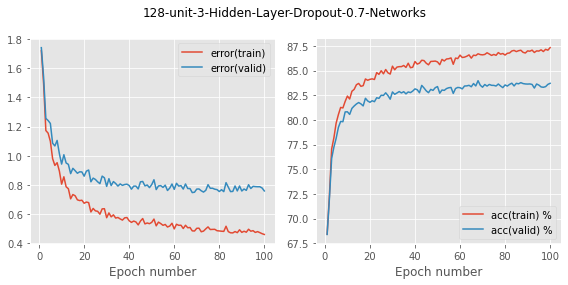

0.8
0.001
0


Epoch 1: 6.2s to complete
    error(train)=1.18e+00, acc(train)=7.13e-01, error(valid)=1.20e+00, acc(valid)=7.11e-01


Epoch 2: 6.6s to complete
    error(train)=9.85e-01, acc(train)=7.62e-01, error(valid)=1.02e+00, acc(valid)=7.57e-01


Epoch 3: 6.6s to complete
    error(train)=8.31e-01, acc(train)=7.89e-01, error(valid)=8.84e-01, acc(valid)=7.79e-01


Epoch 4: 6.6s to complete
    error(train)=7.90e-01, acc(train)=8.03e-01, error(valid)=8.43e-01, acc(valid)=7.98e-01


Epoch 5: 6.5s to complete
    error(train)=7.41e-01, acc(train)=8.14e-01, error(valid)=8.09e-01, acc(valid)=8.05e-01


Epoch 6: 6.7s to complete
    error(train)=6.94e-01, acc(train)=8.20e-01, error(valid)=7.68e-01, acc(valid)=8.07e-01


Epoch 7: 6.7s to complete
    error(train)=6.45e-01, acc(train)=8.28e-01, error(valid)=7.34e-01, acc(valid)=8.17e-01


Epoch 8: 6.6s to complete
    error(train)=6.57e-01, acc(train)=8.30e-01, error(valid)=7.48e-01, acc(valid)=8.18e-01


Epoch 9: 7.5s to complete
    error(train)=6.09e-01, acc(train)=8.35e-01, error(valid)=7.15e-01, acc(valid)=8.21e-01


Epoch 10: 6.6s to complete
    error(train)=5.69e-01, acc(train)=8.38e-01, error(valid)=6.69e-01, acc(valid)=8.23e-01


Epoch 11: 6.8s to complete
    error(train)=5.76e-01, acc(train)=8.41e-01, error(valid)=6.83e-01, acc(valid)=8.28e-01


Epoch 12: 6.6s to complete
    error(train)=5.78e-01, acc(train)=8.41e-01, error(valid)=7.04e-01, acc(valid)=8.25e-01


Epoch 13: 6.5s to complete
    error(train)=5.54e-01, acc(train)=8.45e-01, error(valid)=6.83e-01, acc(valid)=8.28e-01


Epoch 14: 6.5s to complete
    error(train)=5.11e-01, acc(train)=8.49e-01, error(valid)=6.42e-01, acc(valid)=8.29e-01


Epoch 15: 7.5s to complete
    error(train)=5.30e-01, acc(train)=8.49e-01, error(valid)=6.69e-01, acc(valid)=8.29e-01


Epoch 16: 7.9s to complete
    error(train)=5.16e-01, acc(train)=8.50e-01, error(valid)=6.50e-01, acc(valid)=8.30e-01


Epoch 17: 8.2s to complete
    error(train)=4.95e-01, acc(train)=8.52e-01, error(valid)=6.33e-01, acc(valid)=8.32e-01


Epoch 18: 7.4s to complete
    error(train)=5.10e-01, acc(train)=8.53e-01, error(valid)=6.60e-01, acc(valid)=8.35e-01


Epoch 19: 7.1s to complete
    error(train)=4.79e-01, acc(train)=8.56e-01, error(valid)=6.29e-01, acc(valid)=8.34e-01


Epoch 20: 6.7s to complete
    error(train)=4.91e-01, acc(train)=8.54e-01, error(valid)=6.41e-01, acc(valid)=8.34e-01


Epoch 21: 6.7s to complete
    error(train)=4.99e-01, acc(train)=8.55e-01, error(valid)=6.52e-01, acc(valid)=8.31e-01


Epoch 22: 6.5s to complete
    error(train)=5.06e-01, acc(train)=8.52e-01, error(valid)=6.78e-01, acc(valid)=8.28e-01


Epoch 23: 6.6s to complete
    error(train)=4.56e-01, acc(train)=8.61e-01, error(valid)=6.11e-01, acc(valid)=8.39e-01


Epoch 24: 6.6s to complete
    error(train)=4.70e-01, acc(train)=8.59e-01, error(valid)=6.41e-01, acc(valid)=8.34e-01


Epoch 25: 6.6s to complete
    error(train)=4.56e-01, acc(train)=8.62e-01, error(valid)=6.31e-01, acc(valid)=8.38e-01


Epoch 26: 6.6s to complete
    error(train)=4.46e-01, acc(train)=8.59e-01, error(valid)=6.08e-01, acc(valid)=8.33e-01


Epoch 27: 7.2s to complete
    error(train)=4.49e-01, acc(train)=8.61e-01, error(valid)=6.09e-01, acc(valid)=8.39e-01


Epoch 28: 6.9s to complete
    error(train)=4.38e-01, acc(train)=8.64e-01, error(valid)=6.00e-01, acc(valid)=8.38e-01


Epoch 29: 7.1s to complete
    error(train)=4.53e-01, acc(train)=8.62e-01, error(valid)=6.28e-01, acc(valid)=8.39e-01


Epoch 30: 7.0s to complete
    error(train)=4.38e-01, acc(train)=8.63e-01, error(valid)=6.18e-01, acc(valid)=8.36e-01


Epoch 31: 6.6s to complete
    error(train)=4.34e-01, acc(train)=8.64e-01, error(valid)=6.16e-01, acc(valid)=8.35e-01


Epoch 32: 6.4s to complete
    error(train)=4.27e-01, acc(train)=8.67e-01, error(valid)=6.11e-01, acc(valid)=8.38e-01


Epoch 33: 6.7s to complete
    error(train)=4.17e-01, acc(train)=8.67e-01, error(valid)=5.93e-01, acc(valid)=8.41e-01


Epoch 34: 6.6s to complete
    error(train)=4.17e-01, acc(train)=8.68e-01, error(valid)=5.98e-01, acc(valid)=8.42e-01


Epoch 35: 6.6s to complete
    error(train)=4.22e-01, acc(train)=8.67e-01, error(valid)=6.12e-01, acc(valid)=8.38e-01


Epoch 36: 6.6s to complete
    error(train)=4.13e-01, acc(train)=8.69e-01, error(valid)=5.96e-01, acc(valid)=8.40e-01


Epoch 37: 6.6s to complete
    error(train)=4.11e-01, acc(train)=8.69e-01, error(valid)=5.99e-01, acc(valid)=8.41e-01


Epoch 38: 6.6s to complete
    error(train)=4.15e-01, acc(train)=8.68e-01, error(valid)=5.97e-01, acc(valid)=8.38e-01


Epoch 39: 7.4s to complete
    error(train)=4.13e-01, acc(train)=8.69e-01, error(valid)=5.96e-01, acc(valid)=8.40e-01


Epoch 40: 6.7s to complete
    error(train)=4.00e-01, acc(train)=8.73e-01, error(valid)=5.71e-01, acc(valid)=8.46e-01


Epoch 41: 6.6s to complete
    error(train)=4.02e-01, acc(train)=8.69e-01, error(valid)=5.82e-01, acc(valid)=8.41e-01


Epoch 42: 7.2s to complete
    error(train)=3.96e-01, acc(train)=8.71e-01, error(valid)=5.81e-01, acc(valid)=8.40e-01


Epoch 43: 6.7s to complete
    error(train)=3.97e-01, acc(train)=8.72e-01, error(valid)=5.96e-01, acc(valid)=8.42e-01


Epoch 44: 7.0s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=5.74e-01, acc(valid)=8.42e-01


Epoch 45: 7.1s to complete
    error(train)=3.94e-01, acc(train)=8.71e-01, error(valid)=5.90e-01, acc(valid)=8.40e-01


Epoch 46: 7.2s to complete
    error(train)=3.99e-01, acc(train)=8.73e-01, error(valid)=6.09e-01, acc(valid)=8.43e-01


Epoch 47: 6.7s to complete
    error(train)=3.99e-01, acc(train)=8.70e-01, error(valid)=5.98e-01, acc(valid)=8.37e-01


Epoch 48: 6.7s to complete
    error(train)=4.00e-01, acc(train)=8.72e-01, error(valid)=6.01e-01, acc(valid)=8.40e-01


Epoch 49: 7.0s to complete
    error(train)=3.81e-01, acc(train)=8.74e-01, error(valid)=5.81e-01, acc(valid)=8.41e-01


Epoch 50: 6.8s to complete
    error(train)=3.89e-01, acc(train)=8.73e-01, error(valid)=5.97e-01, acc(valid)=8.39e-01


Epoch 51: 7.2s to complete
    error(train)=4.06e-01, acc(train)=8.71e-01, error(valid)=6.33e-01, acc(valid)=8.39e-01


Epoch 52: 6.5s to complete
    error(train)=3.87e-01, acc(train)=8.74e-01, error(valid)=5.91e-01, acc(valid)=8.46e-01


Epoch 53: 6.6s to complete
    error(train)=4.06e-01, acc(train)=8.71e-01, error(valid)=6.22e-01, acc(valid)=8.40e-01


Epoch 54: 6.6s to complete
    error(train)=3.98e-01, acc(train)=8.72e-01, error(valid)=6.12e-01, acc(valid)=8.37e-01


Epoch 55: 6.6s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=5.88e-01, acc(valid)=8.41e-01


Epoch 56: 6.6s to complete
    error(train)=3.88e-01, acc(train)=8.74e-01, error(valid)=6.11e-01, acc(valid)=8.41e-01


Epoch 57: 6.4s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.73e-01, acc(valid)=8.42e-01


Epoch 58: 6.6s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=5.86e-01, acc(valid)=8.43e-01


Epoch 59: 6.8s to complete
    error(train)=3.93e-01, acc(train)=8.75e-01, error(valid)=6.12e-01, acc(valid)=8.43e-01


Epoch 60: 6.6s to complete
    error(train)=3.72e-01, acc(train)=8.76e-01, error(valid)=5.88e-01, acc(valid)=8.44e-01


Epoch 61: 7.9s to complete
    error(train)=3.92e-01, acc(train)=8.74e-01, error(valid)=6.18e-01, acc(valid)=8.41e-01


Epoch 62: 7.5s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=5.83e-01, acc(valid)=8.45e-01


Epoch 63: 7.5s to complete
    error(train)=3.71e-01, acc(train)=8.78e-01, error(valid)=5.92e-01, acc(valid)=8.44e-01


Epoch 64: 7.4s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.77e-01, acc(valid)=8.44e-01


Epoch 65: 7.2s to complete
    error(train)=3.70e-01, acc(train)=8.78e-01, error(valid)=5.93e-01, acc(valid)=8.42e-01


Epoch 66: 7.3s to complete
    error(train)=3.64e-01, acc(train)=8.81e-01, error(valid)=5.84e-01, acc(valid)=8.48e-01


Epoch 67: 7.4s to complete
    error(train)=3.70e-01, acc(train)=8.78e-01, error(valid)=5.96e-01, acc(valid)=8.45e-01


Epoch 68: 7.6s to complete
    error(train)=3.55e-01, acc(train)=8.82e-01, error(valid)=5.86e-01, acc(valid)=8.49e-01


Epoch 69: 7.5s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=5.71e-01, acc(valid)=8.44e-01


Epoch 70: 7.8s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=5.80e-01, acc(valid)=8.48e-01


Epoch 71: 7.8s to complete
    error(train)=3.79e-01, acc(train)=8.76e-01, error(valid)=6.12e-01, acc(valid)=8.44e-01


Epoch 72: 7.8s to complete
    error(train)=3.61e-01, acc(train)=8.81e-01, error(valid)=5.95e-01, acc(valid)=8.43e-01


Epoch 73: 7.5s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=5.85e-01, acc(valid)=8.44e-01


Epoch 74: 7.3s to complete
    error(train)=3.70e-01, acc(train)=8.79e-01, error(valid)=6.06e-01, acc(valid)=8.44e-01


Epoch 75: 7.5s to complete
    error(train)=3.88e-01, acc(train)=8.76e-01, error(valid)=6.28e-01, acc(valid)=8.41e-01


Epoch 76: 7.3s to complete
    error(train)=3.67e-01, acc(train)=8.81e-01, error(valid)=5.96e-01, acc(valid)=8.46e-01


Epoch 77: 7.5s to complete
    error(train)=3.64e-01, acc(train)=8.81e-01, error(valid)=6.04e-01, acc(valid)=8.45e-01


Epoch 78: 7.1s to complete
    error(train)=3.56e-01, acc(train)=8.81e-01, error(valid)=5.93e-01, acc(valid)=8.42e-01


Epoch 79: 7.1s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=6.07e-01, acc(valid)=8.45e-01


Epoch 80: 7.2s to complete
    error(train)=3.59e-01, acc(train)=8.79e-01, error(valid)=6.00e-01, acc(valid)=8.43e-01


Epoch 81: 7.5s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.94e-01, acc(valid)=8.45e-01


Epoch 82: 7.5s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.91e-01, acc(valid)=8.45e-01


Epoch 83: 7.3s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=6.04e-01, acc(valid)=8.43e-01


Epoch 84: 7.5s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=5.92e-01, acc(valid)=8.44e-01


Epoch 85: 7.7s to complete
    error(train)=3.57e-01, acc(train)=8.81e-01, error(valid)=5.87e-01, acc(valid)=8.45e-01


Epoch 86: 7.6s to complete
    error(train)=3.46e-01, acc(train)=8.85e-01, error(valid)=5.79e-01, acc(valid)=8.51e-01


Epoch 87: 7.7s to complete
    error(train)=3.53e-01, acc(train)=8.83e-01, error(valid)=6.08e-01, acc(valid)=8.46e-01


Epoch 88: 7.1s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=5.87e-01, acc(valid)=8.45e-01


Epoch 89: 7.0s to complete
    error(train)=3.66e-01, acc(train)=8.79e-01, error(valid)=6.24e-01, acc(valid)=8.43e-01


Epoch 90: 7.3s to complete
    error(train)=3.59e-01, acc(train)=8.83e-01, error(valid)=6.25e-01, acc(valid)=8.42e-01


Epoch 91: 7.7s to complete
    error(train)=3.54e-01, acc(train)=8.83e-01, error(valid)=5.95e-01, acc(valid)=8.46e-01


Epoch 92: 7.5s to complete
    error(train)=3.49e-01, acc(train)=8.83e-01, error(valid)=5.99e-01, acc(valid)=8.44e-01


Epoch 93: 7.0s to complete
    error(train)=3.48e-01, acc(train)=8.82e-01, error(valid)=5.96e-01, acc(valid)=8.45e-01


Epoch 94: 6.7s to complete
    error(train)=3.54e-01, acc(train)=8.83e-01, error(valid)=6.03e-01, acc(valid)=8.47e-01


Epoch 95: 7.1s to complete
    error(train)=3.55e-01, acc(train)=8.83e-01, error(valid)=6.08e-01, acc(valid)=8.46e-01


Epoch 96: 7.1s to complete
    error(train)=3.50e-01, acc(train)=8.84e-01, error(valid)=6.01e-01, acc(valid)=8.46e-01


Epoch 97: 7.2s to complete
    error(train)=3.54e-01, acc(train)=8.80e-01, error(valid)=6.16e-01, acc(valid)=8.39e-01


Epoch 98: 7.2s to complete
    error(train)=3.41e-01, acc(train)=8.84e-01, error(valid)=5.88e-01, acc(valid)=8.46e-01


Epoch 99: 7.3s to complete
    error(train)=3.40e-01, acc(train)=8.85e-01, error(valid)=5.89e-01, acc(valid)=8.48e-01


Epoch 100: 7.5s to complete
    error(train)=3.47e-01, acc(train)=8.83e-01, error(valid)=5.99e-01, acc(valid)=8.43e-01




    128-unit-3-Hidden-Layer-Dropout-0.8-Networks
    minimum error valid iteration: 40
    minimum error valid          : 0.570555059729425
    
    maximum acc valid iteration  : 86
    maximum acc valid            : 0.8506962025316452
    
    


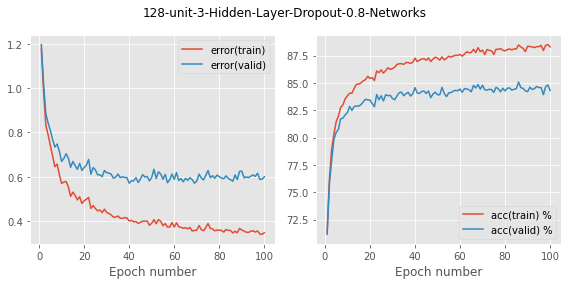

In [86]:
#setup hyperparameters
stats_interval = 1
hidden_dim = 128
l1_coefficient = 0
learning_rate = 0.001

num_epochs = 100

for dropout_rate in dropout_rates:
    print(dropout_rate)
    print(learning_rate)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    # Create a weights initialiser 
    weights_init = GlorotUniformInit(rng=rng)

    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init
                   ), 
        ReluLayer(),
        DropoutLayer(rng=rng, incl_prob=0.8),

        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init
                   ), 
        ReluLayer(),
        DropoutLayer(rng=rng, incl_prob=dropout_rate),

        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init
                   ), 
        ReluLayer(),
        DropoutLayer(rng=rng, incl_prob=dropout_rate),

        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init
                   ), 
        ReluLayer(),
        DropoutLayer(rng=rng, incl_prob=dropout_rate),

        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    # Remember to use notebook=False when you write a script to be run in a terminal
    n_hidden_layer = 3
    stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t2(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
        title=f'128-unit-3-Hidden-Layer-Dropout-{dropout_rate}-Networks',
        notebook=True)

#     fig_1.savefig(f'../images/t2.2-dropout-{dropout_rate}-l1-{l1_coefficient}-lr-{learning_rate}.png')

# Drop Out with L2 Regularization

Epoch 1: 4.7s to complete
    error(train)=1.18e+00, acc(train)=7.12e-01, error(valid)=1.20e+00, acc(valid)=7.07e-01


Epoch 2: 5.7s to complete
    error(train)=1.00e+00, acc(train)=7.59e-01, error(valid)=1.04e+00, acc(valid)=7.52e-01


Epoch 3: 8.0s to complete
    error(train)=8.32e-01, acc(train)=7.89e-01, error(valid)=8.89e-01, acc(valid)=7.81e-01


Epoch 4: 8.2s to complete
    error(train)=8.01e-01, acc(train)=8.01e-01, error(valid)=8.57e-01, acc(valid)=7.92e-01


Epoch 5: 7.4s to complete
    error(train)=7.44e-01, acc(train)=8.13e-01, error(valid)=8.29e-01, acc(valid)=8.01e-01


Epoch 6: 8.7s to complete
    error(train)=6.99e-01, acc(train)=8.18e-01, error(valid)=7.89e-01, acc(valid)=8.06e-01


Epoch 7: 7.6s to complete
    error(train)=6.49e-01, acc(train)=8.29e-01, error(valid)=7.47e-01, acc(valid)=8.17e-01


Epoch 8: 7.7s to complete
    error(train)=6.49e-01, acc(train)=8.29e-01, error(valid)=7.48e-01, acc(valid)=8.16e-01


Epoch 9: 8.2s to complete
    error(train)=6.12e-01, acc(train)=8.35e-01, error(valid)=7.16e-01, acc(valid)=8.21e-01


Epoch 10: 7.4s to complete
    error(train)=5.96e-01, acc(train)=8.35e-01, error(valid)=7.04e-01, acc(valid)=8.19e-01


Epoch 11: 7.4s to complete
    error(train)=5.79e-01, acc(train)=8.40e-01, error(valid)=6.93e-01, acc(valid)=8.23e-01


Epoch 12: 7.3s to complete
    error(train)=5.62e-01, acc(train)=8.44e-01, error(valid)=6.83e-01, acc(valid)=8.26e-01


Epoch 13: 7.5s to complete
    error(train)=5.49e-01, acc(train)=8.45e-01, error(valid)=6.73e-01, acc(valid)=8.30e-01


Epoch 14: 11.9s to complete
    error(train)=5.10e-01, acc(train)=8.47e-01, error(valid)=6.40e-01, acc(valid)=8.29e-01


Epoch 15: 11.8s to complete
    error(train)=5.13e-01, acc(train)=8.49e-01, error(valid)=6.44e-01, acc(valid)=8.32e-01


Epoch 16: 11.5s to complete
    error(train)=5.09e-01, acc(train)=8.49e-01, error(valid)=6.36e-01, acc(valid)=8.30e-01


Epoch 17: 11.7s to complete
    error(train)=5.04e-01, acc(train)=8.51e-01, error(valid)=6.46e-01, acc(valid)=8.28e-01


Epoch 18: 12.4s to complete
    error(train)=4.91e-01, acc(train)=8.54e-01, error(valid)=6.28e-01, acc(valid)=8.35e-01


Epoch 19: 11.4s to complete
    error(train)=4.78e-01, acc(train)=8.55e-01, error(valid)=6.17e-01, acc(valid)=8.34e-01


Epoch 20: 12.1s to complete
    error(train)=4.75e-01, acc(train)=8.56e-01, error(valid)=6.16e-01, acc(valid)=8.35e-01


Epoch 21: 11.6s to complete
    error(train)=5.00e-01, acc(train)=8.55e-01, error(valid)=6.52e-01, acc(valid)=8.34e-01


Epoch 22: 12.6s to complete
    error(train)=4.78e-01, acc(train)=8.56e-01, error(valid)=6.26e-01, acc(valid)=8.36e-01


Epoch 23: 11.3s to complete
    error(train)=4.55e-01, acc(train)=8.59e-01, error(valid)=6.06e-01, acc(valid)=8.37e-01


Epoch 24: 10.4s to complete
    error(train)=4.59e-01, acc(train)=8.60e-01, error(valid)=6.20e-01, acc(valid)=8.38e-01


Epoch 25: 11.6s to complete
    error(train)=4.79e-01, acc(train)=8.57e-01, error(valid)=6.43e-01, acc(valid)=8.33e-01


Epoch 26: 11.6s to complete
    error(train)=4.58e-01, acc(train)=8.58e-01, error(valid)=6.18e-01, acc(valid)=8.33e-01


Epoch 27: 11.1s to complete
    error(train)=4.49e-01, acc(train)=8.62e-01, error(valid)=6.01e-01, acc(valid)=8.39e-01


Epoch 28: 12.5s to complete
    error(train)=4.48e-01, acc(train)=8.61e-01, error(valid)=6.04e-01, acc(valid)=8.39e-01


Epoch 29: 13.2s to complete
    error(train)=4.50e-01, acc(train)=8.64e-01, error(valid)=6.12e-01, acc(valid)=8.39e-01


Epoch 30: 12.7s to complete
    error(train)=4.30e-01, acc(train)=8.64e-01, error(valid)=5.94e-01, acc(valid)=8.37e-01


Epoch 31: 12.1s to complete
    error(train)=4.42e-01, acc(train)=8.63e-01, error(valid)=6.20e-01, acc(valid)=8.37e-01


Epoch 32: 12.2s to complete
    error(train)=4.27e-01, acc(train)=8.65e-01, error(valid)=5.91e-01, acc(valid)=8.39e-01


Epoch 33: 11.9s to complete
    error(train)=4.28e-01, acc(train)=8.66e-01, error(valid)=5.99e-01, acc(valid)=8.39e-01


Epoch 34: 11.9s to complete
    error(train)=4.24e-01, acc(train)=8.67e-01, error(valid)=6.05e-01, acc(valid)=8.38e-01


Epoch 35: 11.8s to complete
    error(train)=4.17e-01, acc(train)=8.66e-01, error(valid)=5.92e-01, acc(valid)=8.39e-01


Epoch 36: 12.0s to complete
    error(train)=4.18e-01, acc(train)=8.67e-01, error(valid)=5.97e-01, acc(valid)=8.40e-01


Epoch 37: 11.8s to complete
    error(train)=4.15e-01, acc(train)=8.68e-01, error(valid)=5.89e-01, acc(valid)=8.43e-01


Epoch 38: 11.6s to complete
    error(train)=4.09e-01, acc(train)=8.67e-01, error(valid)=5.87e-01, acc(valid)=8.40e-01


Epoch 39: 11.5s to complete
    error(train)=4.36e-01, acc(train)=8.62e-01, error(valid)=6.21e-01, acc(valid)=8.35e-01


Epoch 40: 11.5s to complete
    error(train)=4.04e-01, acc(train)=8.70e-01, error(valid)=5.86e-01, acc(valid)=8.41e-01


Epoch 41: 12.0s to complete
    error(train)=4.04e-01, acc(train)=8.68e-01, error(valid)=5.81e-01, acc(valid)=8.42e-01


Epoch 42: 11.6s to complete
    error(train)=3.98e-01, acc(train)=8.69e-01, error(valid)=5.69e-01, acc(valid)=8.41e-01


Epoch 43: 11.6s to complete
    error(train)=4.13e-01, acc(train)=8.68e-01, error(valid)=5.98e-01, acc(valid)=8.40e-01


Epoch 44: 12.3s to complete
    error(train)=3.80e-01, acc(train)=8.72e-01, error(valid)=5.54e-01, acc(valid)=8.42e-01


Epoch 45: 12.2s to complete
    error(train)=4.02e-01, acc(train)=8.68e-01, error(valid)=5.79e-01, acc(valid)=8.39e-01


Epoch 46: 11.3s to complete
    error(train)=3.94e-01, acc(train)=8.73e-01, error(valid)=5.90e-01, acc(valid)=8.45e-01


Epoch 47: 10.6s to complete
    error(train)=3.93e-01, acc(train)=8.71e-01, error(valid)=5.80e-01, acc(valid)=8.42e-01


Epoch 48: 11.5s to complete
    error(train)=4.04e-01, acc(train)=8.69e-01, error(valid)=5.92e-01, acc(valid)=8.37e-01


Epoch 49: 11.1s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=5.74e-01, acc(valid)=8.40e-01


Epoch 50: 10.8s to complete
    error(train)=3.99e-01, acc(train)=8.70e-01, error(valid)=6.01e-01, acc(valid)=8.39e-01


Epoch 51: 11.6s to complete
    error(train)=4.13e-01, acc(train)=8.69e-01, error(valid)=6.09e-01, acc(valid)=8.39e-01


Epoch 52: 12.1s to complete
    error(train)=3.87e-01, acc(train)=8.74e-01, error(valid)=5.81e-01, acc(valid)=8.42e-01


Epoch 53: 12.1s to complete
    error(train)=3.97e-01, acc(train)=8.72e-01, error(valid)=5.88e-01, acc(valid)=8.41e-01


Epoch 54: 12.0s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=5.80e-01, acc(valid)=8.41e-01


Epoch 55: 12.1s to complete
    error(train)=3.90e-01, acc(train)=8.72e-01, error(valid)=5.87e-01, acc(valid)=8.43e-01


Epoch 56: 11.8s to complete
    error(train)=3.93e-01, acc(train)=8.71e-01, error(valid)=5.90e-01, acc(valid)=8.43e-01


Epoch 57: 12.9s to complete
    error(train)=3.78e-01, acc(train)=8.72e-01, error(valid)=5.68e-01, acc(valid)=8.44e-01


Epoch 58: 13.1s to complete
    error(train)=3.86e-01, acc(train)=8.73e-01, error(valid)=5.82e-01, acc(valid)=8.42e-01


Epoch 59: 11.9s to complete
    error(train)=4.01e-01, acc(train)=8.72e-01, error(valid)=6.00e-01, acc(valid)=8.44e-01


Epoch 60: 11.6s to complete
    error(train)=3.66e-01, acc(train)=8.77e-01, error(valid)=5.63e-01, acc(valid)=8.46e-01


Epoch 61: 11.0s to complete
    error(train)=3.96e-01, acc(train)=8.71e-01, error(valid)=5.97e-01, acc(valid)=8.41e-01


Epoch 62: 11.6s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=5.80e-01, acc(valid)=8.45e-01


Epoch 63: 11.9s to complete
    error(train)=3.77e-01, acc(train)=8.76e-01, error(valid)=5.82e-01, acc(valid)=8.45e-01


Epoch 64: 11.9s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=5.65e-01, acc(valid)=8.45e-01


Epoch 65: 11.6s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=5.74e-01, acc(valid)=8.45e-01


Epoch 66: 11.5s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=5.78e-01, acc(valid)=8.47e-01


Epoch 67: 11.7s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=5.87e-01, acc(valid)=8.44e-01


Epoch 68: 11.7s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.70e-01, acc(valid)=8.44e-01


Epoch 69: 12.7s to complete
    error(train)=3.59e-01, acc(train)=8.78e-01, error(valid)=5.55e-01, acc(valid)=8.44e-01


Epoch 70: 12.0s to complete
    error(train)=3.66e-01, acc(train)=8.79e-01, error(valid)=5.70e-01, acc(valid)=8.47e-01


Epoch 71: 11.7s to complete
    error(train)=3.77e-01, acc(train)=8.77e-01, error(valid)=5.78e-01, acc(valid)=8.44e-01


Epoch 72: 11.9s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.70e-01, acc(valid)=8.45e-01


Epoch 73: 12.0s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=5.73e-01, acc(valid)=8.46e-01


Epoch 74: 11.9s to complete
    error(train)=3.72e-01, acc(train)=8.77e-01, error(valid)=5.86e-01, acc(valid)=8.45e-01


Epoch 75: 12.9s to complete
    error(train)=3.66e-01, acc(train)=8.79e-01, error(valid)=5.84e-01, acc(valid)=8.47e-01


Epoch 76: 11.8s to complete
    error(train)=3.63e-01, acc(train)=8.80e-01, error(valid)=5.70e-01, acc(valid)=8.48e-01


Epoch 77: 12.0s to complete
    error(train)=3.77e-01, acc(train)=8.76e-01, error(valid)=5.95e-01, acc(valid)=8.44e-01


Epoch 78: 11.5s to complete
    error(train)=3.56e-01, acc(train)=8.79e-01, error(valid)=5.61e-01, acc(valid)=8.47e-01


Epoch 79: 10.8s to complete
    error(train)=3.76e-01, acc(train)=8.76e-01, error(valid)=5.94e-01, acc(valid)=8.46e-01


Epoch 80: 11.0s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=5.79e-01, acc(valid)=8.43e-01


Epoch 81: 11.4s to complete
    error(train)=3.65e-01, acc(train)=8.77e-01, error(valid)=5.78e-01, acc(valid)=8.42e-01


Epoch 82: 13.0s to complete
    error(train)=3.64e-01, acc(train)=8.79e-01, error(valid)=5.86e-01, acc(valid)=8.47e-01


Epoch 83: 12.0s to complete
    error(train)=3.82e-01, acc(train)=8.78e-01, error(valid)=6.08e-01, acc(valid)=8.46e-01


Epoch 84: 12.1s to complete
    error(train)=3.63e-01, acc(train)=8.78e-01, error(valid)=5.78e-01, acc(valid)=8.44e-01


Epoch 85: 11.3s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=5.64e-01, acc(valid)=8.46e-01


Epoch 86: 11.6s to complete
    error(train)=3.51e-01, acc(train)=8.81e-01, error(valid)=5.73e-01, acc(valid)=8.48e-01


Epoch 87: 12.2s to complete
    error(train)=3.62e-01, acc(train)=8.80e-01, error(valid)=5.83e-01, acc(valid)=8.48e-01


Epoch 88: 13.0s to complete
    error(train)=3.50e-01, acc(train)=8.81e-01, error(valid)=5.70e-01, acc(valid)=8.47e-01


Epoch 89: 11.7s to complete
    error(train)=3.75e-01, acc(train)=8.77e-01, error(valid)=5.93e-01, acc(valid)=8.41e-01


Epoch 90: 12.0s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=5.90e-01, acc(valid)=8.44e-01


Epoch 91: 12.3s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=5.94e-01, acc(valid)=8.45e-01


Epoch 92: 12.1s to complete
    error(train)=3.53e-01, acc(train)=8.79e-01, error(valid)=5.66e-01, acc(valid)=8.47e-01


Epoch 93: 12.2s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=5.76e-01, acc(valid)=8.46e-01


Epoch 94: 12.4s to complete
    error(train)=3.58e-01, acc(train)=8.79e-01, error(valid)=5.88e-01, acc(valid)=8.45e-01


Epoch 95: 12.1s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.84e-01, acc(valid)=8.46e-01


Epoch 96: 11.9s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.73e-01, acc(valid)=8.48e-01


Epoch 97: 11.4s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.69e-01, acc(valid)=8.48e-01


Epoch 98: 11.5s to complete
    error(train)=3.55e-01, acc(train)=8.81e-01, error(valid)=5.78e-01, acc(valid)=8.46e-01


Epoch 99: 11.3s to complete
    error(train)=3.52e-01, acc(train)=8.81e-01, error(valid)=5.67e-01, acc(valid)=8.50e-01


Epoch 100: 12.2s to complete
    error(train)=3.54e-01, acc(train)=8.81e-01, error(valid)=5.69e-01, acc(valid)=8.48e-01




    T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L2-Networks
    minimum error valid iteration: 44
    minimum error valid          : 0.5541396921672812
    
    maximum acc valid iteration  : 99
    maximum acc valid            : 0.8500632911392407
    
    


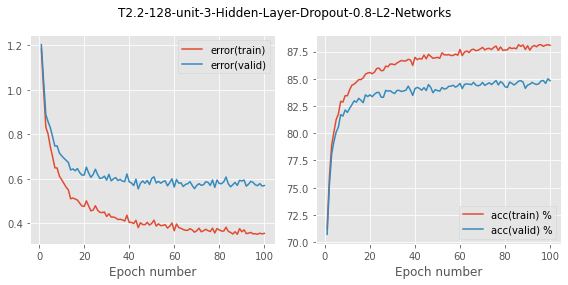

In [87]:
#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
hidden_dim = 128
l2_coefficient = 0.00001

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)

l2_penalty = L2Penalty(l2_coefficient)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l2_penalty, biases_penalty=l2_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l2_penalty, biases_penalty=l2_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l2_penalty, biases_penalty=l2_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),

    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l2_penalty, biases_penalty=l2_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),

    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 3
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t2(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L2-Networks',
    notebook=True)

# fig_1.savefig(f'../images/t2-dropout-{0.8}-l2-{l2_coefficient}.png')

## Dropout with L1 Penalty

Epoch 1: 10.6s to complete
    error(train)=1.18e+00, acc(train)=7.13e-01, error(valid)=1.19e+00, acc(valid)=7.08e-01


Epoch 2: 9.9s to complete
    error(train)=1.02e+00, acc(train)=7.57e-01, error(valid)=1.06e+00, acc(valid)=7.48e-01


Epoch 3: 9.7s to complete
    error(train)=8.40e-01, acc(train)=7.89e-01, error(valid)=9.01e-01, acc(valid)=7.78e-01


Epoch 4: 9.1s to complete
    error(train)=7.94e-01, acc(train)=8.02e-01, error(valid)=8.48e-01, acc(valid)=7.93e-01


Epoch 5: 9.7s to complete
    error(train)=7.63e-01, acc(train)=8.12e-01, error(valid)=8.38e-01, acc(valid)=8.00e-01


Epoch 6: 9.7s to complete
    error(train)=7.17e-01, acc(train)=8.18e-01, error(valid)=8.06e-01, acc(valid)=8.02e-01


Epoch 7: 10.1s to complete
    error(train)=6.53e-01, acc(train)=8.28e-01, error(valid)=7.45e-01, acc(valid)=8.13e-01


Epoch 8: 9.1s to complete
    error(train)=6.63e-01, acc(train)=8.29e-01, error(valid)=7.49e-01, acc(valid)=8.17e-01


Epoch 9: 9.1s to complete
    error(train)=6.34e-01, acc(train)=8.33e-01, error(valid)=7.35e-01, acc(valid)=8.20e-01


Epoch 10: 8.9s to complete
    error(train)=5.84e-01, acc(train)=8.36e-01, error(valid)=6.80e-01, acc(valid)=8.23e-01


Epoch 11: 9.0s to complete
    error(train)=5.93e-01, acc(train)=8.36e-01, error(valid)=6.96e-01, acc(valid)=8.21e-01


Epoch 12: 8.4s to complete
    error(train)=5.83e-01, acc(train)=8.41e-01, error(valid)=7.00e-01, acc(valid)=8.25e-01


Epoch 13: 8.4s to complete
    error(train)=5.59e-01, acc(train)=8.44e-01, error(valid)=6.70e-01, acc(valid)=8.31e-01


Epoch 14: 8.5s to complete
    error(train)=5.07e-01, acc(train)=8.48e-01, error(valid)=6.08e-01, acc(valid)=8.34e-01


Epoch 15: 8.9s to complete
    error(train)=5.45e-01, acc(train)=8.45e-01, error(valid)=6.68e-01, acc(valid)=8.26e-01


Epoch 16: 8.7s to complete
    error(train)=5.36e-01, acc(train)=8.45e-01, error(valid)=6.55e-01, acc(valid)=8.25e-01


Epoch 17: 9.2s to complete
    error(train)=5.31e-01, acc(train)=8.45e-01, error(valid)=6.50e-01, acc(valid)=8.29e-01


Epoch 18: 9.0s to complete
    error(train)=5.33e-01, acc(train)=8.47e-01, error(valid)=6.54e-01, acc(valid)=8.31e-01


Epoch 19: 9.8s to complete
    error(train)=5.01e-01, acc(train)=8.52e-01, error(valid)=6.23e-01, acc(valid)=8.33e-01


Epoch 20: 9.5s to complete
    error(train)=4.99e-01, acc(train)=8.51e-01, error(valid)=6.18e-01, acc(valid)=8.34e-01


Epoch 21: 8.5s to complete
    error(train)=5.11e-01, acc(train)=8.53e-01, error(valid)=6.41e-01, acc(valid)=8.32e-01


Epoch 22: 8.6s to complete
    error(train)=4.92e-01, acc(train)=8.55e-01, error(valid)=6.23e-01, acc(valid)=8.32e-01


Epoch 23: 8.4s to complete
    error(train)=4.82e-01, acc(train)=8.56e-01, error(valid)=6.01e-01, acc(valid)=8.38e-01


Epoch 24: 8.6s to complete
    error(train)=4.74e-01, acc(train)=8.56e-01, error(valid)=6.03e-01, acc(valid)=8.34e-01


Epoch 25: 8.6s to complete
    error(train)=4.80e-01, acc(train)=8.56e-01, error(valid)=6.13e-01, acc(valid)=8.38e-01


Epoch 26: 8.5s to complete
    error(train)=4.69e-01, acc(train)=8.54e-01, error(valid)=5.92e-01, acc(valid)=8.33e-01


Epoch 27: 8.5s to complete
    error(train)=4.67e-01, acc(train)=8.60e-01, error(valid)=5.96e-01, acc(valid)=8.39e-01


Epoch 28: 8.5s to complete
    error(train)=4.57e-01, acc(train)=8.58e-01, error(valid)=5.86e-01, acc(valid)=8.38e-01


Epoch 29: 9.0s to complete
    error(train)=4.55e-01, acc(train)=8.62e-01, error(valid)=5.92e-01, acc(valid)=8.40e-01


Epoch 30: 8.5s to complete
    error(train)=4.63e-01, acc(train)=8.58e-01, error(valid)=6.06e-01, acc(valid)=8.38e-01


Epoch 31: 8.7s to complete
    error(train)=4.56e-01, acc(train)=8.61e-01, error(valid)=5.98e-01, acc(valid)=8.39e-01


Epoch 32: 8.6s to complete
    error(train)=4.53e-01, acc(train)=8.61e-01, error(valid)=6.06e-01, acc(valid)=8.36e-01


Epoch 33: 8.6s to complete
    error(train)=4.50e-01, acc(train)=8.62e-01, error(valid)=5.94e-01, acc(valid)=8.42e-01


Epoch 34: 9.7s to complete
    error(train)=4.38e-01, acc(train)=8.64e-01, error(valid)=5.91e-01, acc(valid)=8.42e-01


Epoch 35: 8.6s to complete
    error(train)=4.48e-01, acc(train)=8.60e-01, error(valid)=5.97e-01, acc(valid)=8.38e-01


Epoch 36: 8.5s to complete
    error(train)=4.42e-01, acc(train)=8.63e-01, error(valid)=5.86e-01, acc(valid)=8.42e-01


Epoch 37: 8.7s to complete
    error(train)=4.38e-01, acc(train)=8.63e-01, error(valid)=5.75e-01, acc(valid)=8.40e-01


Epoch 38: 8.6s to complete
    error(train)=4.38e-01, acc(train)=8.62e-01, error(valid)=5.87e-01, acc(valid)=8.38e-01


Epoch 39: 8.5s to complete
    error(train)=4.39e-01, acc(train)=8.63e-01, error(valid)=5.76e-01, acc(valid)=8.43e-01


Epoch 40: 8.6s to complete
    error(train)=4.21e-01, acc(train)=8.66e-01, error(valid)=5.66e-01, acc(valid)=8.43e-01


Epoch 41: 8.6s to complete
    error(train)=4.22e-01, acc(train)=8.66e-01, error(valid)=5.71e-01, acc(valid)=8.45e-01


Epoch 42: 8.6s to complete
    error(train)=4.24e-01, acc(train)=8.65e-01, error(valid)=5.70e-01, acc(valid)=8.40e-01


Epoch 43: 8.8s to complete
    error(train)=4.40e-01, acc(train)=8.62e-01, error(valid)=6.04e-01, acc(valid)=8.37e-01


Epoch 44: 8.6s to complete
    error(train)=4.18e-01, acc(train)=8.65e-01, error(valid)=5.70e-01, acc(valid)=8.45e-01


Epoch 45: 8.6s to complete
    error(train)=4.23e-01, acc(train)=8.66e-01, error(valid)=5.82e-01, acc(valid)=8.44e-01


Epoch 46: 8.8s to complete
    error(train)=4.25e-01, acc(train)=8.66e-01, error(valid)=5.82e-01, acc(valid)=8.45e-01


Epoch 47: 8.4s to complete
    error(train)=4.25e-01, acc(train)=8.65e-01, error(valid)=5.79e-01, acc(valid)=8.41e-01


Epoch 48: 8.5s to complete
    error(train)=4.30e-01, acc(train)=8.65e-01, error(valid)=5.85e-01, acc(valid)=8.41e-01


Epoch 49: 10.5s to complete
    error(train)=4.08e-01, acc(train)=8.68e-01, error(valid)=5.56e-01, acc(valid)=8.43e-01


Epoch 50: 9.0s to complete
    error(train)=4.35e-01, acc(train)=8.65e-01, error(valid)=6.04e-01, acc(valid)=8.40e-01


Epoch 51: 9.9s to complete
    error(train)=4.24e-01, acc(train)=8.67e-01, error(valid)=5.92e-01, acc(valid)=8.41e-01


Epoch 52: 9.5s to complete
    error(train)=4.19e-01, acc(train)=8.67e-01, error(valid)=5.72e-01, acc(valid)=8.44e-01


Epoch 53: 8.6s to complete
    error(train)=4.25e-01, acc(train)=8.67e-01, error(valid)=5.84e-01, acc(valid)=8.41e-01


Epoch 54: 9.6s to complete
    error(train)=4.19e-01, acc(train)=8.67e-01, error(valid)=5.87e-01, acc(valid)=8.42e-01


Epoch 55: 9.6s to complete
    error(train)=3.97e-01, acc(train)=8.71e-01, error(valid)=5.58e-01, acc(valid)=8.48e-01


Epoch 56: 9.4s to complete
    error(train)=4.05e-01, acc(train)=8.70e-01, error(valid)=5.71e-01, acc(valid)=8.44e-01


Epoch 57: 9.9s to complete
    error(train)=4.03e-01, acc(train)=8.69e-01, error(valid)=5.66e-01, acc(valid)=8.44e-01


Epoch 58: 9.0s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.63e-01, acc(valid)=8.43e-01


Epoch 59: 11.3s to complete
    error(train)=4.05e-01, acc(train)=8.71e-01, error(valid)=5.69e-01, acc(valid)=8.47e-01


Epoch 60: 12.6s to complete
    error(train)=4.13e-01, acc(train)=8.68e-01, error(valid)=5.81e-01, acc(valid)=8.44e-01


Epoch 61: 7.9s to complete
    error(train)=4.12e-01, acc(train)=8.70e-01, error(valid)=5.79e-01, acc(valid)=8.43e-01


Epoch 62: 8.3s to complete
    error(train)=4.06e-01, acc(train)=8.70e-01, error(valid)=5.69e-01, acc(valid)=8.44e-01


Epoch 63: 9.9s to complete
    error(train)=3.89e-01, acc(train)=8.74e-01, error(valid)=5.44e-01, acc(valid)=8.49e-01


Epoch 64: 9.3s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=5.50e-01, acc(valid)=8.45e-01


Epoch 65: 12.0s to complete
    error(train)=3.92e-01, acc(train)=8.72e-01, error(valid)=5.59e-01, acc(valid)=8.46e-01


Epoch 66: 14.4s to complete
    error(train)=3.86e-01, acc(train)=8.73e-01, error(valid)=5.53e-01, acc(valid)=8.46e-01


Epoch 67: 12.4s to complete
    error(train)=3.87e-01, acc(train)=8.73e-01, error(valid)=5.61e-01, acc(valid)=8.47e-01


Epoch 68: 9.3s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.50e-01, acc(valid)=8.48e-01


Epoch 69: 10.9s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.41e-01, acc(valid)=8.46e-01


Epoch 70: 9.2s to complete
    error(train)=3.97e-01, acc(train)=8.72e-01, error(valid)=5.66e-01, acc(valid)=8.42e-01


Epoch 71: 9.0s to complete
    error(train)=3.86e-01, acc(train)=8.73e-01, error(valid)=5.56e-01, acc(valid)=8.47e-01


Epoch 72: 8.9s to complete
    error(train)=3.87e-01, acc(train)=8.74e-01, error(valid)=5.47e-01, acc(valid)=8.47e-01


Epoch 73: 9.0s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.53e-01, acc(valid)=8.46e-01


Epoch 74: 9.3s to complete
    error(train)=4.04e-01, acc(train)=8.70e-01, error(valid)=5.74e-01, acc(valid)=8.47e-01


Epoch 75: 9.5s to complete
    error(train)=4.04e-01, acc(train)=8.69e-01, error(valid)=5.75e-01, acc(valid)=8.42e-01


Epoch 76: 9.7s to complete
    error(train)=3.88e-01, acc(train)=8.73e-01, error(valid)=5.56e-01, acc(valid)=8.49e-01


Epoch 77: 9.7s to complete
    error(train)=3.91e-01, acc(train)=8.74e-01, error(valid)=5.66e-01, acc(valid)=8.48e-01


Epoch 78: 9.6s to complete
    error(train)=3.90e-01, acc(train)=8.73e-01, error(valid)=5.61e-01, acc(valid)=8.44e-01


Epoch 79: 10.0s to complete
    error(train)=3.87e-01, acc(train)=8.75e-01, error(valid)=5.59e-01, acc(valid)=8.49e-01


Epoch 80: 10.0s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=5.61e-01, acc(valid)=8.46e-01


Epoch 81: 10.9s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=5.67e-01, acc(valid)=8.46e-01


Epoch 82: 8.9s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=5.42e-01, acc(valid)=8.50e-01


Epoch 83: 10.8s to complete
    error(train)=3.92e-01, acc(train)=8.75e-01, error(valid)=5.69e-01, acc(valid)=8.48e-01


Epoch 84: 11.2s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=5.78e-01, acc(valid)=8.42e-01


Epoch 85: 9.9s to complete
    error(train)=3.92e-01, acc(train)=8.73e-01, error(valid)=5.65e-01, acc(valid)=8.46e-01


Epoch 86: 9.4s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.35e-01, acc(valid)=8.47e-01


Epoch 87: 8.7s to complete
    error(train)=3.86e-01, acc(train)=8.74e-01, error(valid)=5.70e-01, acc(valid)=8.47e-01


Epoch 88: 9.5s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.42e-01, acc(valid)=8.49e-01


Epoch 89: 8.7s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=5.61e-01, acc(valid)=8.44e-01


Epoch 90: 8.7s to complete
    error(train)=3.92e-01, acc(train)=8.73e-01, error(valid)=5.72e-01, acc(valid)=8.46e-01


Epoch 91: 8.7s to complete
    error(train)=3.89e-01, acc(train)=8.73e-01, error(valid)=5.67e-01, acc(valid)=8.45e-01


Epoch 92: 8.8s to complete
    error(train)=3.89e-01, acc(train)=8.74e-01, error(valid)=5.69e-01, acc(valid)=8.47e-01


Epoch 93: 8.5s to complete
    error(train)=3.98e-01, acc(train)=8.71e-01, error(valid)=5.79e-01, acc(valid)=8.43e-01


Epoch 94: 8.2s to complete
    error(train)=3.87e-01, acc(train)=8.74e-01, error(valid)=5.63e-01, acc(valid)=8.47e-01


Epoch 95: 8.2s to complete
    error(train)=3.80e-01, acc(train)=8.74e-01, error(valid)=5.63e-01, acc(valid)=8.44e-01


Epoch 96: 8.3s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.49e-01, acc(valid)=8.49e-01


Epoch 97: 8.9s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.64e-01, acc(valid)=8.43e-01


Epoch 98: 9.8s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=5.54e-01, acc(valid)=8.46e-01


Epoch 99: 9.9s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=5.44e-01, acc(valid)=8.50e-01


Epoch 100: 9.2s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=5.64e-01, acc(valid)=8.47e-01




    T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-Networks
    minimum error valid iteration: 86
    minimum error valid          : 0.5351849368218505
    
    maximum acc valid iteration  : 82
    maximum acc valid            : 0.8501265822784811
    
    


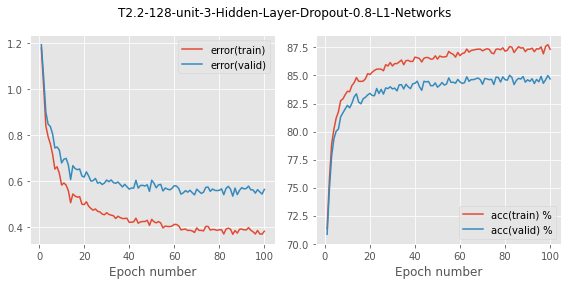

In [88]:
#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
hidden_dim = 128
l1_coefficient = 0.00001

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)

l1_penalty = L1Penalty(l1_coefficient)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),

    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),

    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 3
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t2(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-Networks',
    notebook=True)

# fig_1.savefig(f'../images/t2-dropout-{0.8}-l1-{l1_coefficient}.png')

## Varying Learning Rates


In [89]:
learning_rates = [0.0007, 0.001, 0.003]

0.0007


Epoch 1: 5.9s to complete
    error(train)=1.28e+00, acc(train)=6.86e-01, error(valid)=1.29e+00, acc(valid)=6.85e-01


Epoch 2: 8.1s to complete
    error(train)=1.07e+00, acc(train)=7.44e-01, error(valid)=1.10e+00, acc(valid)=7.38e-01


Epoch 3: 8.9s to complete
    error(train)=8.73e-01, acc(train)=7.80e-01, error(valid)=9.15e-01, acc(valid)=7.73e-01


Epoch 4: 8.9s to complete
    error(train)=8.53e-01, acc(train)=7.92e-01, error(valid)=8.93e-01, acc(valid)=7.88e-01


Epoch 5: 8.7s to complete
    error(train)=7.98e-01, acc(train)=8.08e-01, error(valid)=8.47e-01, acc(valid)=8.00e-01


Epoch 6: 10.1s to complete
    error(train)=7.39e-01, acc(train)=8.13e-01, error(valid)=8.01e-01, acc(valid)=8.04e-01


Epoch 7: 9.3s to complete
    error(train)=7.07e-01, acc(train)=8.17e-01, error(valid)=7.82e-01, acc(valid)=8.09e-01


Epoch 8: 9.3s to complete
    error(train)=7.07e-01, acc(train)=8.23e-01, error(valid)=7.85e-01, acc(valid)=8.12e-01


Epoch 9: 9.2s to complete
    error(train)=6.64e-01, acc(train)=8.28e-01, error(valid)=7.53e-01, acc(valid)=8.18e-01


Epoch 10: 8.9s to complete
    error(train)=6.04e-01, acc(train)=8.32e-01, error(valid)=6.87e-01, acc(valid)=8.21e-01


Epoch 11: 8.9s to complete
    error(train)=6.10e-01, acc(train)=8.35e-01, error(valid)=6.97e-01, acc(valid)=8.20e-01


Epoch 12: 9.0s to complete
    error(train)=6.08e-01, acc(train)=8.37e-01, error(valid)=7.03e-01, acc(valid)=8.26e-01


Epoch 13: 9.0s to complete
    error(train)=5.91e-01, acc(train)=8.41e-01, error(valid)=6.99e-01, acc(valid)=8.28e-01


Epoch 14: 10.8s to complete
    error(train)=5.44e-01, acc(train)=8.45e-01, error(valid)=6.44e-01, acc(valid)=8.31e-01


Epoch 15: 10.5s to complete
    error(train)=5.58e-01, acc(train)=8.44e-01, error(valid)=6.67e-01, acc(valid)=8.30e-01


Epoch 16: 9.4s to complete
    error(train)=5.53e-01, acc(train)=8.45e-01, error(valid)=6.68e-01, acc(valid)=8.27e-01


Epoch 17: 9.6s to complete
    error(train)=5.31e-01, acc(train)=8.48e-01, error(valid)=6.57e-01, acc(valid)=8.30e-01


Epoch 18: 9.3s to complete
    error(train)=5.56e-01, acc(train)=8.47e-01, error(valid)=6.84e-01, acc(valid)=8.29e-01


Epoch 19: 9.4s to complete
    error(train)=5.15e-01, acc(train)=8.53e-01, error(valid)=6.43e-01, acc(valid)=8.34e-01


Epoch 20: 8.9s to complete
    error(train)=5.22e-01, acc(train)=8.52e-01, error(valid)=6.50e-01, acc(valid)=8.34e-01


Epoch 21: 9.3s to complete
    error(train)=5.07e-01, acc(train)=8.54e-01, error(valid)=6.32e-01, acc(valid)=8.37e-01


Epoch 22: 9.8s to complete
    error(train)=5.07e-01, acc(train)=8.53e-01, error(valid)=6.42e-01, acc(valid)=8.34e-01


Epoch 23: 8.9s to complete
    error(train)=4.77e-01, acc(train)=8.58e-01, error(valid)=5.98e-01, acc(valid)=8.40e-01


Epoch 24: 9.0s to complete
    error(train)=4.98e-01, acc(train)=8.53e-01, error(valid)=6.33e-01, acc(valid)=8.32e-01


Epoch 25: 9.1s to complete
    error(train)=4.91e-01, acc(train)=8.58e-01, error(valid)=6.35e-01, acc(valid)=8.38e-01


Epoch 26: 9.8s to complete
    error(train)=4.85e-01, acc(train)=8.55e-01, error(valid)=6.24e-01, acc(valid)=8.35e-01


Epoch 27: 10.6s to complete
    error(train)=4.83e-01, acc(train)=8.57e-01, error(valid)=6.21e-01, acc(valid)=8.37e-01


Epoch 28: 10.1s to complete
    error(train)=4.65e-01, acc(train)=8.60e-01, error(valid)=6.01e-01, acc(valid)=8.40e-01


Epoch 29: 9.6s to complete
    error(train)=4.61e-01, acc(train)=8.61e-01, error(valid)=6.04e-01, acc(valid)=8.42e-01


Epoch 30: 9.9s to complete
    error(train)=4.64e-01, acc(train)=8.60e-01, error(valid)=6.07e-01, acc(valid)=8.41e-01


Epoch 31: 10.8s to complete
    error(train)=4.57e-01, acc(train)=8.60e-01, error(valid)=6.00e-01, acc(valid)=8.39e-01


Epoch 32: 10.3s to complete
    error(train)=4.55e-01, acc(train)=8.62e-01, error(valid)=6.00e-01, acc(valid)=8.41e-01


Epoch 33: 9.5s to complete
    error(train)=4.39e-01, acc(train)=8.66e-01, error(valid)=5.76e-01, acc(valid)=8.45e-01


Epoch 34: 9.1s to complete
    error(train)=4.36e-01, acc(train)=8.66e-01, error(valid)=5.76e-01, acc(valid)=8.44e-01


Epoch 35: 8.9s to complete
    error(train)=4.42e-01, acc(train)=8.63e-01, error(valid)=5.84e-01, acc(valid)=8.41e-01


Epoch 36: 9.6s to complete
    error(train)=4.35e-01, acc(train)=8.64e-01, error(valid)=5.80e-01, acc(valid)=8.40e-01


Epoch 37: 9.3s to complete
    error(train)=4.31e-01, acc(train)=8.66e-01, error(valid)=5.85e-01, acc(valid)=8.43e-01


Epoch 38: 9.1s to complete
    error(train)=4.37e-01, acc(train)=8.63e-01, error(valid)=5.88e-01, acc(valid)=8.40e-01


Epoch 39: 8.9s to complete
    error(train)=4.37e-01, acc(train)=8.66e-01, error(valid)=5.88e-01, acc(valid)=8.45e-01


Epoch 40: 9.8s to complete
    error(train)=4.22e-01, acc(train)=8.68e-01, error(valid)=5.63e-01, acc(valid)=8.46e-01


Epoch 41: 9.2s to complete
    error(train)=4.18e-01, acc(train)=8.67e-01, error(valid)=5.68e-01, acc(valid)=8.41e-01


Epoch 42: 9.0s to complete
    error(train)=4.27e-01, acc(train)=8.66e-01, error(valid)=5.77e-01, acc(valid)=8.42e-01


Epoch 43: 9.0s to complete
    error(train)=4.31e-01, acc(train)=8.64e-01, error(valid)=5.86e-01, acc(valid)=8.39e-01


Epoch 44: 9.0s to complete
    error(train)=4.07e-01, acc(train)=8.68e-01, error(valid)=5.57e-01, acc(valid)=8.44e-01


Epoch 45: 8.9s to complete
    error(train)=4.13e-01, acc(train)=8.69e-01, error(valid)=5.74e-01, acc(valid)=8.45e-01


Epoch 46: 10.6s to complete
    error(train)=4.12e-01, acc(train)=8.69e-01, error(valid)=5.73e-01, acc(valid)=8.44e-01


Epoch 47: 9.2s to complete
    error(train)=4.04e-01, acc(train)=8.70e-01, error(valid)=5.59e-01, acc(valid)=8.44e-01


Epoch 48: 9.1s to complete
    error(train)=4.13e-01, acc(train)=8.69e-01, error(valid)=5.68e-01, acc(valid)=8.44e-01


Epoch 49: 9.3s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.36e-01, acc(valid)=8.49e-01


Epoch 50: 9.9s to complete
    error(train)=4.22e-01, acc(train)=8.67e-01, error(valid)=5.88e-01, acc(valid)=8.43e-01


Epoch 51: 10.1s to complete
    error(train)=4.24e-01, acc(train)=8.69e-01, error(valid)=5.87e-01, acc(valid)=8.44e-01


Epoch 52: 10.0s to complete
    error(train)=4.00e-01, acc(train)=8.71e-01, error(valid)=5.59e-01, acc(valid)=8.45e-01


Epoch 53: 8.9s to complete
    error(train)=3.99e-01, acc(train)=8.72e-01, error(valid)=5.50e-01, acc(valid)=8.47e-01


Epoch 54: 9.4s to complete
    error(train)=3.98e-01, acc(train)=8.71e-01, error(valid)=5.61e-01, acc(valid)=8.45e-01


Epoch 55: 9.0s to complete
    error(train)=4.06e-01, acc(train)=8.71e-01, error(valid)=5.67e-01, acc(valid)=8.46e-01


Epoch 56: 8.9s to complete
    error(train)=3.97e-01, acc(train)=8.73e-01, error(valid)=5.56e-01, acc(valid)=8.50e-01


Epoch 57: 10.5s to complete
    error(train)=3.85e-01, acc(train)=8.76e-01, error(valid)=5.37e-01, acc(valid)=8.49e-01


Epoch 58: 9.4s to complete
    error(train)=3.99e-01, acc(train)=8.71e-01, error(valid)=5.67e-01, acc(valid)=8.44e-01


Epoch 59: 9.2s to complete
    error(train)=4.09e-01, acc(train)=8.73e-01, error(valid)=5.78e-01, acc(valid)=8.47e-01


Epoch 60: 9.0s to complete
    error(train)=3.84e-01, acc(train)=8.74e-01, error(valid)=5.50e-01, acc(valid)=8.47e-01


Epoch 61: 8.9s to complete
    error(train)=3.99e-01, acc(train)=8.74e-01, error(valid)=5.71e-01, acc(valid)=8.47e-01


Epoch 62: 9.3s to complete
    error(train)=3.97e-01, acc(train)=8.72e-01, error(valid)=5.52e-01, acc(valid)=8.48e-01


Epoch 63: 9.2s to complete
    error(train)=3.83e-01, acc(train)=8.76e-01, error(valid)=5.49e-01, acc(valid)=8.50e-01


Epoch 64: 9.0s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=5.39e-01, acc(valid)=8.51e-01


Epoch 65: 8.9s to complete
    error(train)=3.77e-01, acc(train)=8.76e-01, error(valid)=5.37e-01, acc(valid)=8.53e-01


Epoch 66: 9.7s to complete
    error(train)=3.81e-01, acc(train)=8.76e-01, error(valid)=5.59e-01, acc(valid)=8.48e-01


Epoch 67: 9.2s to complete
    error(train)=3.83e-01, acc(train)=8.75e-01, error(valid)=5.43e-01, acc(valid)=8.50e-01


Epoch 68: 10.5s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=5.38e-01, acc(valid)=8.50e-01


Epoch 69: 9.0s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.30e-01, acc(valid)=8.49e-01


Epoch 70: 8.8s to complete
    error(train)=3.82e-01, acc(train)=8.76e-01, error(valid)=5.55e-01, acc(valid)=8.50e-01


Epoch 71: 10.3s to complete
    error(train)=3.94e-01, acc(train)=8.72e-01, error(valid)=5.75e-01, acc(valid)=8.41e-01


Epoch 72: 9.7s to complete
    error(train)=3.76e-01, acc(train)=8.77e-01, error(valid)=5.55e-01, acc(valid)=8.50e-01


Epoch 73: 9.5s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=5.42e-01, acc(valid)=8.49e-01


Epoch 74: 10.3s to complete
    error(train)=3.84e-01, acc(train)=8.75e-01, error(valid)=5.60e-01, acc(valid)=8.47e-01


Epoch 75: 9.5s to complete
    error(train)=3.79e-01, acc(train)=8.76e-01, error(valid)=5.59e-01, acc(valid)=8.47e-01


Epoch 76: 10.2s to complete
    error(train)=3.72e-01, acc(train)=8.77e-01, error(valid)=5.41e-01, acc(valid)=8.52e-01


Epoch 77: 10.6s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=5.38e-01, acc(valid)=8.48e-01


Epoch 78: 9.8s to complete
    error(train)=3.61e-01, acc(train)=8.80e-01, error(valid)=5.29e-01, acc(valid)=8.53e-01


Epoch 79: 10.4s to complete
    error(train)=3.96e-01, acc(train)=8.74e-01, error(valid)=5.81e-01, acc(valid)=8.46e-01


Epoch 80: 9.7s to complete
    error(train)=3.70e-01, acc(train)=8.78e-01, error(valid)=5.43e-01, acc(valid)=8.51e-01


Epoch 81: 9.0s to complete
    error(train)=3.73e-01, acc(train)=8.78e-01, error(valid)=5.45e-01, acc(valid)=8.50e-01


Epoch 82: 9.5s to complete
    error(train)=3.71e-01, acc(train)=8.78e-01, error(valid)=5.37e-01, acc(valid)=8.50e-01


Epoch 83: 10.0s to complete
    error(train)=3.76e-01, acc(train)=8.79e-01, error(valid)=5.52e-01, acc(valid)=8.51e-01


Epoch 84: 9.6s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=5.39e-01, acc(valid)=8.50e-01


Epoch 85: 10.5s to complete
    error(train)=3.65e-01, acc(train)=8.79e-01, error(valid)=5.31e-01, acc(valid)=8.54e-01


Epoch 86: 11.3s to complete
    error(train)=3.56e-01, acc(train)=8.80e-01, error(valid)=5.24e-01, acc(valid)=8.52e-01


Epoch 87: 9.6s to complete
    error(train)=3.65e-01, acc(train)=8.79e-01, error(valid)=5.47e-01, acc(valid)=8.52e-01


Epoch 88: 10.3s to complete
    error(train)=3.62e-01, acc(train)=8.79e-01, error(valid)=5.31e-01, acc(valid)=8.53e-01


Epoch 89: 10.5s to complete
    error(train)=3.91e-01, acc(train)=8.74e-01, error(valid)=5.76e-01, acc(valid)=8.47e-01


Epoch 90: 10.1s to complete
    error(train)=3.69e-01, acc(train)=8.78e-01, error(valid)=5.47e-01, acc(valid)=8.50e-01


Epoch 91: 9.4s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=5.57e-01, acc(valid)=8.48e-01


Epoch 92: 9.3s to complete
    error(train)=3.67e-01, acc(train)=8.77e-01, error(valid)=5.44e-01, acc(valid)=8.50e-01


Epoch 93: 9.1s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.35e-01, acc(valid)=8.52e-01


Epoch 94: 9.3s to complete
    error(train)=3.65e-01, acc(train)=8.79e-01, error(valid)=5.49e-01, acc(valid)=8.50e-01


Epoch 95: 9.0s to complete
    error(train)=3.58e-01, acc(train)=8.80e-01, error(valid)=5.44e-01, acc(valid)=8.51e-01


Epoch 96: 8.4s to complete
    error(train)=3.63e-01, acc(train)=8.80e-01, error(valid)=5.47e-01, acc(valid)=8.55e-01


Epoch 97: 8.7s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.43e-01, acc(valid)=8.48e-01


Epoch 98: 8.8s to complete
    error(train)=3.58e-01, acc(train)=8.81e-01, error(valid)=5.42e-01, acc(valid)=8.52e-01


Epoch 99: 8.9s to complete
    error(train)=3.49e-01, acc(train)=8.82e-01, error(valid)=5.28e-01, acc(valid)=8.52e-01


Epoch 100: 9.4s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=5.47e-01, acc(valid)=8.51e-01




    T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-lr-0.0007-Networks
    minimum error valid iteration: 86
    minimum error valid          : 0.5244185214334071
    
    maximum acc valid iteration  : 96
    maximum acc valid            : 0.8545569620253164
    
    


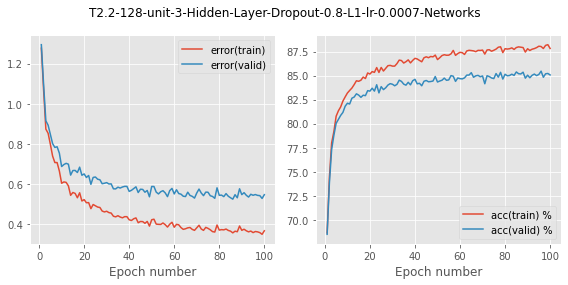

0.001


Epoch 1: 11.1s to complete
    error(train)=1.18e+00, acc(train)=7.13e-01, error(valid)=1.19e+00, acc(valid)=7.08e-01


Epoch 2: 9.9s to complete
    error(train)=1.02e+00, acc(train)=7.57e-01, error(valid)=1.06e+00, acc(valid)=7.48e-01


Epoch 3: 9.0s to complete
    error(train)=8.40e-01, acc(train)=7.89e-01, error(valid)=9.01e-01, acc(valid)=7.78e-01


Epoch 4: 9.7s to complete
    error(train)=7.94e-01, acc(train)=8.02e-01, error(valid)=8.48e-01, acc(valid)=7.93e-01


Epoch 5: 9.2s to complete
    error(train)=7.63e-01, acc(train)=8.12e-01, error(valid)=8.38e-01, acc(valid)=8.00e-01


Epoch 6: 9.7s to complete
    error(train)=7.17e-01, acc(train)=8.18e-01, error(valid)=8.06e-01, acc(valid)=8.02e-01


Epoch 7: 9.2s to complete
    error(train)=6.53e-01, acc(train)=8.28e-01, error(valid)=7.45e-01, acc(valid)=8.13e-01


Epoch 8: 9.6s to complete
    error(train)=6.63e-01, acc(train)=8.29e-01, error(valid)=7.49e-01, acc(valid)=8.17e-01


Epoch 9: 9.6s to complete
    error(train)=6.34e-01, acc(train)=8.33e-01, error(valid)=7.35e-01, acc(valid)=8.20e-01


Epoch 10: 9.4s to complete
    error(train)=5.84e-01, acc(train)=8.36e-01, error(valid)=6.80e-01, acc(valid)=8.23e-01


Epoch 11: 9.4s to complete
    error(train)=5.93e-01, acc(train)=8.36e-01, error(valid)=6.96e-01, acc(valid)=8.21e-01


Epoch 12: 9.2s to complete
    error(train)=5.83e-01, acc(train)=8.41e-01, error(valid)=7.00e-01, acc(valid)=8.25e-01


Epoch 13: 9.2s to complete
    error(train)=5.59e-01, acc(train)=8.44e-01, error(valid)=6.70e-01, acc(valid)=8.31e-01


Epoch 14: 9.3s to complete
    error(train)=5.07e-01, acc(train)=8.48e-01, error(valid)=6.08e-01, acc(valid)=8.34e-01


Epoch 15: 9.2s to complete
    error(train)=5.45e-01, acc(train)=8.45e-01, error(valid)=6.68e-01, acc(valid)=8.26e-01


Epoch 16: 9.5s to complete
    error(train)=5.36e-01, acc(train)=8.45e-01, error(valid)=6.55e-01, acc(valid)=8.25e-01


Epoch 17: 9.3s to complete
    error(train)=5.31e-01, acc(train)=8.45e-01, error(valid)=6.50e-01, acc(valid)=8.29e-01


Epoch 18: 9.2s to complete
    error(train)=5.33e-01, acc(train)=8.47e-01, error(valid)=6.54e-01, acc(valid)=8.31e-01


Epoch 19: 9.2s to complete
    error(train)=5.01e-01, acc(train)=8.52e-01, error(valid)=6.23e-01, acc(valid)=8.33e-01


Epoch 20: 9.1s to complete
    error(train)=4.99e-01, acc(train)=8.51e-01, error(valid)=6.18e-01, acc(valid)=8.34e-01


Epoch 21: 9.0s to complete
    error(train)=5.11e-01, acc(train)=8.53e-01, error(valid)=6.41e-01, acc(valid)=8.32e-01


Epoch 22: 9.3s to complete
    error(train)=4.92e-01, acc(train)=8.55e-01, error(valid)=6.23e-01, acc(valid)=8.32e-01


Epoch 23: 9.1s to complete
    error(train)=4.82e-01, acc(train)=8.56e-01, error(valid)=6.01e-01, acc(valid)=8.38e-01


Epoch 24: 9.1s to complete
    error(train)=4.74e-01, acc(train)=8.56e-01, error(valid)=6.03e-01, acc(valid)=8.34e-01


Epoch 25: 9.6s to complete
    error(train)=4.80e-01, acc(train)=8.56e-01, error(valid)=6.13e-01, acc(valid)=8.38e-01


Epoch 26: 9.1s to complete
    error(train)=4.69e-01, acc(train)=8.54e-01, error(valid)=5.92e-01, acc(valid)=8.33e-01


Epoch 27: 9.3s to complete
    error(train)=4.67e-01, acc(train)=8.60e-01, error(valid)=5.96e-01, acc(valid)=8.39e-01


Epoch 28: 9.2s to complete
    error(train)=4.57e-01, acc(train)=8.58e-01, error(valid)=5.86e-01, acc(valid)=8.38e-01


Epoch 29: 8.9s to complete
    error(train)=4.55e-01, acc(train)=8.62e-01, error(valid)=5.92e-01, acc(valid)=8.40e-01


Epoch 30: 9.1s to complete
    error(train)=4.63e-01, acc(train)=8.58e-01, error(valid)=6.06e-01, acc(valid)=8.38e-01


Epoch 31: 9.1s to complete
    error(train)=4.56e-01, acc(train)=8.61e-01, error(valid)=5.98e-01, acc(valid)=8.39e-01


Epoch 32: 9.3s to complete
    error(train)=4.53e-01, acc(train)=8.61e-01, error(valid)=6.06e-01, acc(valid)=8.36e-01


Epoch 33: 9.3s to complete
    error(train)=4.50e-01, acc(train)=8.62e-01, error(valid)=5.94e-01, acc(valid)=8.42e-01


Epoch 34: 9.2s to complete
    error(train)=4.38e-01, acc(train)=8.64e-01, error(valid)=5.91e-01, acc(valid)=8.42e-01


Epoch 35: 9.2s to complete
    error(train)=4.48e-01, acc(train)=8.60e-01, error(valid)=5.97e-01, acc(valid)=8.38e-01


Epoch 36: 9.2s to complete
    error(train)=4.42e-01, acc(train)=8.63e-01, error(valid)=5.86e-01, acc(valid)=8.42e-01


Epoch 37: 9.6s to complete
    error(train)=4.38e-01, acc(train)=8.63e-01, error(valid)=5.75e-01, acc(valid)=8.40e-01


Epoch 38: 9.8s to complete
    error(train)=4.38e-01, acc(train)=8.62e-01, error(valid)=5.87e-01, acc(valid)=8.38e-01


Epoch 39: 10.8s to complete
    error(train)=4.39e-01, acc(train)=8.63e-01, error(valid)=5.76e-01, acc(valid)=8.43e-01


Epoch 40: 9.4s to complete
    error(train)=4.21e-01, acc(train)=8.66e-01, error(valid)=5.66e-01, acc(valid)=8.43e-01


Epoch 41: 9.6s to complete
    error(train)=4.22e-01, acc(train)=8.66e-01, error(valid)=5.71e-01, acc(valid)=8.45e-01


Epoch 42: 9.5s to complete
    error(train)=4.24e-01, acc(train)=8.65e-01, error(valid)=5.70e-01, acc(valid)=8.40e-01


Epoch 43: 9.4s to complete
    error(train)=4.40e-01, acc(train)=8.62e-01, error(valid)=6.04e-01, acc(valid)=8.37e-01


Epoch 44: 9.4s to complete
    error(train)=4.18e-01, acc(train)=8.65e-01, error(valid)=5.70e-01, acc(valid)=8.45e-01


Epoch 45: 10.2s to complete
    error(train)=4.23e-01, acc(train)=8.66e-01, error(valid)=5.82e-01, acc(valid)=8.44e-01


Epoch 46: 10.5s to complete
    error(train)=4.25e-01, acc(train)=8.66e-01, error(valid)=5.82e-01, acc(valid)=8.45e-01


Epoch 47: 9.3s to complete
    error(train)=4.25e-01, acc(train)=8.65e-01, error(valid)=5.79e-01, acc(valid)=8.41e-01


Epoch 48: 9.9s to complete
    error(train)=4.30e-01, acc(train)=8.65e-01, error(valid)=5.85e-01, acc(valid)=8.41e-01


Epoch 49: 10.4s to complete
    error(train)=4.08e-01, acc(train)=8.68e-01, error(valid)=5.56e-01, acc(valid)=8.43e-01


Epoch 50: 9.8s to complete
    error(train)=4.35e-01, acc(train)=8.65e-01, error(valid)=6.04e-01, acc(valid)=8.40e-01


Epoch 51: 9.9s to complete
    error(train)=4.24e-01, acc(train)=8.67e-01, error(valid)=5.92e-01, acc(valid)=8.41e-01


Epoch 52: 9.0s to complete
    error(train)=4.19e-01, acc(train)=8.67e-01, error(valid)=5.72e-01, acc(valid)=8.44e-01


Epoch 53: 9.1s to complete
    error(train)=4.25e-01, acc(train)=8.67e-01, error(valid)=5.84e-01, acc(valid)=8.41e-01


Epoch 54: 9.9s to complete
    error(train)=4.19e-01, acc(train)=8.67e-01, error(valid)=5.87e-01, acc(valid)=8.42e-01


Epoch 55: 9.2s to complete
    error(train)=3.97e-01, acc(train)=8.71e-01, error(valid)=5.58e-01, acc(valid)=8.48e-01


Epoch 56: 9.7s to complete
    error(train)=4.05e-01, acc(train)=8.70e-01, error(valid)=5.71e-01, acc(valid)=8.44e-01


Epoch 57: 9.6s to complete
    error(train)=4.03e-01, acc(train)=8.69e-01, error(valid)=5.66e-01, acc(valid)=8.44e-01


Epoch 58: 9.2s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.63e-01, acc(valid)=8.43e-01


Epoch 59: 9.1s to complete
    error(train)=4.05e-01, acc(train)=8.71e-01, error(valid)=5.69e-01, acc(valid)=8.47e-01


Epoch 60: 9.0s to complete
    error(train)=4.13e-01, acc(train)=8.68e-01, error(valid)=5.81e-01, acc(valid)=8.44e-01


Epoch 61: 9.3s to complete
    error(train)=4.12e-01, acc(train)=8.70e-01, error(valid)=5.79e-01, acc(valid)=8.43e-01


Epoch 62: 9.2s to complete
    error(train)=4.06e-01, acc(train)=8.70e-01, error(valid)=5.69e-01, acc(valid)=8.44e-01


Epoch 63: 9.3s to complete
    error(train)=3.89e-01, acc(train)=8.74e-01, error(valid)=5.44e-01, acc(valid)=8.49e-01


Epoch 64: 9.3s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=5.50e-01, acc(valid)=8.45e-01


Epoch 65: 9.3s to complete
    error(train)=3.92e-01, acc(train)=8.72e-01, error(valid)=5.59e-01, acc(valid)=8.46e-01


Epoch 66: 10.7s to complete
    error(train)=3.86e-01, acc(train)=8.73e-01, error(valid)=5.53e-01, acc(valid)=8.46e-01


Epoch 67: 10.7s to complete
    error(train)=3.87e-01, acc(train)=8.73e-01, error(valid)=5.61e-01, acc(valid)=8.47e-01


Epoch 68: 9.3s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.50e-01, acc(valid)=8.48e-01


Epoch 69: 9.0s to complete
    error(train)=3.77e-01, acc(train)=8.73e-01, error(valid)=5.41e-01, acc(valid)=8.46e-01


Epoch 70: 10.2s to complete
    error(train)=3.97e-01, acc(train)=8.72e-01, error(valid)=5.66e-01, acc(valid)=8.42e-01


Epoch 71: 9.1s to complete
    error(train)=3.86e-01, acc(train)=8.73e-01, error(valid)=5.56e-01, acc(valid)=8.47e-01


Epoch 72: 10.1s to complete
    error(train)=3.87e-01, acc(train)=8.74e-01, error(valid)=5.47e-01, acc(valid)=8.47e-01


Epoch 73: 9.4s to complete
    error(train)=3.84e-01, acc(train)=8.73e-01, error(valid)=5.53e-01, acc(valid)=8.46e-01


Epoch 74: 9.5s to complete
    error(train)=4.04e-01, acc(train)=8.70e-01, error(valid)=5.74e-01, acc(valid)=8.47e-01


Epoch 75: 10.4s to complete
    error(train)=4.04e-01, acc(train)=8.69e-01, error(valid)=5.75e-01, acc(valid)=8.42e-01


Epoch 76: 10.3s to complete
    error(train)=3.88e-01, acc(train)=8.73e-01, error(valid)=5.56e-01, acc(valid)=8.49e-01


Epoch 77: 10.9s to complete
    error(train)=3.91e-01, acc(train)=8.74e-01, error(valid)=5.66e-01, acc(valid)=8.48e-01


Epoch 78: 10.1s to complete
    error(train)=3.90e-01, acc(train)=8.73e-01, error(valid)=5.61e-01, acc(valid)=8.44e-01


Epoch 79: 10.2s to complete
    error(train)=3.87e-01, acc(train)=8.75e-01, error(valid)=5.59e-01, acc(valid)=8.49e-01


Epoch 80: 10.1s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=5.61e-01, acc(valid)=8.46e-01


Epoch 81: 9.3s to complete
    error(train)=3.89e-01, acc(train)=8.72e-01, error(valid)=5.67e-01, acc(valid)=8.46e-01


Epoch 82: 9.4s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=5.42e-01, acc(valid)=8.50e-01


Epoch 83: 9.2s to complete
    error(train)=3.92e-01, acc(train)=8.75e-01, error(valid)=5.69e-01, acc(valid)=8.48e-01


Epoch 84: 9.9s to complete
    error(train)=3.96e-01, acc(train)=8.70e-01, error(valid)=5.78e-01, acc(valid)=8.42e-01


Epoch 85: 9.8s to complete
    error(train)=3.92e-01, acc(train)=8.73e-01, error(valid)=5.65e-01, acc(valid)=8.46e-01


Epoch 86: 9.4s to complete
    error(train)=3.69e-01, acc(train)=8.76e-01, error(valid)=5.35e-01, acc(valid)=8.47e-01


Epoch 87: 9.3s to complete
    error(train)=3.86e-01, acc(train)=8.74e-01, error(valid)=5.70e-01, acc(valid)=8.47e-01


Epoch 88: 9.5s to complete
    error(train)=3.75e-01, acc(train)=8.75e-01, error(valid)=5.42e-01, acc(valid)=8.49e-01


Epoch 89: 9.9s to complete
    error(train)=3.91e-01, acc(train)=8.71e-01, error(valid)=5.61e-01, acc(valid)=8.44e-01


Epoch 90: 11.2s to complete
    error(train)=3.92e-01, acc(train)=8.73e-01, error(valid)=5.72e-01, acc(valid)=8.46e-01


Epoch 91: 10.8s to complete
    error(train)=3.89e-01, acc(train)=8.73e-01, error(valid)=5.67e-01, acc(valid)=8.45e-01


Epoch 92: 9.7s to complete
    error(train)=3.89e-01, acc(train)=8.74e-01, error(valid)=5.69e-01, acc(valid)=8.47e-01


Epoch 93: 9.7s to complete
    error(train)=3.98e-01, acc(train)=8.71e-01, error(valid)=5.79e-01, acc(valid)=8.43e-01


Epoch 94: 9.3s to complete
    error(train)=3.87e-01, acc(train)=8.74e-01, error(valid)=5.63e-01, acc(valid)=8.47e-01


Epoch 95: 9.1s to complete
    error(train)=3.80e-01, acc(train)=8.74e-01, error(valid)=5.63e-01, acc(valid)=8.44e-01


Epoch 96: 8.9s to complete
    error(train)=3.71e-01, acc(train)=8.75e-01, error(valid)=5.49e-01, acc(valid)=8.49e-01


Epoch 97: 9.4s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.64e-01, acc(valid)=8.43e-01


Epoch 98: 9.7s to complete
    error(train)=3.71e-01, acc(train)=8.76e-01, error(valid)=5.54e-01, acc(valid)=8.46e-01


Epoch 99: 9.6s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=5.44e-01, acc(valid)=8.50e-01


Epoch 100: 9.6s to complete
    error(train)=3.83e-01, acc(train)=8.73e-01, error(valid)=5.64e-01, acc(valid)=8.47e-01




    T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-lr-0.001-Networks
    minimum error valid iteration: 86
    minimum error valid          : 0.5351849368218505
    
    maximum acc valid iteration  : 82
    maximum acc valid            : 0.8501265822784811
    
    


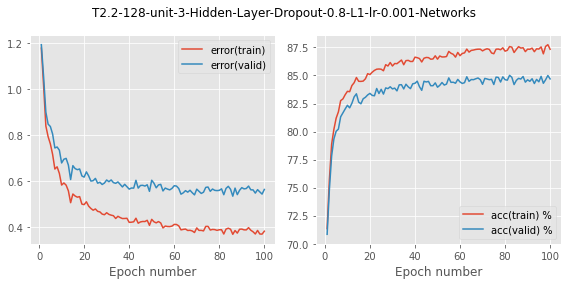

0.003


Epoch 1: 9.3s to complete
    error(train)=1.17e+00, acc(train)=7.08e-01, error(valid)=1.22e+00, acc(valid)=7.00e-01


Epoch 2: 9.1s to complete
    error(train)=9.31e-01, acc(train)=7.59e-01, error(valid)=9.78e-01, acc(valid)=7.53e-01


Epoch 3: 9.8s to complete
    error(train)=8.33e-01, acc(train)=7.77e-01, error(valid)=8.99e-01, acc(valid)=7.67e-01


Epoch 4: 8.9s to complete
    error(train)=8.08e-01, acc(train)=7.80e-01, error(valid)=8.68e-01, acc(valid)=7.75e-01


Epoch 5: 8.7s to complete
    error(train)=7.19e-01, acc(train)=8.00e-01, error(valid)=7.86e-01, acc(valid)=7.89e-01


Epoch 6: 9.0s to complete
    error(train)=7.39e-01, acc(train)=8.02e-01, error(valid)=8.17e-01, acc(valid)=7.92e-01


Epoch 7: 8.9s to complete
    error(train)=6.89e-01, acc(train)=8.07e-01, error(valid)=7.64e-01, acc(valid)=7.98e-01


Epoch 8: 8.8s to complete
    error(train)=7.18e-01, acc(train)=8.02e-01, error(valid)=7.93e-01, acc(valid)=7.95e-01


Epoch 9: 9.6s to complete
    error(train)=7.35e-01, acc(train)=7.98e-01, error(valid)=8.23e-01, acc(valid)=7.87e-01


Epoch 10: 8.6s to complete
    error(train)=6.75e-01, acc(train)=8.02e-01, error(valid)=7.56e-01, acc(valid)=7.93e-01


Epoch 11: 8.9s to complete
    error(train)=6.75e-01, acc(train)=8.13e-01, error(valid)=7.61e-01, acc(valid)=7.99e-01


Epoch 12: 10.3s to complete
    error(train)=6.83e-01, acc(train)=8.12e-01, error(valid)=7.88e-01, acc(valid)=7.97e-01


Epoch 13: 9.9s to complete
    error(train)=6.73e-01, acc(train)=8.12e-01, error(valid)=7.68e-01, acc(valid)=8.01e-01


Epoch 14: 9.7s to complete
    error(train)=6.04e-01, acc(train)=8.21e-01, error(valid)=7.05e-01, acc(valid)=8.08e-01


Epoch 15: 9.3s to complete
    error(train)=6.57e-01, acc(train)=8.17e-01, error(valid)=7.63e-01, acc(valid)=8.01e-01


Epoch 16: 10.2s to complete
    error(train)=6.34e-01, acc(train)=8.15e-01, error(valid)=7.32e-01, acc(valid)=8.01e-01


Epoch 17: 9.3s to complete
    error(train)=6.63e-01, acc(train)=8.15e-01, error(valid)=7.83e-01, acc(valid)=7.99e-01


Epoch 18: 9.2s to complete
    error(train)=6.34e-01, acc(train)=8.24e-01, error(valid)=7.38e-01, acc(valid)=8.09e-01


Epoch 19: 9.6s to complete
    error(train)=6.13e-01, acc(train)=8.20e-01, error(valid)=7.24e-01, acc(valid)=8.04e-01


Epoch 20: 8.8s to complete
    error(train)=6.68e-01, acc(train)=8.09e-01, error(valid)=7.91e-01, acc(valid)=7.96e-01


Epoch 21: 10.6s to complete
    error(train)=6.59e-01, acc(train)=8.21e-01, error(valid)=7.82e-01, acc(valid)=8.10e-01


Epoch 22: 10.8s to complete
    error(train)=6.21e-01, acc(train)=8.22e-01, error(valid)=7.45e-01, acc(valid)=8.07e-01


Epoch 23: 9.7s to complete
    error(train)=6.13e-01, acc(train)=8.26e-01, error(valid)=7.21e-01, acc(valid)=8.14e-01


Epoch 24: 9.2s to complete
    error(train)=6.00e-01, acc(train)=8.27e-01, error(valid)=7.15e-01, acc(valid)=8.09e-01


Epoch 25: 10.2s to complete
    error(train)=6.18e-01, acc(train)=8.25e-01, error(valid)=7.36e-01, acc(valid)=8.11e-01


Epoch 26: 11.0s to complete
    error(train)=5.98e-01, acc(train)=8.19e-01, error(valid)=7.10e-01, acc(valid)=8.07e-01


Epoch 27: 9.7s to complete
    error(train)=6.06e-01, acc(train)=8.29e-01, error(valid)=7.22e-01, acc(valid)=8.13e-01


Epoch 28: 9.2s to complete
    error(train)=6.09e-01, acc(train)=8.29e-01, error(valid)=7.22e-01, acc(valid)=8.12e-01


Epoch 29: 11.1s to complete
    error(train)=5.84e-01, acc(train)=8.32e-01, error(valid)=7.06e-01, acc(valid)=8.19e-01


Epoch 30: 10.1s to complete
    error(train)=6.02e-01, acc(train)=8.29e-01, error(valid)=7.17e-01, acc(valid)=8.12e-01


Epoch 31: 9.7s to complete
    error(train)=6.20e-01, acc(train)=8.29e-01, error(valid)=7.51e-01, acc(valid)=8.12e-01


Epoch 32: 9.3s to complete
    error(train)=6.08e-01, acc(train)=8.32e-01, error(valid)=7.33e-01, acc(valid)=8.14e-01


Epoch 33: 9.5s to complete
    error(train)=5.81e-01, acc(train)=8.30e-01, error(valid)=6.90e-01, acc(valid)=8.17e-01


Epoch 34: 9.6s to complete
    error(train)=5.96e-01, acc(train)=8.35e-01, error(valid)=7.22e-01, acc(valid)=8.19e-01


Epoch 35: 8.7s to complete
    error(train)=5.94e-01, acc(train)=8.31e-01, error(valid)=7.29e-01, acc(valid)=8.14e-01


Epoch 36: 9.8s to complete
    error(train)=5.88e-01, acc(train)=8.31e-01, error(valid)=7.11e-01, acc(valid)=8.16e-01


Epoch 37: 11.0s to complete
    error(train)=5.74e-01, acc(train)=8.38e-01, error(valid)=7.08e-01, acc(valid)=8.23e-01


Epoch 38: 9.2s to complete
    error(train)=5.99e-01, acc(train)=8.32e-01, error(valid)=7.23e-01, acc(valid)=8.14e-01


Epoch 39: 9.7s to complete
    error(train)=6.10e-01, acc(train)=8.30e-01, error(valid)=7.29e-01, acc(valid)=8.16e-01


Epoch 40: 9.3s to complete
    error(train)=5.76e-01, acc(train)=8.33e-01, error(valid)=7.04e-01, acc(valid)=8.17e-01


Epoch 41: 11.0s to complete
    error(train)=5.70e-01, acc(train)=8.35e-01, error(valid)=7.03e-01, acc(valid)=8.19e-01


Epoch 42: 11.0s to complete
    error(train)=5.90e-01, acc(train)=8.32e-01, error(valid)=7.24e-01, acc(valid)=8.15e-01


Epoch 43: 10.1s to complete
    error(train)=6.02e-01, acc(train)=8.31e-01, error(valid)=7.30e-01, acc(valid)=8.15e-01


Epoch 44: 10.3s to complete
    error(train)=5.61e-01, acc(train)=8.31e-01, error(valid)=6.98e-01, acc(valid)=8.15e-01


Epoch 45: 9.4s to complete
    error(train)=6.47e-01, acc(train)=8.16e-01, error(valid)=7.78e-01, acc(valid)=8.02e-01


Epoch 46: 10.1s to complete
    error(train)=5.86e-01, acc(train)=8.31e-01, error(valid)=7.18e-01, acc(valid)=8.17e-01


Epoch 47: 10.0s to complete
    error(train)=5.61e-01, acc(train)=8.36e-01, error(valid)=7.00e-01, acc(valid)=8.20e-01


Epoch 48: 9.3s to complete
    error(train)=5.91e-01, acc(train)=8.35e-01, error(valid)=7.32e-01, acc(valid)=8.15e-01


Epoch 49: 9.1s to complete
    error(train)=5.62e-01, acc(train)=8.33e-01, error(valid)=6.91e-01, acc(valid)=8.19e-01


Epoch 50: 9.7s to complete
    error(train)=5.64e-01, acc(train)=8.38e-01, error(valid)=7.14e-01, acc(valid)=8.18e-01


Epoch 51: 8.9s to complete
    error(train)=5.86e-01, acc(train)=8.36e-01, error(valid)=7.35e-01, acc(valid)=8.21e-01


Epoch 52: 9.2s to complete
    error(train)=5.59e-01, acc(train)=8.37e-01, error(valid)=7.06e-01, acc(valid)=8.19e-01


Epoch 53: 11.0s to complete
    error(train)=5.56e-01, acc(train)=8.38e-01, error(valid)=6.95e-01, acc(valid)=8.19e-01


Epoch 54: 10.2s to complete
    error(train)=5.56e-01, acc(train)=8.39e-01, error(valid)=7.09e-01, acc(valid)=8.20e-01


Epoch 55: 9.6s to complete
    error(train)=5.72e-01, acc(train)=8.35e-01, error(valid)=7.18e-01, acc(valid)=8.15e-01


Epoch 56: 10.5s to complete
    error(train)=5.93e-01, acc(train)=8.29e-01, error(valid)=7.45e-01, acc(valid)=8.13e-01


Epoch 57: 9.7s to complete
    error(train)=5.59e-01, acc(train)=8.36e-01, error(valid)=6.89e-01, acc(valid)=8.18e-01


Epoch 58: 9.1s to complete
    error(train)=5.74e-01, acc(train)=8.35e-01, error(valid)=7.18e-01, acc(valid)=8.18e-01


Epoch 59: 9.4s to complete
    error(train)=5.74e-01, acc(train)=8.38e-01, error(valid)=7.36e-01, acc(valid)=8.19e-01


Epoch 60: 8.8s to complete
    error(train)=5.49e-01, acc(train)=8.37e-01, error(valid)=6.93e-01, acc(valid)=8.17e-01


Epoch 61: 9.0s to complete
    error(train)=5.84e-01, acc(train)=8.39e-01, error(valid)=7.37e-01, acc(valid)=8.21e-01


Epoch 62: 8.9s to complete
    error(train)=5.95e-01, acc(train)=8.35e-01, error(valid)=7.46e-01, acc(valid)=8.18e-01


Epoch 63: 9.1s to complete
    error(train)=5.69e-01, acc(train)=8.38e-01, error(valid)=7.17e-01, acc(valid)=8.19e-01


Epoch 64: 9.6s to complete
    error(train)=5.39e-01, acc(train)=8.41e-01, error(valid)=6.78e-01, acc(valid)=8.21e-01


Epoch 65: 10.9s to complete
    error(train)=5.41e-01, acc(train)=8.40e-01, error(valid)=6.93e-01, acc(valid)=8.19e-01


Epoch 66: 10.6s to complete
    error(train)=5.66e-01, acc(train)=8.39e-01, error(valid)=7.15e-01, acc(valid)=8.23e-01


Epoch 67: 9.2s to complete
    error(train)=5.51e-01, acc(train)=8.38e-01, error(valid)=6.98e-01, acc(valid)=8.18e-01


Epoch 68: 9.5s to complete
    error(train)=5.42e-01, acc(train)=8.38e-01, error(valid)=6.92e-01, acc(valid)=8.16e-01


Epoch 69: 10.8s to complete
    error(train)=5.27e-01, acc(train)=8.42e-01, error(valid)=6.73e-01, acc(valid)=8.24e-01


Epoch 70: 9.6s to complete
    error(train)=5.38e-01, acc(train)=8.40e-01, error(valid)=6.86e-01, acc(valid)=8.19e-01


Epoch 71: 10.1s to complete
    error(train)=5.35e-01, acc(train)=8.42e-01, error(valid)=6.76e-01, acc(valid)=8.24e-01


Epoch 72: 9.2s to complete
    error(train)=5.36e-01, acc(train)=8.43e-01, error(valid)=6.89e-01, acc(valid)=8.27e-01


Epoch 73: 9.8s to complete
    error(train)=5.53e-01, acc(train)=8.38e-01, error(valid)=6.99e-01, acc(valid)=8.20e-01


Epoch 74: 8.9s to complete
    error(train)=5.52e-01, acc(train)=8.40e-01, error(valid)=6.85e-01, acc(valid)=8.23e-01


Epoch 75: 8.7s to complete
    error(train)=5.53e-01, acc(train)=8.45e-01, error(valid)=7.09e-01, acc(valid)=8.24e-01


Epoch 76: 9.4s to complete
    error(train)=5.60e-01, acc(train)=8.35e-01, error(valid)=7.07e-01, acc(valid)=8.21e-01


Epoch 77: 8.5s to complete
    error(train)=5.53e-01, acc(train)=8.39e-01, error(valid)=6.91e-01, acc(valid)=8.21e-01


Epoch 78: 8.4s to complete
    error(train)=5.18e-01, acc(train)=8.41e-01, error(valid)=6.45e-01, acc(valid)=8.26e-01


Epoch 79: 8.4s to complete
    error(train)=5.56e-01, acc(train)=8.40e-01, error(valid)=7.15e-01, acc(valid)=8.20e-01


Epoch 80: 8.5s to complete
    error(train)=5.60e-01, acc(train)=8.35e-01, error(valid)=7.21e-01, acc(valid)=8.13e-01


Epoch 81: 9.2s to complete
    error(train)=6.36e-01, acc(train)=8.30e-01, error(valid)=7.80e-01, acc(valid)=8.13e-01


Epoch 82: 9.1s to complete
    error(train)=5.29e-01, acc(train)=8.42e-01, error(valid)=6.60e-01, acc(valid)=8.24e-01


Epoch 83: 9.7s to complete
    error(train)=5.65e-01, acc(train)=8.42e-01, error(valid)=7.10e-01, acc(valid)=8.23e-01


Epoch 84: 10.9s to complete
    error(train)=5.61e-01, acc(train)=8.38e-01, error(valid)=7.07e-01, acc(valid)=8.24e-01


Epoch 85: 9.7s to complete
    error(train)=5.48e-01, acc(train)=8.38e-01, error(valid)=6.84e-01, acc(valid)=8.22e-01


Epoch 86: 10.2s to complete
    error(train)=5.28e-01, acc(train)=8.41e-01, error(valid)=6.69e-01, acc(valid)=8.21e-01


Epoch 87: 10.3s to complete
    error(train)=5.77e-01, acc(train)=8.37e-01, error(valid)=7.26e-01, acc(valid)=8.16e-01


Epoch 88: 10.2s to complete
    error(train)=5.38e-01, acc(train)=8.45e-01, error(valid)=6.69e-01, acc(valid)=8.28e-01


Epoch 89: 9.9s to complete
    error(train)=5.42e-01, acc(train)=8.44e-01, error(valid)=6.87e-01, acc(valid)=8.27e-01


Epoch 90: 9.6s to complete
    error(train)=5.40e-01, acc(train)=8.48e-01, error(valid)=6.91e-01, acc(valid)=8.28e-01


Epoch 91: 9.8s to complete
    error(train)=5.55e-01, acc(train)=8.37e-01, error(valid)=6.91e-01, acc(valid)=8.21e-01


Epoch 92: 9.5s to complete
    error(train)=5.39e-01, acc(train)=8.44e-01, error(valid)=6.85e-01, acc(valid)=8.27e-01


Epoch 93: 9.4s to complete
    error(train)=5.44e-01, acc(train)=8.39e-01, error(valid)=6.96e-01, acc(valid)=8.18e-01


Epoch 94: 10.0s to complete
    error(train)=5.70e-01, acc(train)=8.38e-01, error(valid)=7.20e-01, acc(valid)=8.20e-01


Epoch 95: 9.2s to complete
    error(train)=5.37e-01, acc(train)=8.41e-01, error(valid)=6.81e-01, acc(valid)=8.23e-01


Epoch 96: 10.4s to complete
    error(train)=5.40e-01, acc(train)=8.47e-01, error(valid)=7.04e-01, acc(valid)=8.25e-01


Epoch 97: 10.7s to complete
    error(train)=5.36e-01, acc(train)=8.46e-01, error(valid)=6.94e-01, acc(valid)=8.27e-01


Epoch 98: 11.1s to complete
    error(train)=5.19e-01, acc(train)=8.48e-01, error(valid)=6.48e-01, acc(valid)=8.32e-01


Epoch 99: 10.8s to complete
    error(train)=5.37e-01, acc(train)=8.40e-01, error(valid)=6.90e-01, acc(valid)=8.21e-01


Epoch 100: 10.5s to complete
    error(train)=5.60e-01, acc(train)=8.41e-01, error(valid)=7.39e-01, acc(valid)=8.18e-01




    T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-lr-0.003-Networks
    minimum error valid iteration: 78
    minimum error valid          : 0.6447823092504076
    
    maximum acc valid iteration  : 98
    maximum acc valid            : 0.8317721518987341
    
    


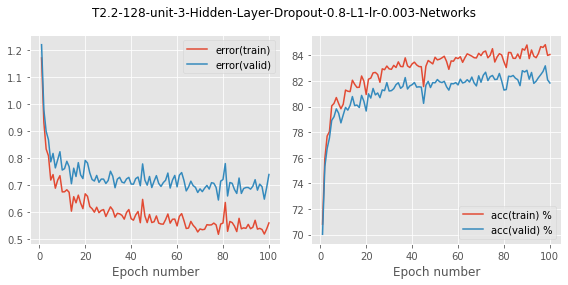

In [90]:
#setup hyperparameters
stats_interval = 1
hidden_dim = 128
l1_coefficient = 0.00001
dropout_rate = 0.8

num_epochs = 100

for learning_rate_exp in learning_rates:
    print(learning_rate_exp)
    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    # Create a weights initialiser 
    weights_init = GlorotUniformInit(rng=rng)

    biases_init = ConstantInit(0.)

    l1_penalty = L1Penalty(l1_coefficient)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, 
                    weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
        ReluLayer(),
        DropoutLayer(rng=rng, incl_prob=0.8),

        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                    weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
        ReluLayer(),
        DropoutLayer(rng=rng, incl_prob=0.8),

        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                    weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
        ReluLayer(),
        DropoutLayer(rng=rng, incl_prob=0.8),

        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                    weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
        ReluLayer(),
        DropoutLayer(rng=rng, incl_prob=0.8),

        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate_exp)

    # Remember to use notebook=False when you write a script to be run in a terminal
    n_hidden_layer = 3
    stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t2(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
        title=f'T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-lr-{learning_rate_exp}-Networks',
        notebook=True)

#     fig_1.savefig(f'../images/t2.2-dropout-{dropout_rate}-l1-{l1_coefficient}-lr-{learning_rate_exp}.png')

# Evaluate Best Model on the Test Set

In [92]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff0e72caf10>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7ff0e679a3a0>)


0.0007


Epoch 1: 5.9s to complete
    error(train)=1.30e+00, acc(train)=6.91e-01, error(valid)=1.31e+00, acc(valid)=6.90e-01


Epoch 2: 7.5s to complete
    error(train)=1.06e+00, acc(train)=7.51e-01, error(valid)=1.09e+00, acc(valid)=7.42e-01


Epoch 3: 10.1s to complete
    error(train)=9.13e-01, acc(train)=7.77e-01, error(valid)=9.56e-01, acc(valid)=7.70e-01


Epoch 4: 11.0s to complete
    error(train)=8.57e-01, acc(train)=7.93e-01, error(valid)=9.15e-01, acc(valid)=7.87e-01


Epoch 5: 11.1s to complete
    error(train)=7.78e-01, acc(train)=8.04e-01, error(valid)=8.42e-01, acc(valid)=7.99e-01


Epoch 6: 10.5s to complete
    error(train)=7.40e-01, acc(train)=8.14e-01, error(valid)=8.15e-01, acc(valid)=8.02e-01


Epoch 7: 10.3s to complete
    error(train)=6.78e-01, acc(train)=8.20e-01, error(valid)=7.48e-01, acc(valid)=8.10e-01


Epoch 8: 10.3s to complete
    error(train)=6.75e-01, acc(train)=8.23e-01, error(valid)=7.69e-01, acc(valid)=8.10e-01


Epoch 9: 10.8s to complete
    error(train)=6.47e-01, acc(train)=8.27e-01, error(valid)=7.47e-01, acc(valid)=8.13e-01


Epoch 10: 10.7s to complete
    error(train)=6.28e-01, acc(train)=8.30e-01, error(valid)=7.27e-01, acc(valid)=8.20e-01


Epoch 11: 10.1s to complete
    error(train)=6.06e-01, acc(train)=8.34e-01, error(valid)=7.10e-01, acc(valid)=8.22e-01


Epoch 12: 8.6s to complete
    error(train)=5.91e-01, acc(train)=8.36e-01, error(valid)=6.99e-01, acc(valid)=8.20e-01


Epoch 13: 10.0s to complete
    error(train)=5.82e-01, acc(train)=8.40e-01, error(valid)=6.89e-01, acc(valid)=8.26e-01


Epoch 14: 9.2s to complete
    error(train)=5.59e-01, acc(train)=8.43e-01, error(valid)=6.61e-01, acc(valid)=8.28e-01


Epoch 15: 9.4s to complete
    error(train)=5.51e-01, acc(train)=8.46e-01, error(valid)=6.69e-01, acc(valid)=8.29e-01


Epoch 16: 8.8s to complete
    error(train)=5.31e-01, acc(train)=8.49e-01, error(valid)=6.43e-01, acc(valid)=8.31e-01


Epoch 17: 8.8s to complete
    error(train)=5.17e-01, acc(train)=8.50e-01, error(valid)=6.42e-01, acc(valid)=8.31e-01


Epoch 18: 9.0s to complete
    error(train)=5.18e-01, acc(train)=8.53e-01, error(valid)=6.36e-01, acc(valid)=8.37e-01


Epoch 19: 9.8s to complete
    error(train)=5.12e-01, acc(train)=8.51e-01, error(valid)=6.34e-01, acc(valid)=8.34e-01


Epoch 20: 10.0s to complete
    error(train)=5.13e-01, acc(train)=8.50e-01, error(valid)=6.45e-01, acc(valid)=8.31e-01


Epoch 21: 8.8s to complete
    error(train)=5.19e-01, acc(train)=8.52e-01, error(valid)=6.50e-01, acc(valid)=8.34e-01


Epoch 22: 9.6s to complete
    error(train)=4.96e-01, acc(train)=8.55e-01, error(valid)=6.34e-01, acc(valid)=8.36e-01


Epoch 23: 9.3s to complete
    error(train)=4.73e-01, acc(train)=8.56e-01, error(valid)=6.13e-01, acc(valid)=8.37e-01


Epoch 24: 8.3s to complete
    error(train)=4.88e-01, acc(train)=8.58e-01, error(valid)=6.33e-01, acc(valid)=8.36e-01


Epoch 25: 9.5s to complete
    error(train)=4.77e-01, acc(train)=8.59e-01, error(valid)=6.24e-01, acc(valid)=8.39e-01


Epoch 26: 9.1s to complete
    error(train)=4.84e-01, acc(train)=8.57e-01, error(valid)=6.35e-01, acc(valid)=8.35e-01


Epoch 27: 7.8s to complete
    error(train)=4.91e-01, acc(train)=8.57e-01, error(valid)=6.44e-01, acc(valid)=8.34e-01


Epoch 28: 8.0s to complete
    error(train)=4.51e-01, acc(train)=8.61e-01, error(valid)=5.95e-01, acc(valid)=8.39e-01


Epoch 29: 7.7s to complete
    error(train)=4.66e-01, acc(train)=8.58e-01, error(valid)=6.21e-01, acc(valid)=8.33e-01


Epoch 30: 9.4s to complete
    error(train)=4.59e-01, acc(train)=8.62e-01, error(valid)=6.15e-01, acc(valid)=8.38e-01


Epoch 31: 8.6s to complete
    error(train)=4.57e-01, acc(train)=8.61e-01, error(valid)=6.17e-01, acc(valid)=8.36e-01


Epoch 32: 8.4s to complete
    error(train)=4.55e-01, acc(train)=8.62e-01, error(valid)=6.11e-01, acc(valid)=8.37e-01


Epoch 33: 8.2s to complete
    error(train)=4.58e-01, acc(train)=8.63e-01, error(valid)=6.21e-01, acc(valid)=8.41e-01


Epoch 34: 8.2s to complete
    error(train)=4.20e-01, acc(train)=8.66e-01, error(valid)=5.78e-01, acc(valid)=8.42e-01


Epoch 35: 7.8s to complete
    error(train)=4.27e-01, acc(train)=8.67e-01, error(valid)=5.82e-01, acc(valid)=8.44e-01


Epoch 36: 9.1s to complete
    error(train)=4.32e-01, acc(train)=8.66e-01, error(valid)=5.89e-01, acc(valid)=8.43e-01


Epoch 37: 9.0s to complete
    error(train)=4.35e-01, acc(train)=8.66e-01, error(valid)=5.99e-01, acc(valid)=8.40e-01


Epoch 38: 8.3s to complete
    error(train)=4.36e-01, acc(train)=8.65e-01, error(valid)=5.98e-01, acc(valid)=8.41e-01


Epoch 39: 8.8s to complete
    error(train)=4.24e-01, acc(train)=8.67e-01, error(valid)=5.81e-01, acc(valid)=8.41e-01


Epoch 40: 8.2s to complete
    error(train)=4.35e-01, acc(train)=8.67e-01, error(valid)=5.97e-01, acc(valid)=8.43e-01


Epoch 41: 7.6s to complete
    error(train)=4.12e-01, acc(train)=8.68e-01, error(valid)=5.72e-01, acc(valid)=8.41e-01


Epoch 42: 7.4s to complete
    error(train)=4.28e-01, acc(train)=8.67e-01, error(valid)=5.91e-01, acc(valid)=8.41e-01


Epoch 43: 8.1s to complete
    error(train)=4.22e-01, acc(train)=8.68e-01, error(valid)=5.83e-01, acc(valid)=8.43e-01


Epoch 44: 8.9s to complete
    error(train)=4.18e-01, acc(train)=8.70e-01, error(valid)=5.81e-01, acc(valid)=8.45e-01


Epoch 45: 8.2s to complete
    error(train)=3.95e-01, acc(train)=8.72e-01, error(valid)=5.65e-01, acc(valid)=8.48e-01


Epoch 46: 7.8s to complete
    error(train)=4.16e-01, acc(train)=8.70e-01, error(valid)=5.83e-01, acc(valid)=8.42e-01


Epoch 47: 7.4s to complete
    error(train)=4.13e-01, acc(train)=8.70e-01, error(valid)=5.81e-01, acc(valid)=8.42e-01


Epoch 48: 8.4s to complete
    error(train)=3.95e-01, acc(train)=8.73e-01, error(valid)=5.59e-01, acc(valid)=8.45e-01


Epoch 49: 7.8s to complete
    error(train)=3.95e-01, acc(train)=8.72e-01, error(valid)=5.65e-01, acc(valid)=8.42e-01


Epoch 50: 7.7s to complete
    error(train)=4.04e-01, acc(train)=8.70e-01, error(valid)=5.85e-01, acc(valid)=8.43e-01


Epoch 51: 7.7s to complete
    error(train)=4.09e-01, acc(train)=8.70e-01, error(valid)=5.89e-01, acc(valid)=8.43e-01


Epoch 52: 7.8s to complete
    error(train)=4.00e-01, acc(train)=8.72e-01, error(valid)=5.59e-01, acc(valid)=8.45e-01


Epoch 53: 9.2s to complete
    error(train)=3.91e-01, acc(train)=8.72e-01, error(valid)=5.62e-01, acc(valid)=8.44e-01


Epoch 54: 9.2s to complete
    error(train)=3.91e-01, acc(train)=8.75e-01, error(valid)=5.63e-01, acc(valid)=8.47e-01


Epoch 55: 8.7s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=5.55e-01, acc(valid)=8.46e-01


Epoch 56: 9.0s to complete
    error(train)=3.90e-01, acc(train)=8.73e-01, error(valid)=5.66e-01, acc(valid)=8.44e-01


Epoch 57: 8.8s to complete
    error(train)=3.89e-01, acc(train)=8.74e-01, error(valid)=5.68e-01, acc(valid)=8.45e-01


Epoch 58: 9.6s to complete
    error(train)=3.82e-01, acc(train)=8.75e-01, error(valid)=5.59e-01, acc(valid)=8.46e-01


Epoch 59: 8.2s to complete
    error(train)=3.88e-01, acc(train)=8.75e-01, error(valid)=5.54e-01, acc(valid)=8.47e-01


Epoch 60: 9.9s to complete
    error(train)=3.95e-01, acc(train)=8.71e-01, error(valid)=5.70e-01, acc(valid)=8.44e-01


Epoch 61: 9.3s to complete
    error(train)=3.87e-01, acc(train)=8.73e-01, error(valid)=5.62e-01, acc(valid)=8.46e-01


Epoch 62: 10.1s to complete
    error(train)=3.83e-01, acc(train)=8.74e-01, error(valid)=5.54e-01, acc(valid)=8.45e-01


Epoch 63: 8.1s to complete
    error(train)=3.83e-01, acc(train)=8.74e-01, error(valid)=5.57e-01, acc(valid)=8.47e-01


Epoch 64: 7.9s to complete
    error(train)=3.93e-01, acc(train)=8.73e-01, error(valid)=5.69e-01, acc(valid)=8.46e-01


Epoch 65: 8.2s to complete
    error(train)=3.95e-01, acc(train)=8.74e-01, error(valid)=5.78e-01, acc(valid)=8.43e-01


Epoch 66: 9.2s to complete
    error(train)=3.99e-01, acc(train)=8.72e-01, error(valid)=5.82e-01, acc(valid)=8.42e-01


Epoch 67: 9.9s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=5.49e-01, acc(valid)=8.47e-01


Epoch 68: 8.6s to complete
    error(train)=3.68e-01, acc(train)=8.76e-01, error(valid)=5.46e-01, acc(valid)=8.49e-01


Epoch 69: 9.1s to complete
    error(train)=3.83e-01, acc(train)=8.75e-01, error(valid)=5.60e-01, acc(valid)=8.46e-01


Epoch 70: 8.1s to complete
    error(train)=3.80e-01, acc(train)=8.76e-01, error(valid)=5.61e-01, acc(valid)=8.48e-01


Epoch 71: 9.7s to complete
    error(train)=3.86e-01, acc(train)=8.74e-01, error(valid)=5.59e-01, acc(valid)=8.45e-01


Epoch 72: 8.4s to complete
    error(train)=3.82e-01, acc(train)=8.77e-01, error(valid)=5.62e-01, acc(valid)=8.46e-01


Epoch 73: 8.5s to complete
    error(train)=3.70e-01, acc(train)=8.78e-01, error(valid)=5.50e-01, acc(valid)=8.48e-01


Epoch 74: 9.2s to complete
    error(train)=3.79e-01, acc(train)=8.75e-01, error(valid)=5.60e-01, acc(valid)=8.45e-01


Epoch 75: 8.2s to complete
    error(train)=3.69e-01, acc(train)=8.78e-01, error(valid)=5.55e-01, acc(valid)=8.49e-01


Epoch 76: 7.9s to complete
    error(train)=3.70e-01, acc(train)=8.77e-01, error(valid)=5.52e-01, acc(valid)=8.48e-01


Epoch 77: 7.9s to complete
    error(train)=3.81e-01, acc(train)=8.76e-01, error(valid)=5.68e-01, acc(valid)=8.46e-01


Epoch 78: 7.9s to complete
    error(train)=3.68e-01, acc(train)=8.79e-01, error(valid)=5.56e-01, acc(valid)=8.48e-01


Epoch 79: 9.7s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=5.72e-01, acc(valid)=8.46e-01


Epoch 80: 9.5s to complete
    error(train)=3.77e-01, acc(train)=8.76e-01, error(valid)=5.69e-01, acc(valid)=8.47e-01


Epoch 81: 9.1s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=5.62e-01, acc(valid)=8.48e-01


Epoch 82: 8.1s to complete
    error(train)=3.66e-01, acc(train)=8.79e-01, error(valid)=5.52e-01, acc(valid)=8.48e-01


Epoch 83: 8.4s to complete
    error(train)=3.80e-01, acc(train)=8.75e-01, error(valid)=5.59e-01, acc(valid)=8.46e-01


Epoch 84: 8.0s to complete
    error(train)=3.69e-01, acc(train)=8.75e-01, error(valid)=5.53e-01, acc(valid)=8.45e-01


Epoch 85: 9.3s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=5.65e-01, acc(valid)=8.47e-01


Epoch 86: 7.9s to complete
    error(train)=3.68e-01, acc(train)=8.78e-01, error(valid)=5.57e-01, acc(valid)=8.48e-01


Epoch 87: 7.6s to complete
    error(train)=3.61e-01, acc(train)=8.79e-01, error(valid)=5.50e-01, acc(valid)=8.49e-01


Epoch 88: 9.7s to complete
    error(train)=3.73e-01, acc(train)=8.77e-01, error(valid)=5.65e-01, acc(valid)=8.47e-01


Epoch 89: 7.7s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.47e-01, acc(valid)=8.44e-01


Epoch 90: 7.7s to complete
    error(train)=3.55e-01, acc(train)=8.80e-01, error(valid)=5.37e-01, acc(valid)=8.51e-01


Epoch 91: 9.1s to complete
    error(train)=3.52e-01, acc(train)=8.83e-01, error(valid)=5.40e-01, acc(valid)=8.52e-01


Epoch 92: 8.4s to complete
    error(train)=3.57e-01, acc(train)=8.79e-01, error(valid)=5.33e-01, acc(valid)=8.47e-01


Epoch 93: 8.5s to complete
    error(train)=3.63e-01, acc(train)=8.79e-01, error(valid)=5.47e-01, acc(valid)=8.49e-01


Epoch 94: 8.3s to complete
    error(train)=3.59e-01, acc(train)=8.80e-01, error(valid)=5.46e-01, acc(valid)=8.48e-01


Epoch 95: 8.0s to complete
    error(train)=3.66e-01, acc(train)=8.79e-01, error(valid)=5.64e-01, acc(valid)=8.46e-01


Epoch 96: 8.2s to complete
    error(train)=3.57e-01, acc(train)=8.80e-01, error(valid)=5.48e-01, acc(valid)=8.48e-01


Epoch 97: 8.1s to complete
    error(train)=3.61e-01, acc(train)=8.78e-01, error(valid)=5.59e-01, acc(valid)=8.46e-01


Epoch 98: 8.0s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=5.54e-01, acc(valid)=8.48e-01


Epoch 99: 8.5s to complete
    error(train)=3.62e-01, acc(train)=8.79e-01, error(valid)=5.55e-01, acc(valid)=8.47e-01


Epoch 100: 8.2s to complete
    error(train)=3.59e-01, acc(train)=8.81e-01, error(valid)=5.49e-01, acc(valid)=8.50e-01




    Best-T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-0.00001-lr-0.0007-Networks
    minimum error valid iteration: 92
    minimum error valid          : 0.5327938448003153
    
    maximum acc valid iteration  : 91
    maximum acc valid            : 0.8518354430379748
    
    


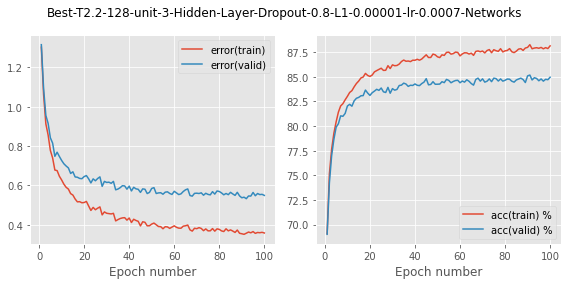

In [93]:
#setup hyperparameters
stats_interval = 1
hidden_dim = 128
l1_coefficient = 0.00001
dropout_rate = 0.8
learning_rate = 0.0007
num_epochs = 100

print(learning_rate)
# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
test_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
test_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)

l1_penalty = L1Penalty(l1_coefficient)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),

    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),

    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),

    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8),

    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 3


stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t2(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'Best-T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-0.00001-lr-0.0007-Networks',
    notebook=True)

# fig_1.savefig(f'../images/t2.2-dropout-{dropout_rate}-l1-{l1_coefficient}-lr-{learning_rate_exp}.png')